<a href="https://colab.research.google.com/github/SimplyDifficult/ML-for-Wireless/blob/main/8.UCB_20_dim_user_case_BOGP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
P_max = 30 #in dBm

In [2]:
var = 20
number_of_cells = 4

In [ ]:
!sudo add-apt-repository ppa:octave/stable
!sudo apt update
!sudo apt install octave

In [ ]:
!wget https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
!wget https://www.dropbox.com/s/d1ytzzfpxsrpbcv/main_bitchanged.m -O /content/main.m
!wget https://www.dropbox.com/s/v3y2xe56qodthnm/function_SE.m
!wget https://www.dropbox.com/s/5p0j4qdqist7ibm/main_individual_transmit_case_for_Test_phase_bitchanged.m -O /content/main_individual_transmit_case_for_Test_phase.m

In [ ]:
!wget https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
!wget https://www.dropbox.com/s/52gyqiq137mo2bb/SE.mat

In [6]:
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot
from scipy.optimize import minimize
import numpy as np
from scipy.io import loadmat, savemat
import numpy as np
from google.colab import files
import cv2
from scipy.optimize import dual_annealing

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#### Objective function
import random
def objective(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W main.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [9]:
#surrogate or approximation for the objective function
def surrogate(model, X):
	#catch any warning generated when making a prediction
	with catch_warnings():
		#ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

In [10]:
def UCBobjective(Xsamples, X, model, beta):
  Xsamples = Xsamples[np.newaxis,:]
  mu, std = surrogate(model, Xsamples)
  mu = mu[:, 0]
  sigma = beta
  probs = mu + sigma * std
  return -probs[0]

In [11]:
#optimize the acquisition function
def opt_acquisition(X, y, model, iteration):
  #Do it 5 times
  r_min, r_max = -31.0, P_max  
  bounds = []
  for ti in range(var):
    bounds = bounds + [[r_min, r_max]]
  min_result = 9999999999999.0
  min_answer = 0
  if iteration<180:
   beta = 5-(((5-0.000001)/180)*iteration)
  else:
   beta = 0.000001
  
  for i in range(2):
    result = dual_annealing(UCBobjective, bounds, args=(X,model,beta))
    if(result.fun<min_result):
      min_result = result.fun
      min_answer = result['x']    
  return min_answer

In [12]:
import random
def objective_FPA(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W /content/main_individual_transmit_case_for_Test_phase.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
X = np.load("/content/drive/MyDrive/trainingx_BOGP_4.npy")
y = np.load("/content/drive/MyDrive/trainingy_BOGP_4.npy")
y_FPA = np.load("/content/drive/MyDrive/grad_trainingyFPA_BOGP_4.npy")

x_next is [-12.70744613  -4.96304902 -15.71331763   9.81158158 -11.41414895
  -4.17510089 -25.05154526   8.90762036  21.08344688  20.48087177
  29.09253894  20.21776569  -8.39450914   7.63484882   7.79931461
 -28.28154178   5.74490507  23.39143907 -15.24784357 -25.71271145]
f()=0.000000, actual=22.848
0


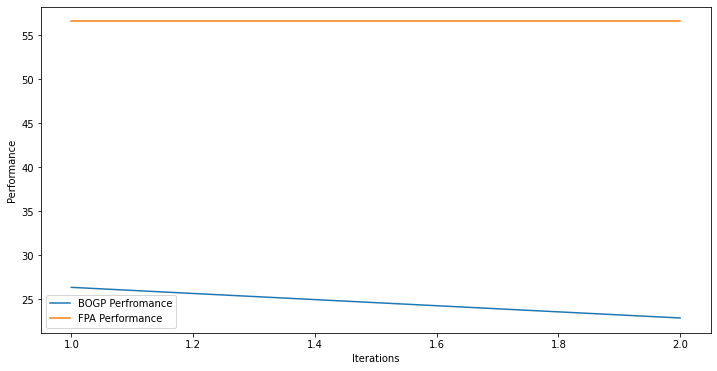

x_next is [-28.10628984   3.56465554   5.46217676   9.93339454 -14.19364019
 -18.34002022 -12.76211426 -17.77297146 -23.30046196  -0.4565139
 -24.07697678 -22.20678154  17.83888134  25.23916648   6.68637143
  21.80427677  21.94384974 -10.12958147  23.0624582   25.06614651]
f()=24.466046, actual=34.727
1


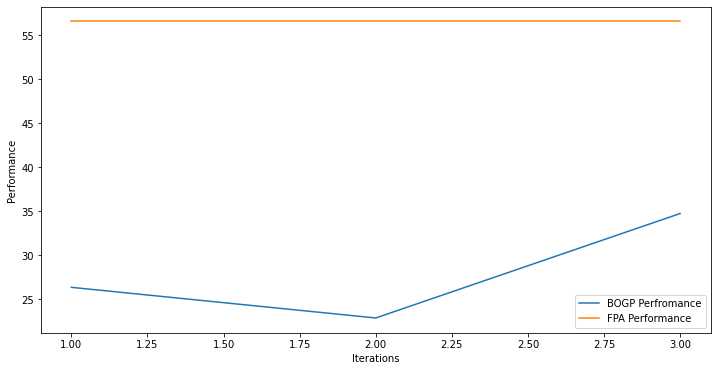

x_next is [ 29.99985114  29.99999261  30.         -30.99993748  30.
  29.99955575  30.         -30.9999893  -30.99987454 -30.99999768
 -30.99998467 -30.99996993  30.         -30.99998463 -30.99990854
  29.99997455 -30.99994519 -30.99995828  30.          29.99978002]
f()=27.524140, actual=42.223
2


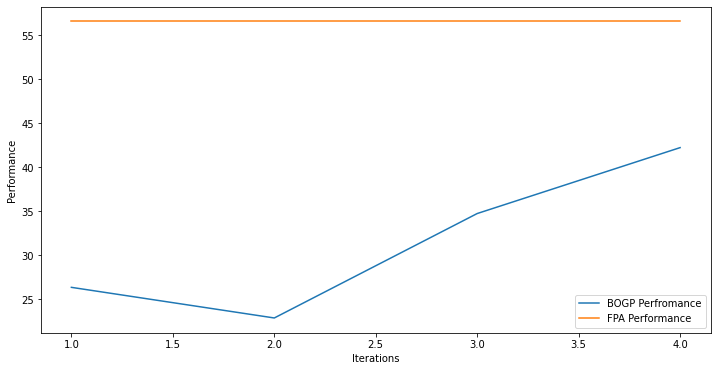

x_next is [-31. -31. -31. -31. -31.  30. -31. -31. -31. -31. -31. -31.  30. -31.
 -31.  30. -31.  30.  30. -31.]
f()=33.908803, actual=29.501
3


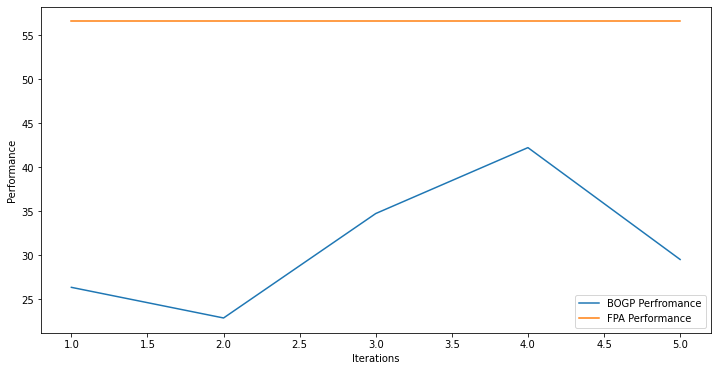

x_next is [ 30. -31.  30. -31.  30. -31. -31. -31. -31. -31. -31. -31. -31. -31.
  30. -31.  30. -31.  30.  30.]
f()=33.367695, actual=27.627
4


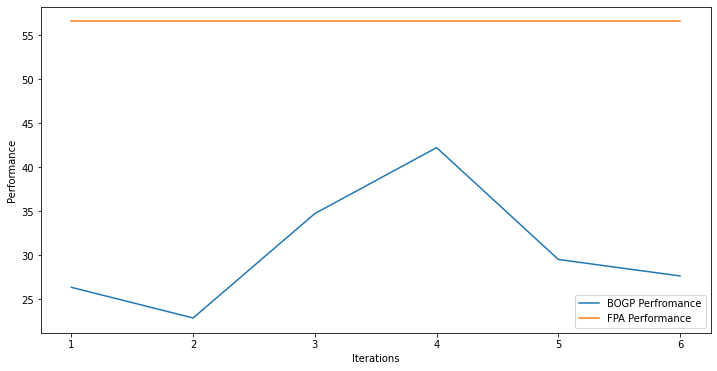

x_next is [ 30.  30. -31.  30.  30.  30.  30.  30. -31. -31.  30. -31.  30.  30.
 -31.  30.  30. -31.  30.  30.]
f()=35.174110, actual=51.727
5


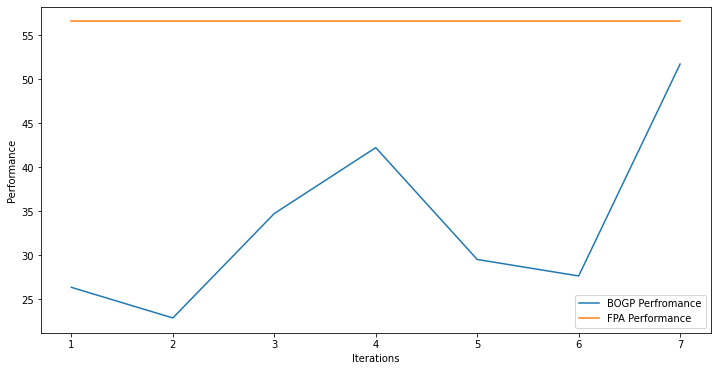

x_next is [-31.  30. -31.  30.  30.  30.  30.  30. -31. -31. -31. -31. -31.  30.
 -31. -31. -31. -31. -31.  30.]
f()=37.264657, actual=32.369
6


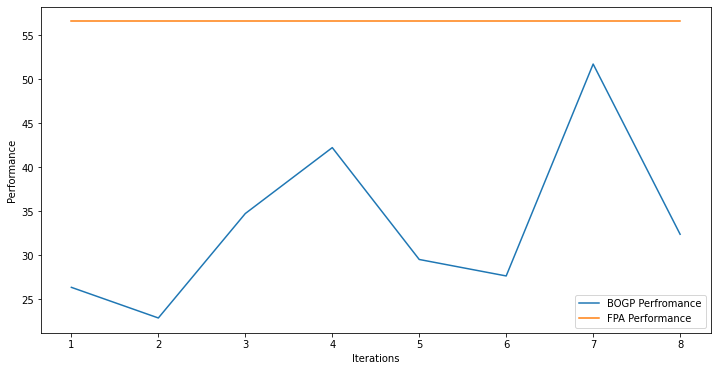

x_next is [ 30.  30. -31.  30.  30. -31.  30. -31. -31. -31.  30. -31.  30.  30.
  30.  30. -31.  30.  30.  30.]
f()=40.542942, actual=49.209
7


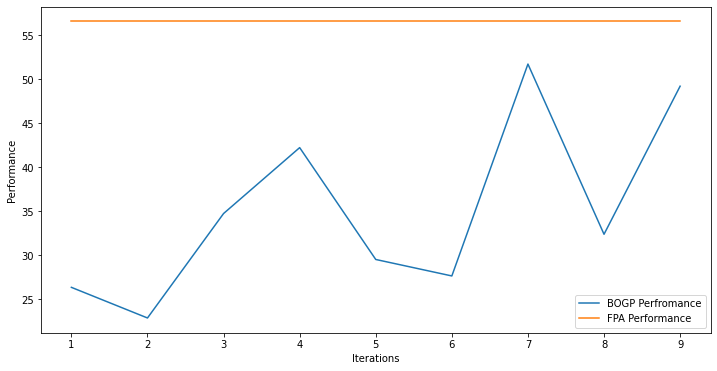

x_next is [ 30.  30. -31. -31. -31.  30.  30. -31. -31.  30.  30. -31.  30.  30.
 -31. -31.  30.  30.  30.  30.]
f()=40.813444, actual=42.348
8


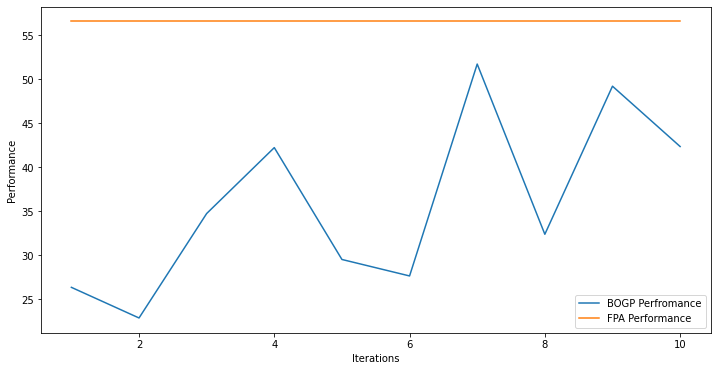

x_next is [ 30.  30. -31. -31. -31. -31.  30.  30.  30. -31.  30. -31.  30.  30.
 -31.  30. -31. -31.  30.  30.]
f()=42.220354, actual=41.983
9


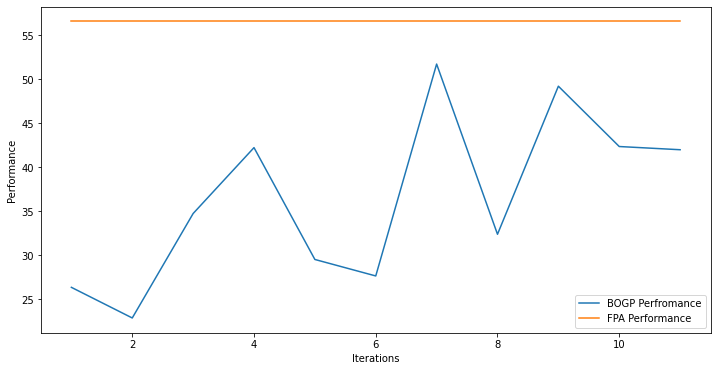

x_next is [ 30.  30. -31. -31.  30. -31.  30. -31. -31. -31.  30. -31.  30.  30.
 -31.  30.  30. -31. -31. -31.]
f()=42.001295, actual=39.484
10


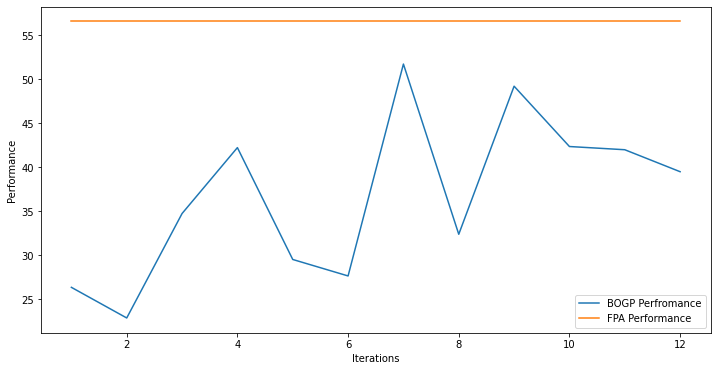

x_next is [ 29.99930954  29.99975419 -30.99952446  29.99920532  29.99953782
  29.9980461   29.99998355  29.99703454 -30.99930969 -30.9999293
  29.99949256 -30.99984544  29.99825152  29.99849482 -30.99991627
  29.99893846 -30.99861593 -30.99901928  29.99978842  29.99986875]
f()=36.504662, actual=49.314
11


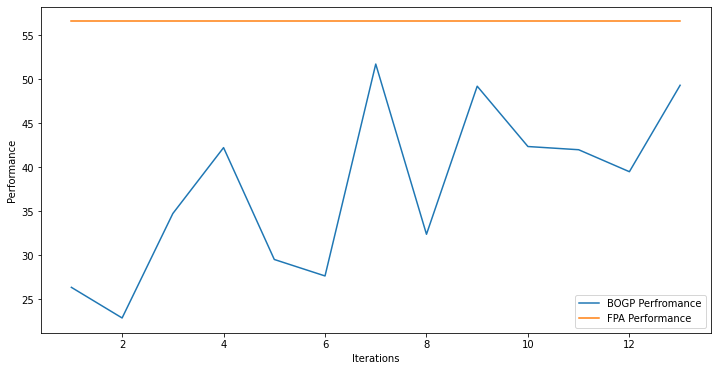

x_next is [ 29.99980108  29.99988704 -30.99978023  29.99993744  29.99926863
  29.9998739   29.99999538  29.99983433 -30.9990471  -30.9999228
  29.99982254 -30.99996888  29.99985439  29.99997452 -30.99973167
  29.99994512 -30.9998128  -30.99988698  29.99978699  29.99980834]
f()=37.484099, actual=49.314
12


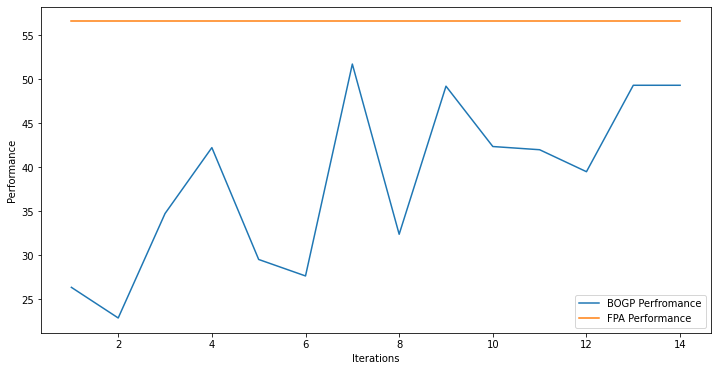

x_next is [ 29.99994463  29.99760942 -30.99928924  29.999192    29.99919103
 -30.99905395 -30.99732155  29.9979509  -30.99900877  29.99941232
  29.99889356 -30.99994266  29.99906388 -30.99951909 -30.99996501
  29.99930411  29.99731238  29.99922382  29.99993822  29.99971767]
f()=43.859562, actual=49.047
13


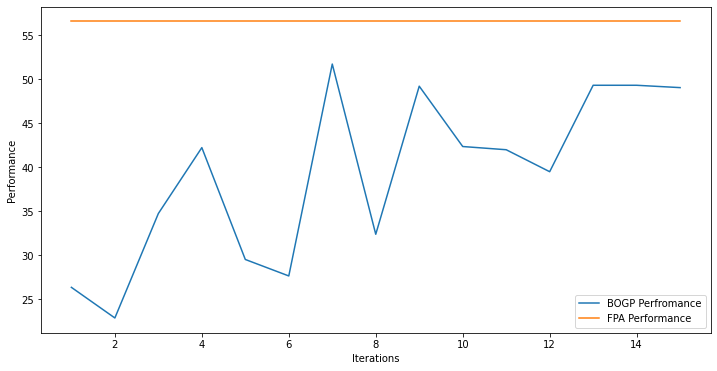

x_next is [-30.9994173   29.99910237 -30.99931758  29.99809772  29.99986221
  29.9976878   29.99830813 -30.99786619  29.9973429   29.99942119
  29.99926318 -30.99990632  29.9981688  -30.99855756  29.99419066
  29.99827691  29.99762677 -30.99945223  29.99839762  29.99896509]
f()=41.753686, actual=47.485
14


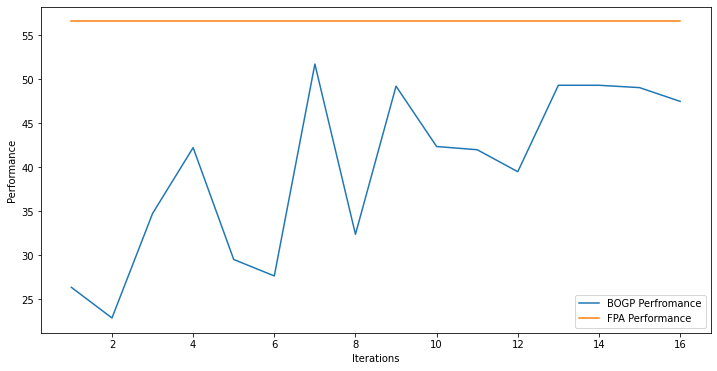

x_next is [ 29.9905282   29.99927276 -30.99381731  29.99559334 -30.99322657
 -30.98940964  29.99596718 -30.99462276 -30.99383751 -30.99900849
  29.99773936  29.99976692  29.99674975 -30.99957408 -30.98631056
  29.99853001  29.99378165 -30.98837983  29.99995792  29.99874698]
f()=45.668119, actual=41.197
15


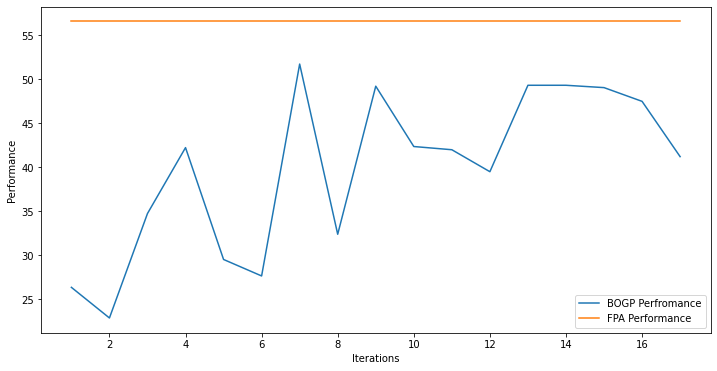

x_next is [ 29.99688922  29.99922051 -30.99832778  29.99445344  29.99674997
  29.9853461  -30.98079289 -30.9891718   29.99811434 -30.99753418
  29.98953906 -30.99700988  29.98878265  29.99553116 -30.99247024
  29.99361874  29.99030459  29.98630174  29.99386984  29.99971964]
f()=49.501754, actual=52.104
16


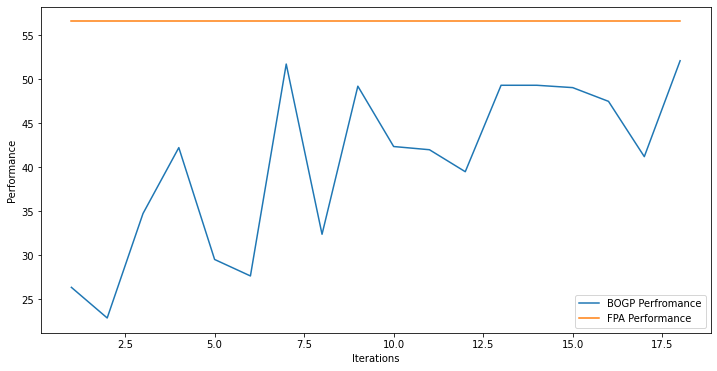

x_next is [-30.99873072  29.99304021  29.99837138  29.99661566  29.98863555
 -30.99489056  29.99442953 -30.99748155  29.99936604 -30.99518491
  29.99750962 -30.99512671  29.99908663 -30.97630103 -30.99338824
 -30.98809041  29.99048996  29.996059    29.98862097  29.99225781]
f()=42.873944, actual=41.155
17


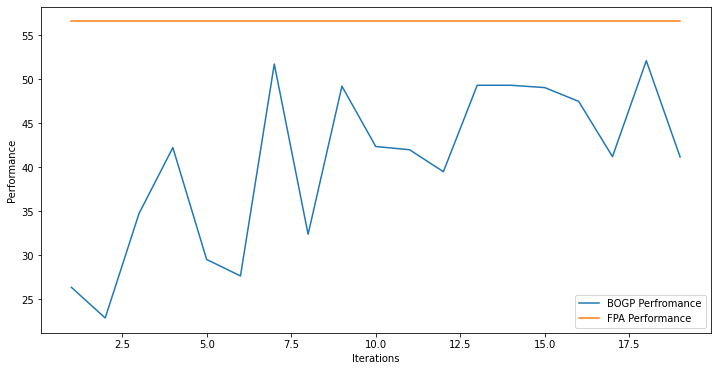

x_next is [ 29.99772978 -30.99766186 -30.99927135  29.9958966   29.99987461
 -30.98151977  29.991985   -30.9989741   29.99859544  29.99102081
 -30.99969657 -30.99717237  29.99910253  29.99219433 -30.9913735
  29.99150996  29.98961075  29.9902258   29.99811212  29.99632531]
f()=42.629092, actual=49.574
18


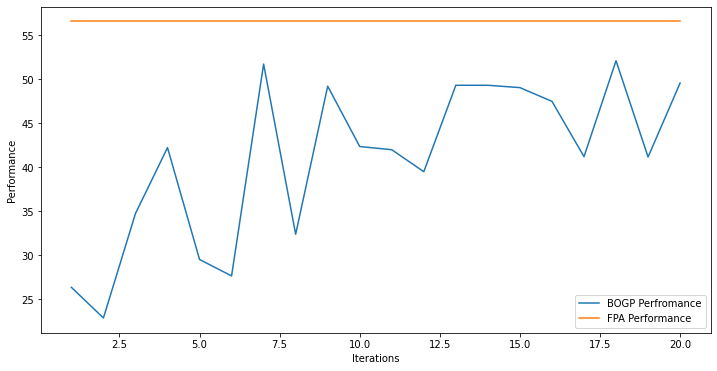

x_next is [ 29.99142174  29.99033806  29.99155582  29.99185851  29.99603486
  29.9817149   29.99529448 -30.99910635 -30.95112489  29.9869617
  29.99469145 -30.99860311 -30.99469022  29.98723195 -30.9909451
  29.99655318  29.99105308  29.99484939  29.99773528  29.99952113]
f()=45.917852, actual=50.620
19


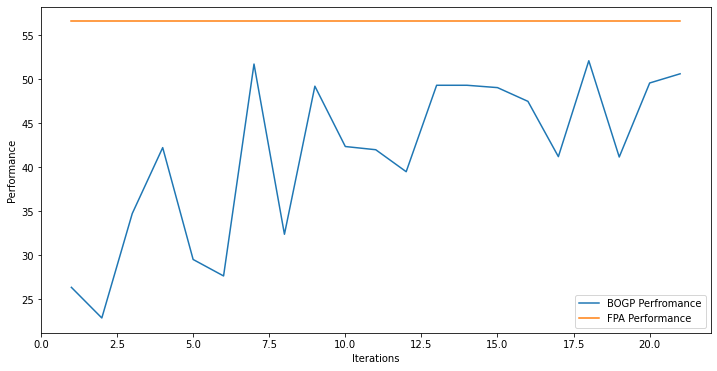

x_next is [ 29.99715984  29.99921049 -30.98612068  29.99947173  29.99191035
 -30.98438648  29.99949766 -30.99442955  29.99822908  29.9923332
 -30.99919834 -30.99977946 -30.99875384  29.9953387  -30.99790957
  29.99925785  29.98124015 -30.99540832  29.9997888  -30.9916657 ]
f()=44.604748, actual=41.505
20


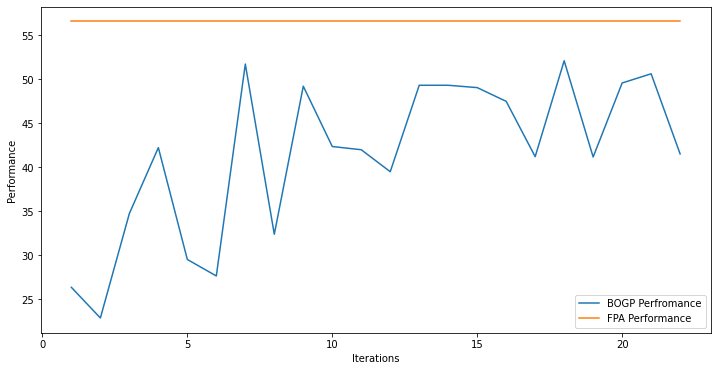

x_next is [-30.99603482  29.98718508 -30.99595264 -30.97582253  29.99713916
 -30.96373812  29.9903797  -30.99313298 -30.97471093  29.9755193
  29.97438247  29.97768296  29.98748081  29.98710672 -30.97894217
  29.99065608  29.97981606  29.99587535  29.99939323  29.99352443]
f()=44.678273, actual=44.559
21


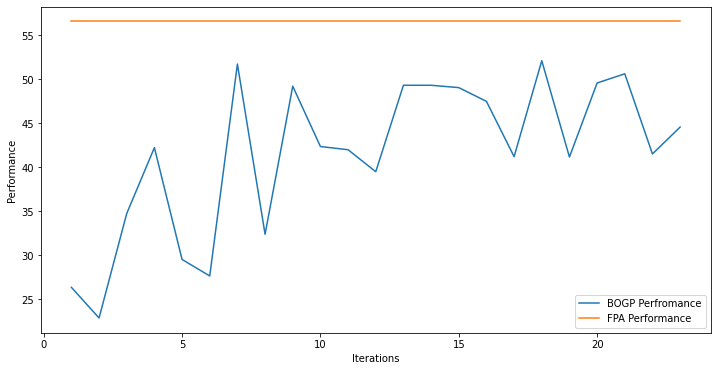

x_next is [ 29.99142054 -30.9928292  -30.99947352  29.99979432  29.9929886
  29.98208149 -30.95906073 -30.98948069 -30.99171766  29.99251956
  29.99216932 -30.99982737  29.9894435   29.99720793 -30.99630899
  29.9959193   29.98404051 -30.99976564  29.99988565  29.98768532]
f()=49.550488, actual=47.992
22


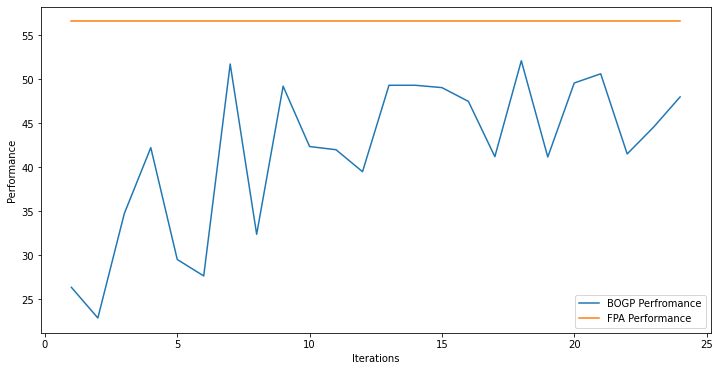

x_next is [ 29.99986132  29.974876    29.99445066  29.99868515  29.99496276
  29.99947892  29.99960793  29.96135811  29.99714473  29.99907781
  29.98488273 -30.99854266  29.99551892  29.98712139  29.9766575
  29.99964972  29.98840506  29.99014294  29.98634521  29.99651401]
f()=48.604842, actual=56.018
23


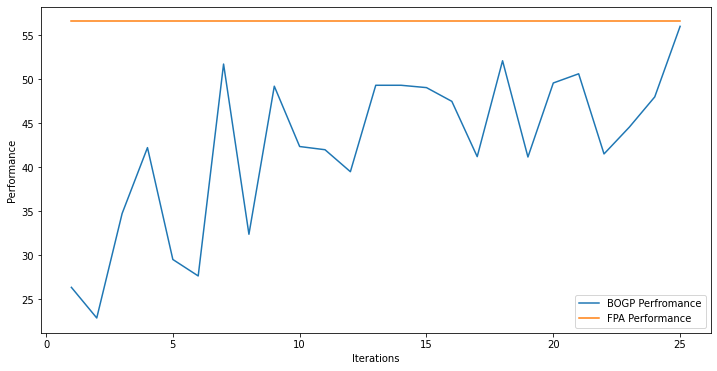

x_next is [ 29.99633247  29.9911887  -30.98871144  29.9901254   29.98889596
  29.99460639  29.9935363   29.99129518 -30.98432643  29.99298935
 -30.98892926 -30.99907468  29.98165669  29.99548374  29.99226006
  29.99716613  29.99545522  29.97236715  29.99461662  29.99373897]
f()=52.357928, actual=55.133
24


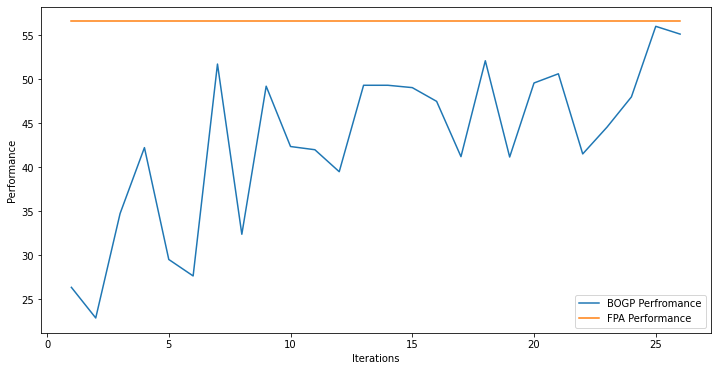

x_next is [ 29.99760691  29.99328632 -30.99594836  29.99372926  29.98412633
  29.99646233  29.9895935   29.99511947  29.99112012  29.98634839
  29.99229167 -30.99610807  29.99935613  29.99894437 -30.99495344
  29.99164664  29.99503084  29.99751966 -30.98453402  29.99448833]
f()=52.057310, actual=51.411
25


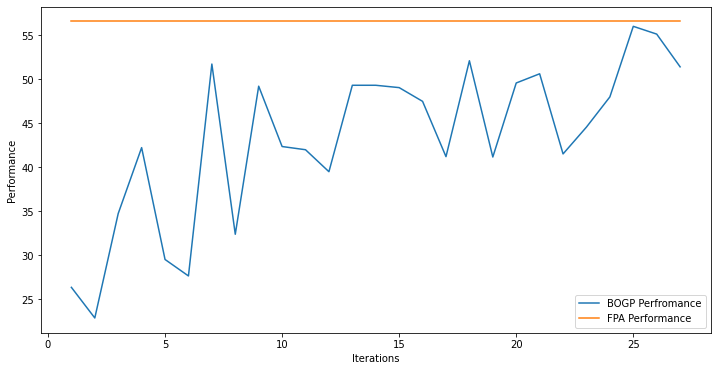

x_next is [ 29.99974907 -30.99656938 -30.99349891  29.99999313  29.99976911
  29.99276798  29.99474416  29.99826768  29.99981013 -30.98871454
  29.99737591 -30.99939658 -30.99637762  29.97038302  29.9926455
  29.99709854  29.99777467  29.99924235  29.99844209  29.99179809]
f()=47.091633, actual=51.563
26


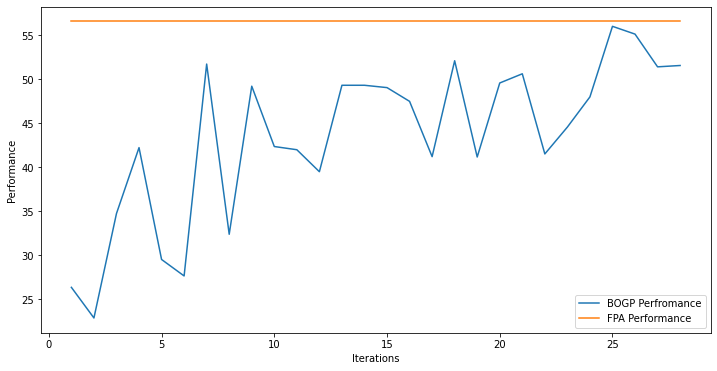

x_next is [ 29.98690303  29.97787613 -30.99582149  29.99484475  29.99678881
  29.99290913  29.99501283 -30.98647284  29.99906805  29.99178401
  29.99726407 -30.9854614   29.99315717  29.99614893  29.9935756
  29.99665611  29.99803248  29.99687913  29.98993654  29.98212909]
f()=56.178903, actual=54.398
27


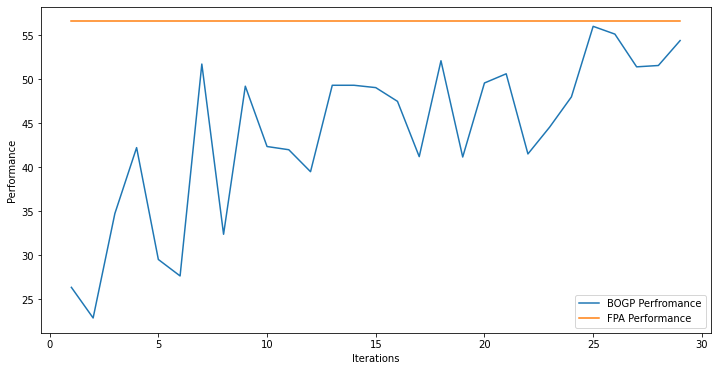

x_next is [ 29.98811074  29.98925468 -30.99869939  29.99216874  29.99319162
  29.99613568  29.99707174  29.98614131  29.99889626  29.98302025
  29.98407919 -30.99963471  29.99432693  29.99519431 -30.99945302
  29.99601492  29.99923626  29.99537899  29.99674998 -30.98551089]
f()=51.805488, actual=51.965
28


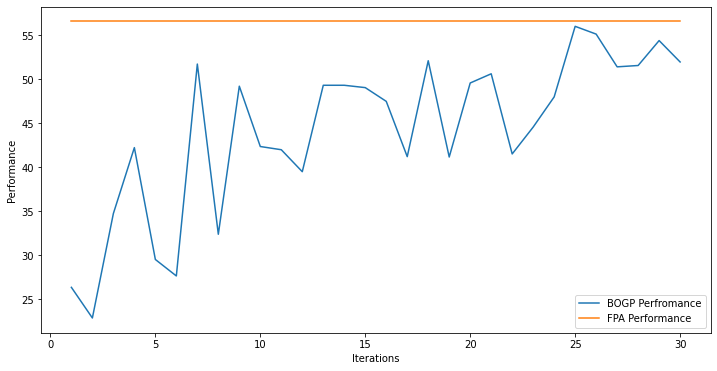

x_next is [ 29.9823075  -30.98917344  29.9967192   29.98166698  29.99132928
  29.99677217  29.99657893  29.9799475  -30.99471364  29.99714737
  29.99870625 -30.99724978  29.99202899  29.98824065  29.98086617
  29.98688741  29.99829377  29.98845057  29.99078899  29.99811627]
f()=53.300795, actual=55.071
29


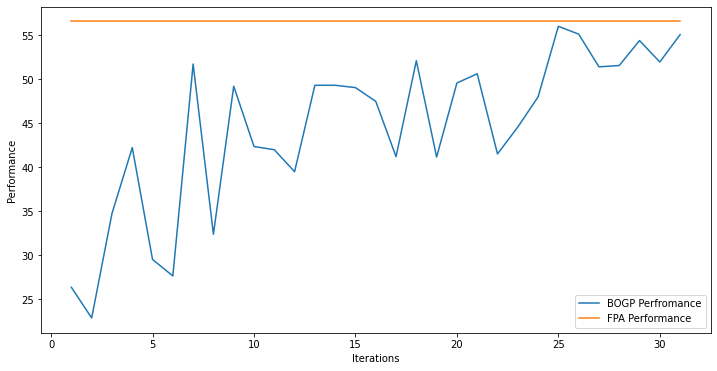

x_next is [ 29.98606242 -30.99864648 -30.99680349 -30.99989738  29.99491423
  29.9898632   29.98862194  29.99218234  29.9557773   29.99834223
  29.99918528 -30.99776829  29.99588622 -30.99176112 -30.97267648
  29.98713109  29.99966914  29.99984395  29.99862481  29.99213939]
f()=50.001395, actual=51.257
30


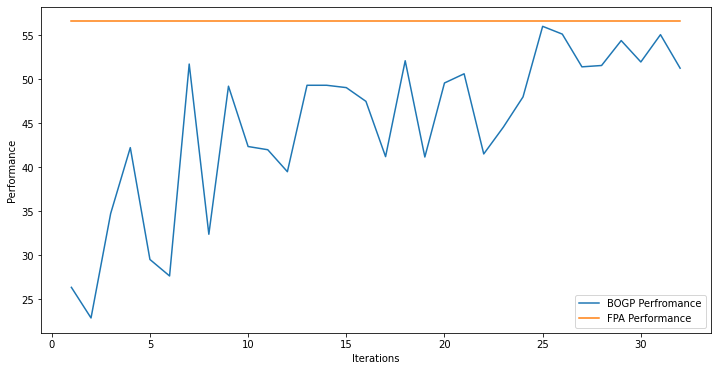

x_next is [-30.95491923  29.9985856  -30.99065379  29.97176096  29.99774226
  29.98857829  29.98243014  29.98869432 -30.98151919  29.9795878
  29.99621613 -30.99979126  29.99568849  29.99835683  29.93908844
  29.99063076  29.980923    29.99287348  29.9986981   29.99532018]
f()=53.941465, actual=51.786
31


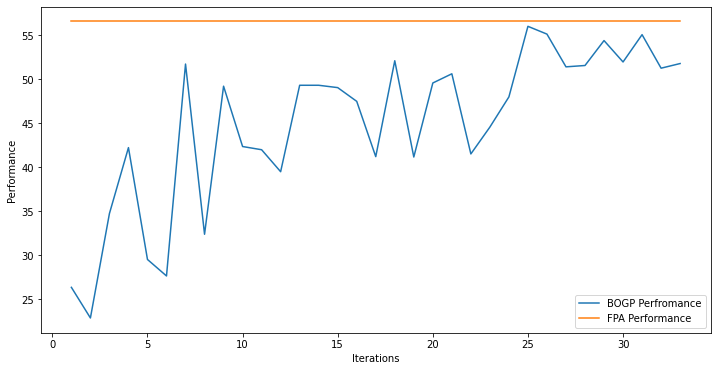

x_next is [ 29.98656396  29.98038559  29.99239187  29.99160296  29.99527206
  29.99612597  29.99597083  29.99759028  29.98855985 -30.97992505
 -30.9644043  -30.9879784   29.98775467  29.98881965 -30.99797233
  29.99289069  29.99093528  29.99173292  29.99457761  29.98606404]
f()=53.377116, actual=55.506
32


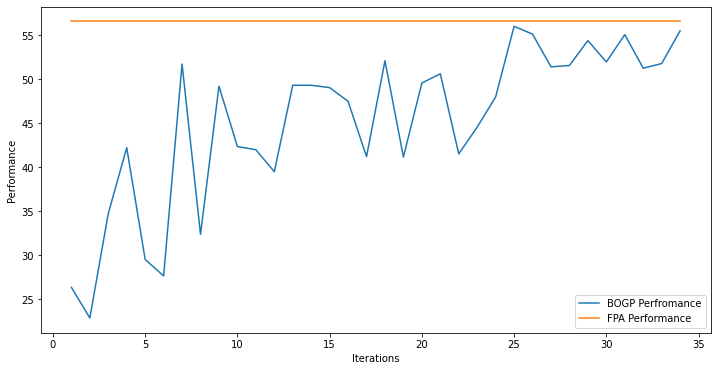

x_next is [ 29.93970367  29.88508534 -30.9708906   29.95393347  29.98748997
  29.9652969   29.98655678  29.88822227  29.91846362 -30.97794885
 -30.91041529 -30.9541638   29.9592478  -30.97085296  29.92899374
  29.98131042  29.97562885  29.99366436  29.97731106  29.96598845]
f()=52.669423, actual=53.890
33


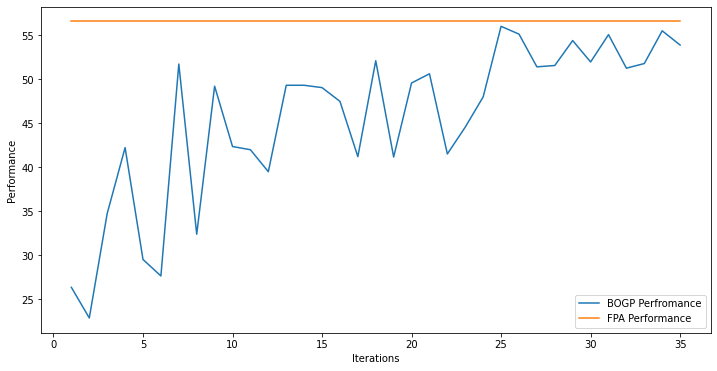

x_next is [ 29.99700673 -30.9832677   29.98797253  29.98436679  29.99570673
  29.98807458  29.98993633  29.97132436  29.98034501 -30.94358395
  29.99358933 -30.99863934  29.97236634  29.99013589 -30.99003872
  29.99918255  29.99726891  29.98016414  29.99937226  29.98693065]
f()=54.844506, actual=54.005
34


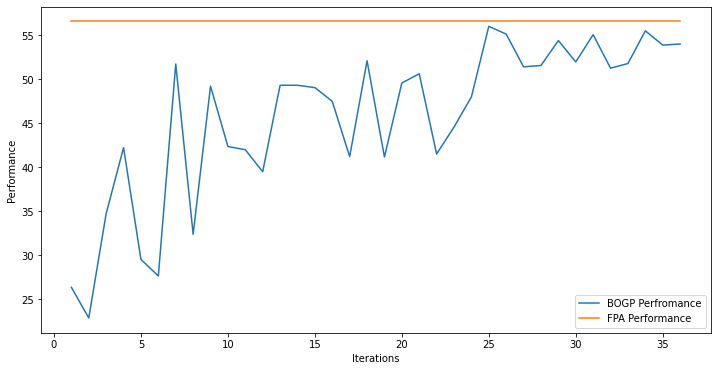

x_next is [ 29.99966434  29.9582918  -30.9830979   29.98560444  29.99893033
  29.9651749   29.99165215  29.99865238  29.99476527  29.96027606
  29.99278068  29.99840997  29.9820573   29.9981236  -30.99653296
  29.99817421  29.98721519  29.98494314  29.99998089  29.99980725]
f()=52.671719, actual=55.488
35


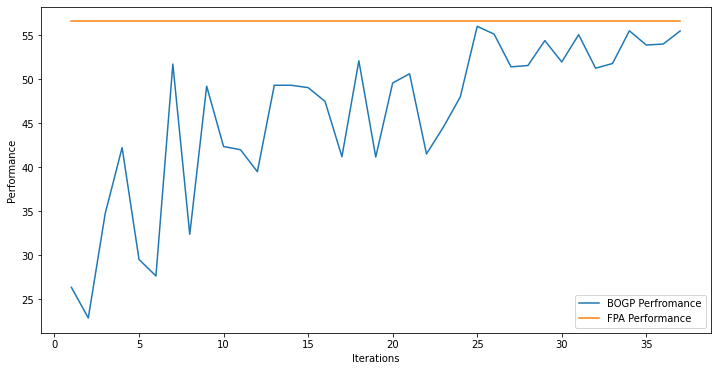

x_next is [ 29.9803451   29.97883036 -30.96876091 -30.99331028  29.99492345
  29.98569414  29.99124177  29.97245952  29.96373793 -30.98346556
  29.92582027 -30.98197485  29.99205379  29.98846963  29.96054702
  29.99456259  29.97919846  29.99358145  29.9997315   29.97527553]
f()=53.520196, actual=54.185
36


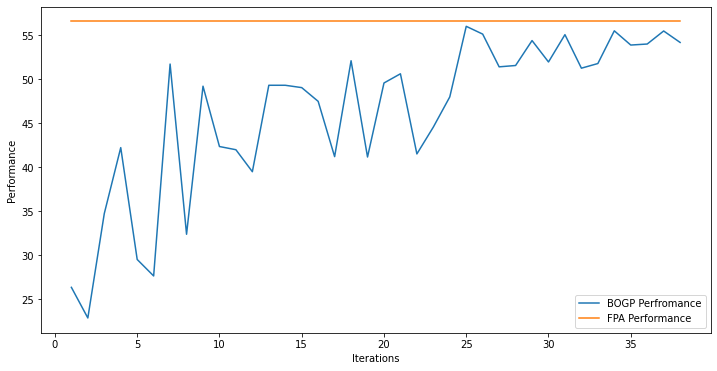

x_next is [ 29.99648008  29.99330881  29.95885433  29.99755838  29.99420125
  29.99103371  29.97309519  29.95598525 -30.99826464 -30.97263083
  29.97986437  29.98672275  29.99918704  29.99855205  29.97146822
  29.97071021  29.98789917  29.99616229  29.97603432  29.9798178 ]
f()=52.849348, actual=56.805
37


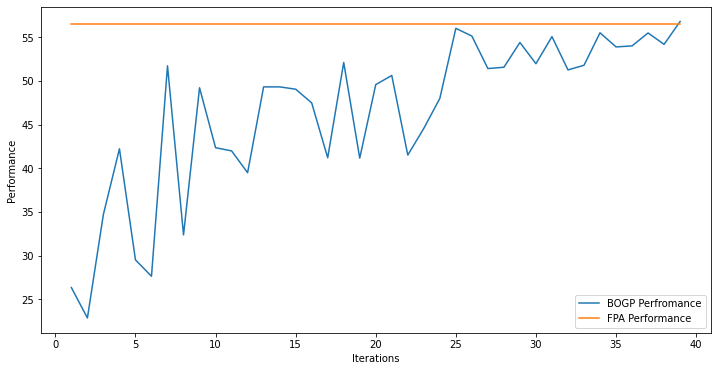

x_next is [ 29.99643681  29.97637406  29.98634834  29.98236902  29.98958673
  29.98582708  29.99409609  29.99064129  29.98803309 -30.98597991
 -30.98837865  29.96214672  29.99408331  29.98434251  29.98897261
  29.99923851  29.98596361  29.98525587  29.98501504  29.98014351]
f()=55.087527, actual=57.219
38


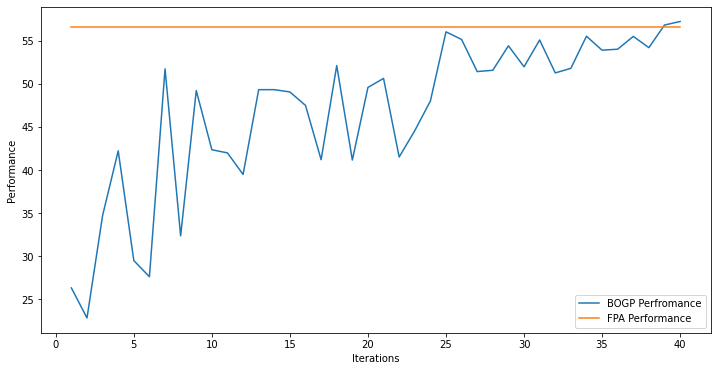

x_next is [ 29.99664901 -30.98039    -30.99569591  29.9914687   29.99853587
  29.9896047   29.99123951  29.9828124  -30.98906335 -30.96351839
 -30.97704242  29.98276933  29.97141146  29.98662428 -30.97200457
  29.99392918  29.98454756  29.99080964  29.97876463  29.99513662]
f()=52.672632, actual=54.120
39


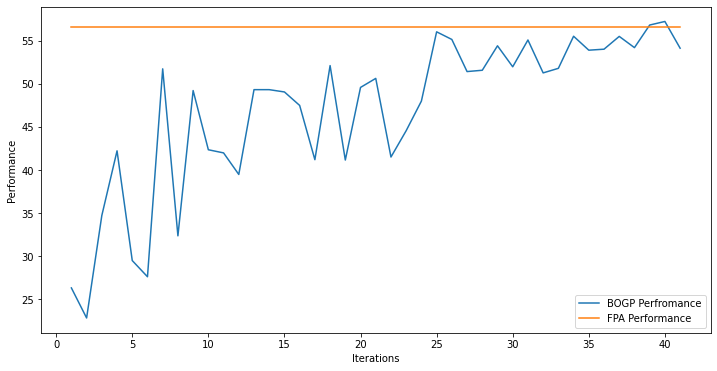

x_next is [ 29.97944283  29.97506519 -30.99268292  29.98398899  29.99049178
  29.96979243  29.98928731  29.92484779  29.99783173 -30.99650291
  29.99561218  29.99382326  29.98710331  29.95446725  29.9333022
  29.99567376  29.95324567  29.99637185  29.98995113  29.99294559]
f()=56.701997, actual=56.872
40


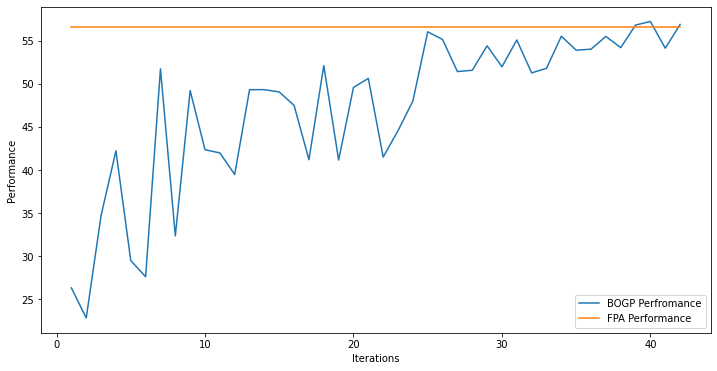

x_next is [ 29.98644405  29.97734381  29.95484647  29.98259155  29.99316853
  29.98118334  29.96608802  29.99102719 -30.98803427  29.99282953
 -30.95072327  29.93818311  29.99764563  29.95939632 -30.98231112
  29.99373082  29.99920657  29.97970049  29.97650226  29.99322189]
f()=54.846725, actual=55.407
41


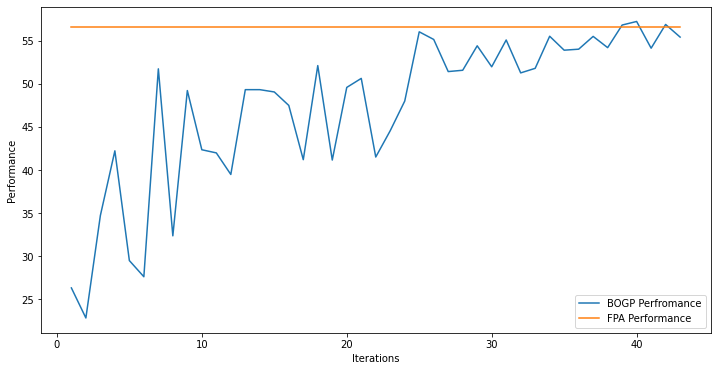

x_next is [ 29.99254759  29.97965419  29.98573142  29.99028915  29.99580606
  29.99456486  29.99904839 -30.99781584 -30.97534402 -30.99305134
 -30.99555962  29.97713844  29.99010675  29.98292585  29.99577112
  29.99915722  29.99052026  29.98819908  29.98564474  29.98733288]
f()=54.619684, actual=55.486
42


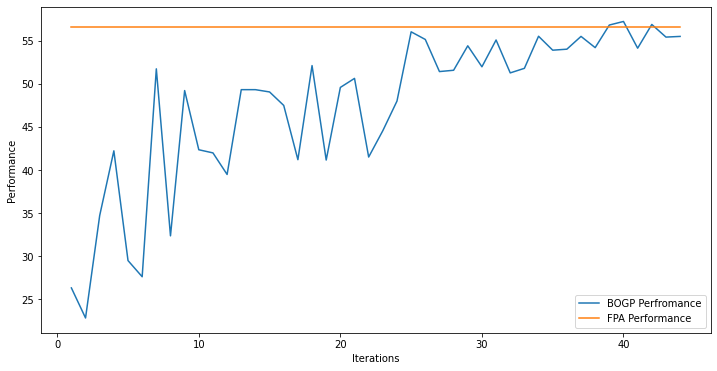

x_next is [ 29.98562928 -30.98027296  29.9904516   29.99557881  29.9960647
  29.99825454  29.98020032  29.99893929  29.96494568  29.97378184
 -30.99302193  29.96534643  29.97082582  29.99215552  29.94019338
  29.99791294  29.98125461  29.98182354  29.9918382   29.98953956]
f()=54.428778, actual=56.020
43


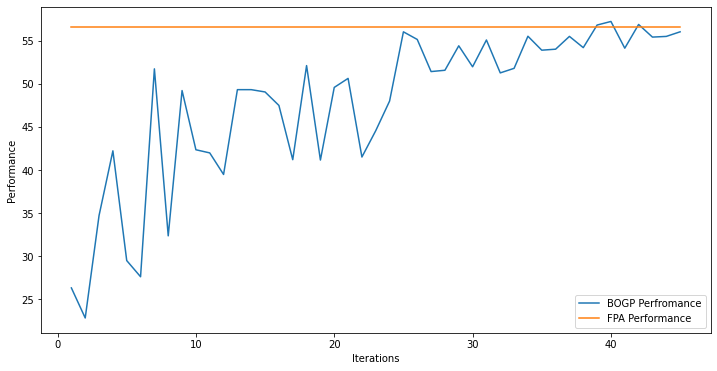

x_next is [ 29.98459886  29.97053119  29.94696232  29.98534201  29.97133714
  29.97774113  29.96301578 -30.9956404   29.944079   -30.9947395
  29.99035808  29.97800231  29.99936952  29.97361532  29.99289997
  29.99591354  29.98579877  29.99163433  29.96902783  29.9794089 ]
f()=55.497963, actual=55.806
44


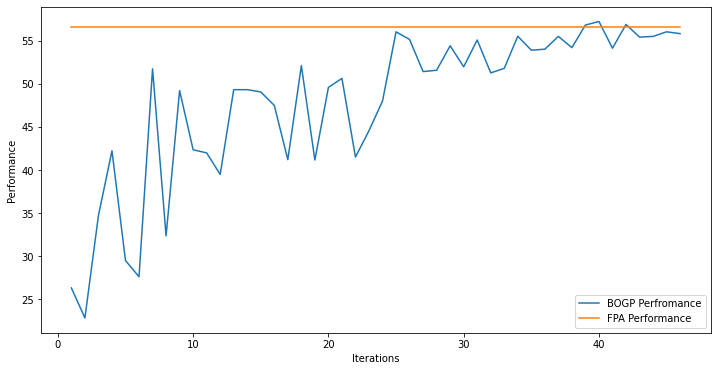

x_next is [ 29.99918581  29.96682928  29.99297604  29.9882489   29.98618981
 -30.94180629  29.99735835  29.97698522  29.99888286 -30.9648255
  29.93726269  29.99291865  29.97918763  29.93850595  29.97261511
  29.99695656  29.98364692  29.98446368  29.99902093  29.98268268]
f()=54.194126, actual=54.145
45


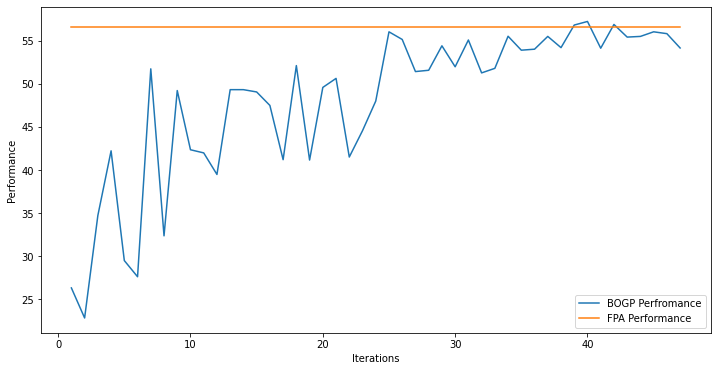

x_next is [ 29.98680015  29.99674536 -30.86194142  29.99115579  29.99186271
  29.96917856  29.95540053  29.97455315  29.98709021  29.96120613
 -30.95466814  29.87762938  29.99089882  29.97135734  29.96817546
  29.97666373  29.97856274  29.96923746  29.99443518  29.98469739]
f()=56.108886, actual=56.354
46


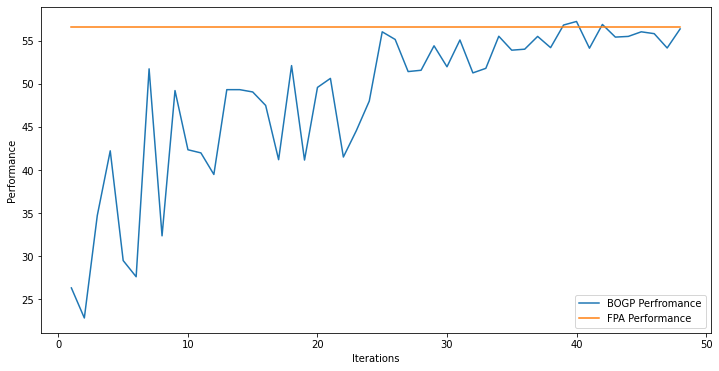

x_next is [ 29.98252109 -30.91237655 -30.95626319  29.96876061  29.98472193
  29.9931015   29.96261397  29.99328874 -30.87844495  29.97524654
  29.99878622  29.99887266  29.97033882  29.98236153  29.93878323
  29.99124802  29.99959743  29.95633844  29.99025434  29.9794539 ]
f()=55.090491, actual=55.321
47


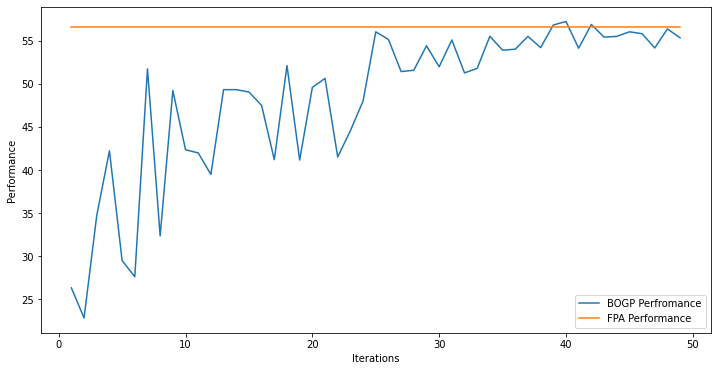

x_next is [ 29.98369391  29.98460549 -30.96046445  29.96798873  29.98980461
  29.96095208  29.99436072 -30.9190952   29.98565482 -30.87367655
 -30.96921847  29.93704398  29.97378004  29.94717732 -30.97738982
  29.97002099  29.9902237   29.98930439  29.98030703  29.98063689]
f()=54.615727, actual=54.921
48


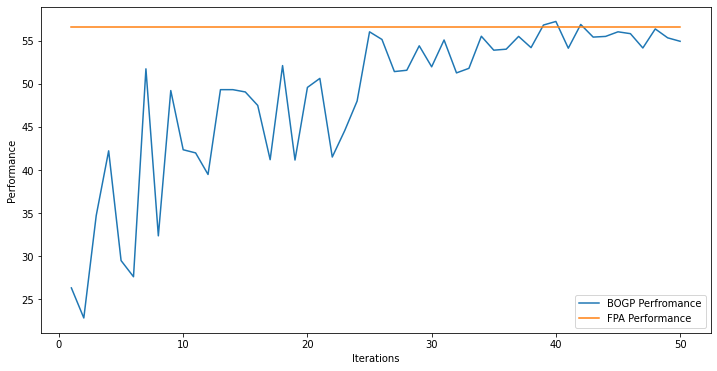

x_next is [ 29.98341183  29.96013877  29.99898037  29.96519396  29.99375919
  29.99373975  29.92175983  29.97817254  29.89758036  29.96512871
  29.83987935  29.99187003  29.95510313 -30.95943557  29.9601509
  29.99523609  29.96023071  29.95150316  29.96540659  29.957066  ]
f()=54.431241, actual=55.723
49


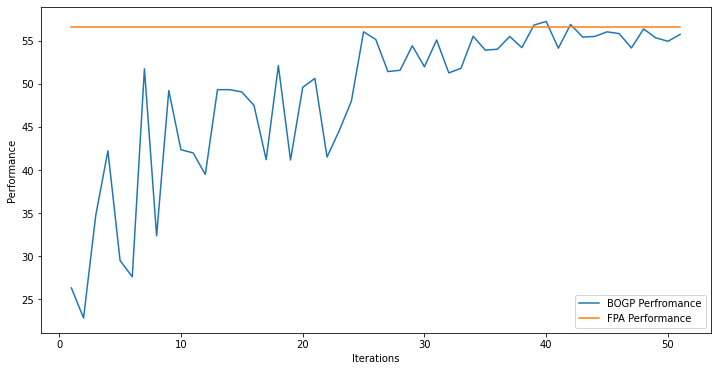

x_next is [ 29.97801931  29.64092646 -30.82543214  29.96425791  29.98240022
  29.97710563  29.85468155 -30.68517738 -30.86291779 -30.98400504
  29.85676611 -30.96729906  29.87915889  29.90563554 -30.93053548
  29.96441866  29.98574166  29.94648957  29.91856322  29.99904593]
f()=55.749200, actual=53.656
50


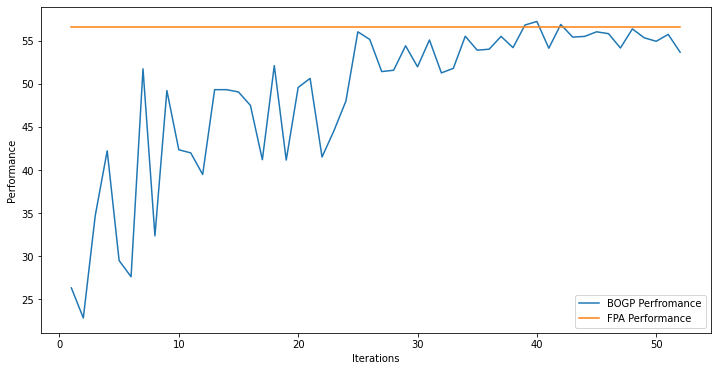

x_next is [ 29.96291083  29.91541118  29.90545596  29.98225175  29.97295637
  29.97220155 -30.98167628  29.97305875  29.91291795  29.96980804
  29.92968309  29.99209875  29.99176023  29.99069159  29.94673686
  29.99800424  29.95622416  29.99856339  29.97369305  29.99733069]
f()=54.159476, actual=55.276
51


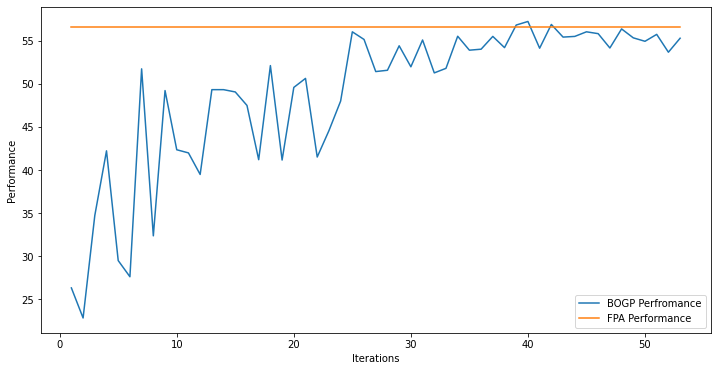

x_next is [ 29.97309054  29.63311748  29.86832921  29.95479436  29.93288047
  29.89898728  29.96746095  29.93976216 -30.98199898  29.96198702
  29.686747    29.85643548  29.92086802  29.77785461  29.9423455
  29.95538823  29.93698031  29.74883705  29.91691584  29.95179072]
f()=56.667063, actual=56.128
52


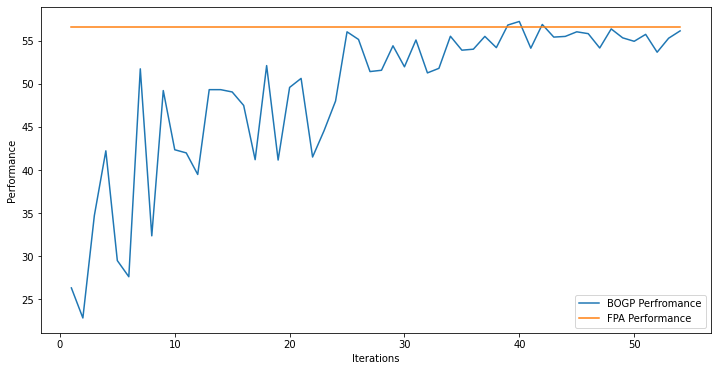

x_next is [ 29.88661613 -30.94560325  29.62147548  29.99331426  29.999284
  29.98519092  29.98095678  29.91365154  29.98697709 -30.91308199
  29.95577024  29.99146896  29.99699162  29.980094    29.84419001
  29.90538168  29.92836796  29.94614024  29.9214765   29.94177242]
f()=56.068367, actual=55.446
53


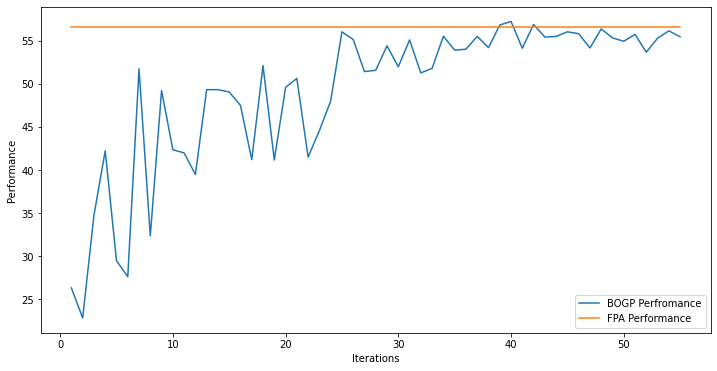

x_next is [ 29.84193373  29.86392741 -30.70805564  29.86907086  29.98961093
  29.84144865  29.94392215  29.86634452 -30.6569889  -30.91546918
 -30.98958072  29.82090458  29.974671    29.76874186  29.93218034
  29.9910805   29.77792147  29.91839395  29.94950248  29.93541651]
f()=56.194223, actual=56.560
54


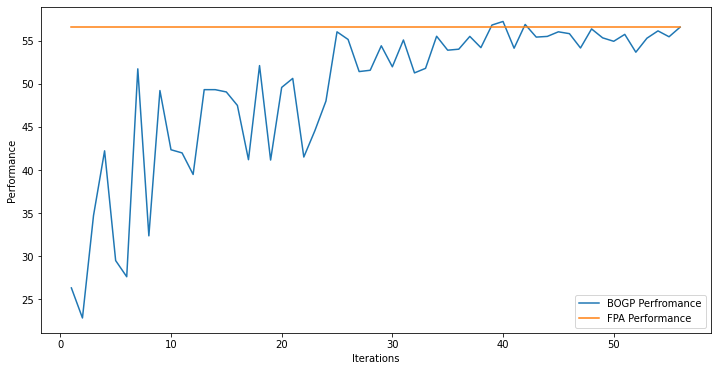

x_next is [ 29.82907456  29.84551749  29.79421627  29.87258169  29.92048007
  29.87957626  29.9213147   29.78315222  29.59547861  29.9622703
 -30.91579947  29.54220767  29.87546469  29.98182868  29.93726882
  29.96573539  29.92833314  29.87174386  29.90263105  29.85760859]
f()=56.834166, actual=56.551
55


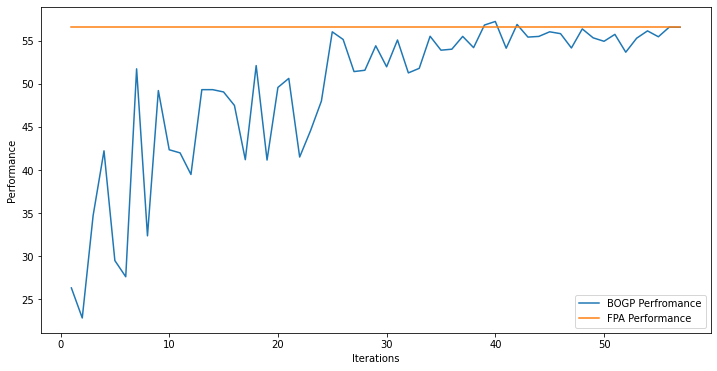

x_next is [ 29.94821453  29.77884825 -30.9461328   29.89333276  29.92753559
  29.7364688   29.90766222  29.96966591  29.55340819 -30.27291728
 -30.59881142  29.85519072  29.88308449  29.75777084  29.57539082
  29.96646287  29.93837606  29.97954675  29.97526291  29.90526463]
f()=56.900181, actual=56.874
56


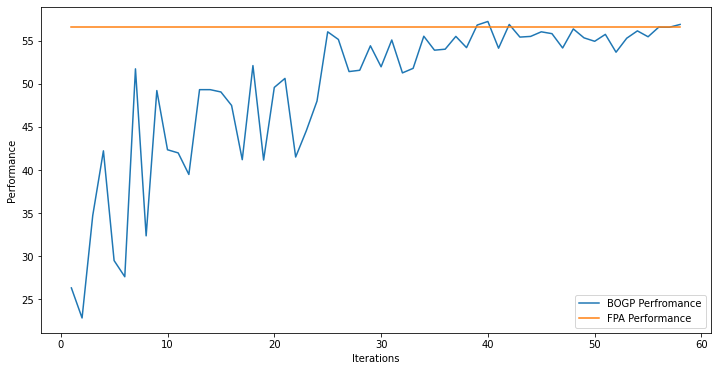

x_next is [ 29.98154863  29.98971198  29.83685571  29.90444995  29.79795632
  29.96757878  29.91651342  29.99782576  29.96488213 -30.57385628
  29.99183954  29.86449787  29.98102721  29.75841785 -30.89393391
  29.98879105  29.90674518  29.97854753  29.87948669  29.89662499]
f()=55.971049, actual=56.384
57


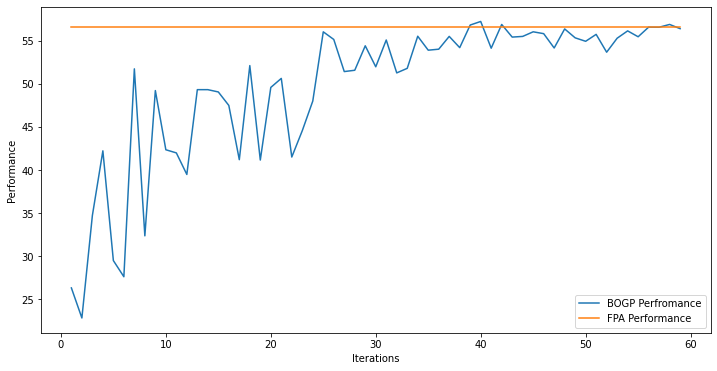

x_next is [ 29.925649    29.84645315  29.90053183 -30.69432919  29.90885345
  29.94604429  29.99063347  29.99434306 -30.74816898 -30.73303483
 -30.93229078  29.97138483  29.88102664  29.95393122  29.95206229
  29.95453109  29.99920311  29.98060662  29.97972589  29.97806038]
f()=53.606855, actual=55.626
58


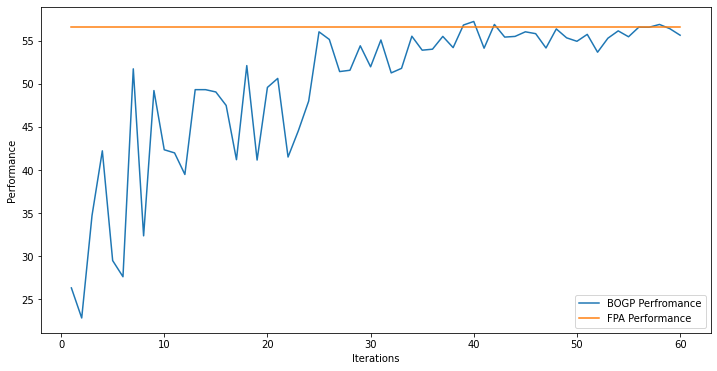

x_next is [ 29.91610634  29.51323411  29.98476774  29.85018534  29.89869901
  29.9923204   29.82138196  29.33325927 -30.93032434 -30.93499138
 -30.89821429  29.41394435  29.62146066  29.79593312  29.25289101
  29.92692162  29.69581256  29.99846681  29.97790278  29.74782848]
f()=56.864371, actual=56.388
59


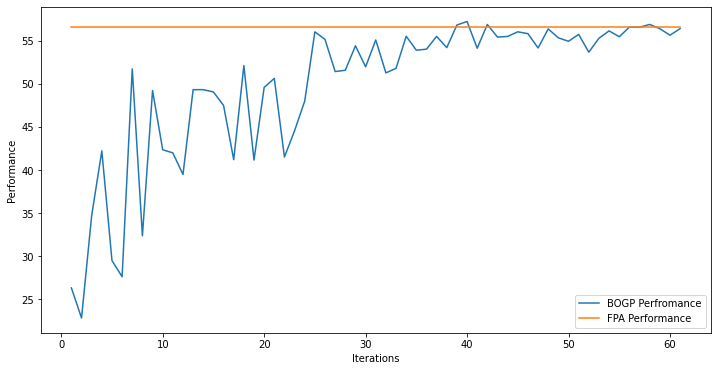

x_next is [ 29.72256494  29.85384605  28.98368765  29.92743511  29.84288398
  29.86944221  29.98669033  29.98403267  29.55224652 -30.05835783
  29.46940678  29.91687731  29.64547789  29.88369903  29.52742846
  29.93520065  29.71981794  29.97676695  29.97547653  29.99076781]
f()=57.058282, actual=56.977
60


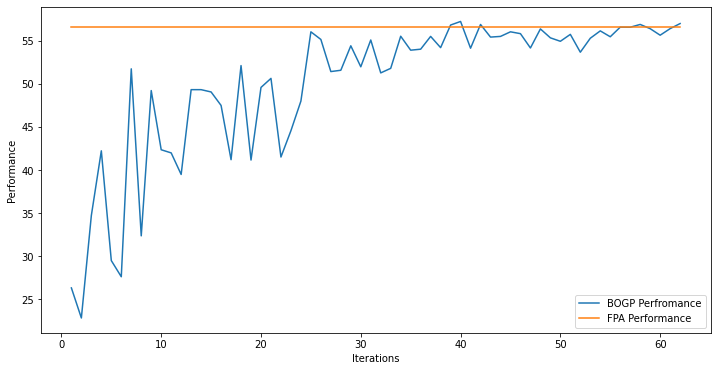

x_next is [ 29.99456367  29.8525509  -30.7515187   29.86574649  29.9923116
  29.8931628   29.9963644   29.94066171 -30.88916903 -30.99158379
  29.72191185  29.96100885  29.9987469  -30.82665126  29.92421933
  29.98193272  29.89648482  29.99671502  29.95200615  29.99889232]
f()=54.795272, actual=54.523
61


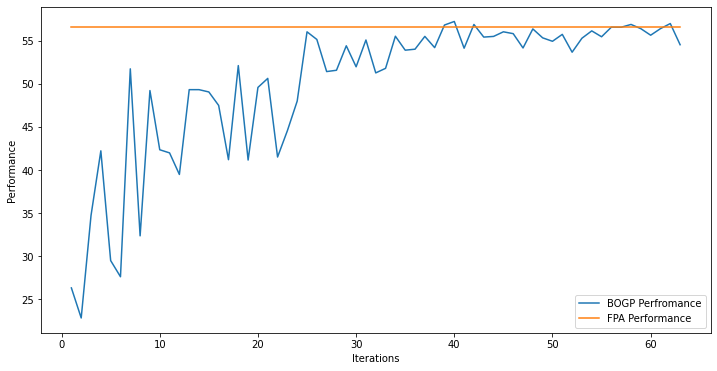

x_next is [ 29.97658893  29.99412008  29.84390954 -30.91065149  29.88898246
  29.92006453  29.99391829  29.9822539   29.92860124  29.91670109
  29.9548989   29.98039712  29.96967717  29.77798804  29.97479774
  29.94633946  29.90526259  29.86782263  29.97464349  29.98614589]
f()=55.088062, actual=54.993
62


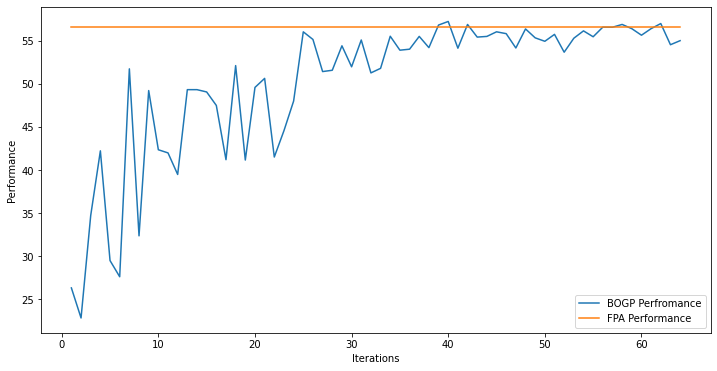

x_next is [ 29.98609015  29.97913717  29.88478122  29.9123726   29.99146888
  29.92529899  29.79696592  29.80189946  29.84348021 -30.9882504
 -30.94779021  29.93877385  29.99106668  29.94478725 -30.93486382
  29.96825164  29.88757364  29.93826063  29.98677359  29.96623453]
f()=56.439680, actual=56.471
63


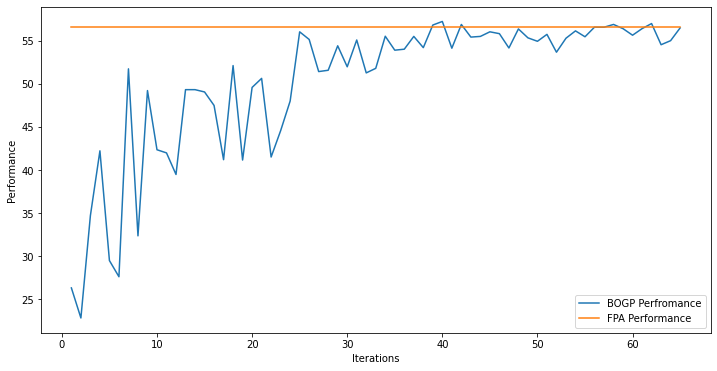

x_next is [29.59117067 29.92268998 29.00803968 29.72862068 29.87317923 29.95662879
 29.76299672 29.84419843 29.99535764 29.98815165 29.17524786 29.67992756
 29.9765111  29.92692604 29.76567072 29.92540386 29.9661953  29.87425443
 29.92738379 29.82309511]
f()=56.677799, actual=56.521
64


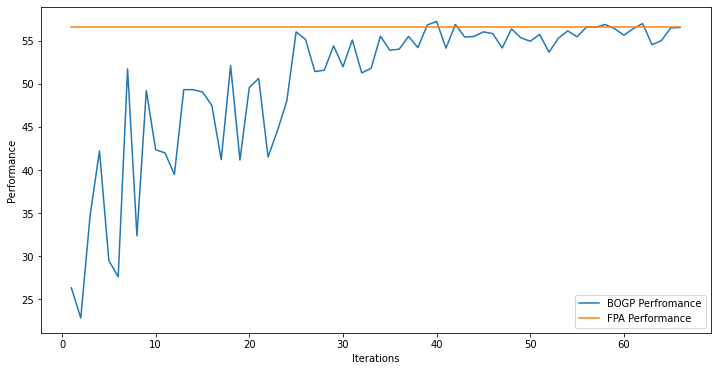

x_next is [ 29.9200657   29.98131173  29.15759649  29.99057645  29.9700964
  29.47060652  29.74807766  28.64972902  29.20624549 -30.59950512
   0.68545645  29.99108344  29.39244389  29.84708167  28.19388563
  29.49912666  28.95813988  29.9765231   29.53159029  29.39905988]
f()=56.528787, actual=56.792
65


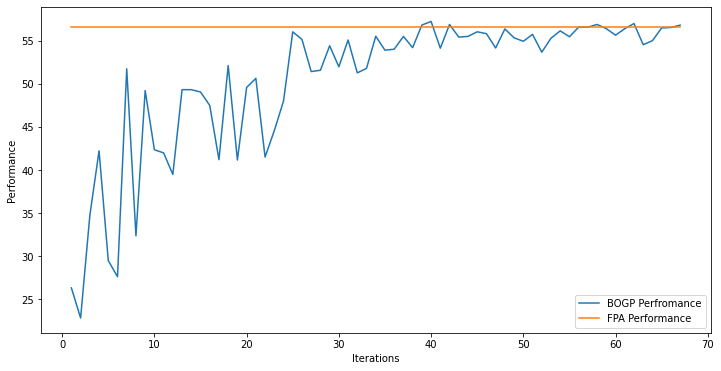

x_next is [ 29.80239591  29.92598122 -30.86360836  29.9459262   29.95012283
  29.99559325 -30.49761416  29.97158307  29.97285575 -30.85511188
 -30.60863283  29.78308151  29.97970168  29.8611049   29.92616859
  29.94593278  29.87921661  29.96751013  29.94460217  29.88001855]
f()=54.789776, actual=55.620
66


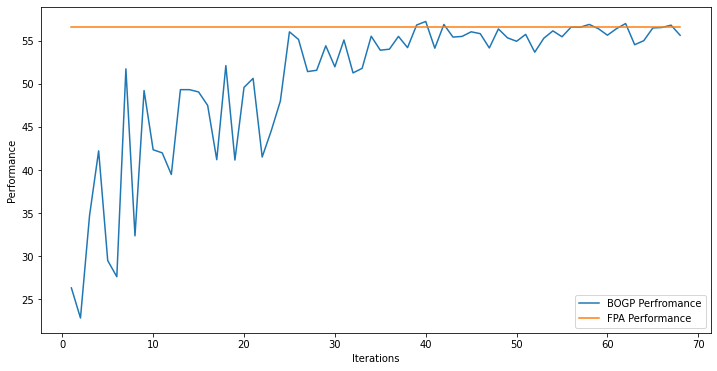

x_next is [ 29.71457078  28.87118942  -3.94583422  29.6225918   29.79263353
  29.86526745  29.42855541  29.93749244  29.0305923  -25.98491866
 -13.64080633  29.50602015  29.87322253  29.11902868  26.94497706
  29.83388539  29.99681006  29.7309792   29.85882354  29.64353341]
f()=56.404201, actual=56.303
67


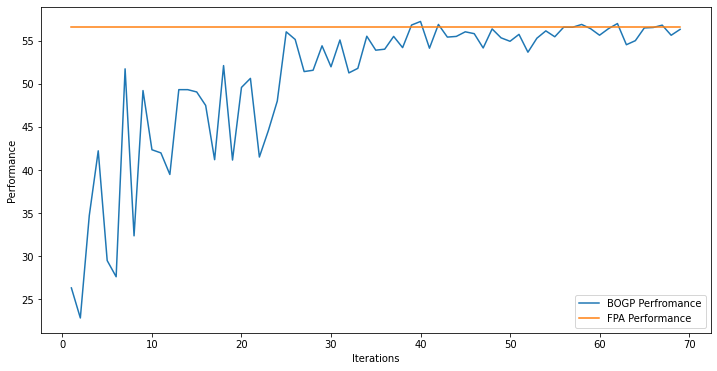

x_next is [ 29.89911237  29.77385722  29.68372886  29.78507877  29.91258125
  29.9723572   29.89893977  29.90729652 -30.78149126 -30.48988839
  29.42276963 -30.56903042  29.83010355  29.93224256  29.58571128
  29.96392164  29.90838747  29.77134629  29.89917525  29.99602312]
f()=55.713128, actual=56.042
68


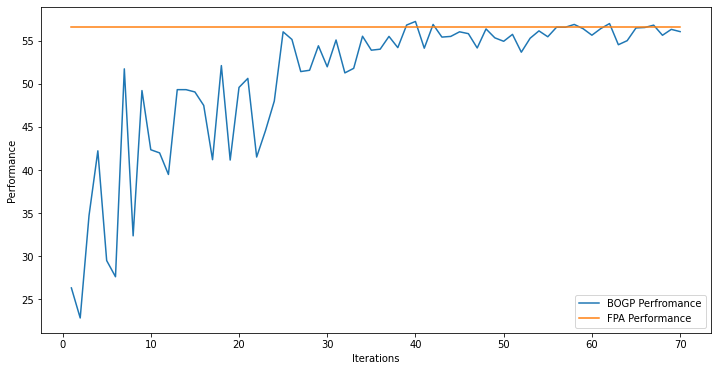

x_next is [ 29.94118177  29.90173763 -30.95727896  29.99860737  30.
  29.99951494  29.77814179  29.90321185 -30.55546823 -30.6265213
  29.5305194   29.86288651  29.95801936  29.76100429  29.93906702
  29.96988746  29.98840305  29.96177624  29.99986934  29.93441981]
f()=56.490062, actual=56.431
69


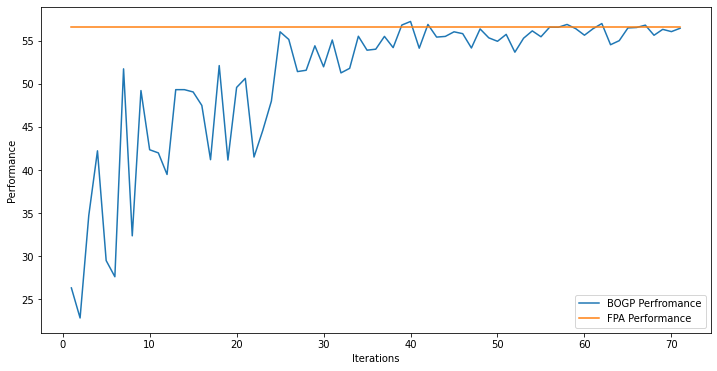

x_next is [ 29.90814649  29.55562125  29.87027527  29.91596733  29.63084224
  29.847271    29.80180026  28.29760402  29.95992466 -30.57998188
 -12.79255928  29.4951494   29.75012637  29.74457933  28.86386933
  29.93696616  29.76487115  29.58819308  29.61173506  29.49375035]
f()=56.894660, actual=56.807
70


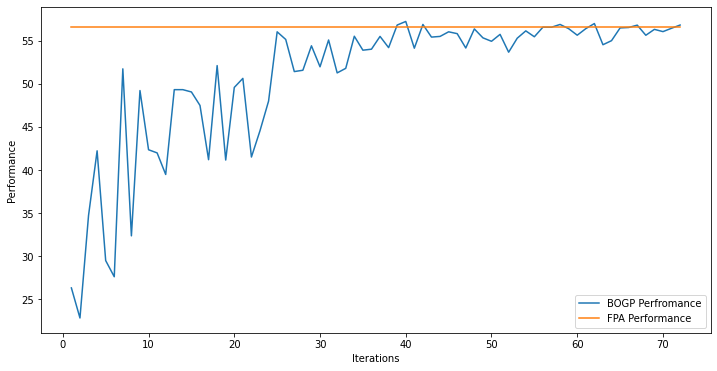

x_next is [ 29.73918548  29.80480126  28.42911028  29.63562371  29.50060209
  29.75250589  29.62110001  29.74886881  29.92139337 -30.4593232
  14.48690707  29.75199065  29.74246992  28.89721853  29.3817645
  29.59050307  29.8999567   29.26350344  29.85452162  29.88882249]
f()=56.835447, actual=57.024
71


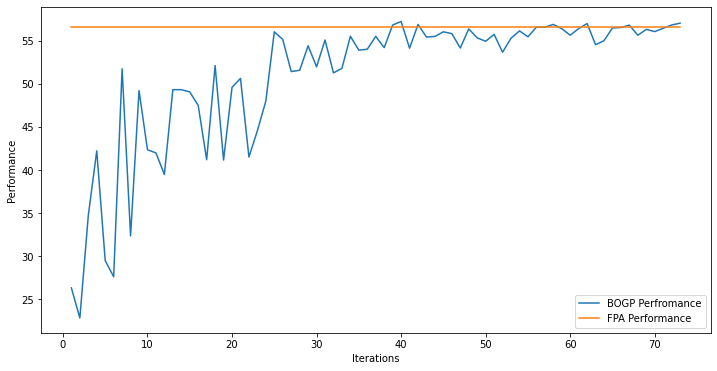

x_next is [ 29.99999706  29.85786044  29.66543521  29.9186632   29.98793508
  29.88346401 -30.91462813  29.75166331 -30.9374333  -30.6920914
  29.76244927  29.82732534  29.88794097  29.69874336  29.96913483
  29.99999636  29.95286721  29.99996572  29.96217595  29.80096865]
f()=54.976835, actual=55.393
72


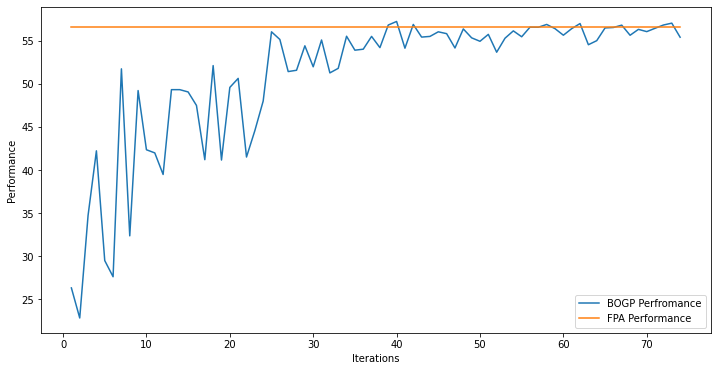

x_next is [ 29.99579025  29.98929333  29.9912959   29.98268916  29.99527767
  29.97169404  29.97627653  29.95911628  29.9752007   29.99454408
 -30.99105537  29.93920606  29.977029   -30.98094817 -30.99235465
  29.99620528  29.99519558  29.98237383  29.9984149   29.99222803]
f()=54.453098, actual=54.864
73


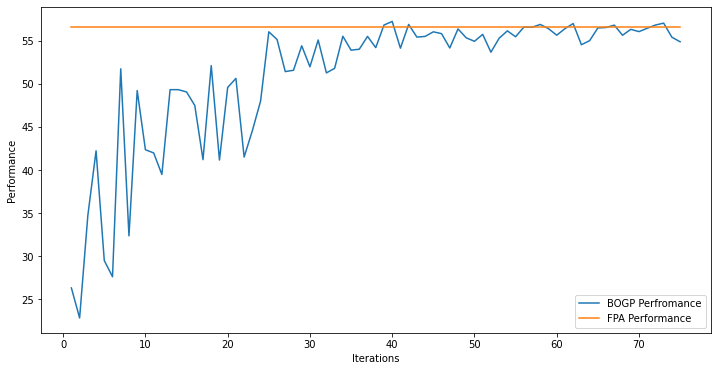

x_next is [ 29.7486617   27.86785727  27.20889604  29.95662769  29.9740809
  29.99886797  29.5620294   29.79594781  29.23206264 -28.13520395
  13.30380979  29.93055756  29.80663444  29.65125158  29.26126036
  29.52496462  29.77427488  29.98909345  29.69073733  29.97942807]
f()=56.980357, actual=56.517
74


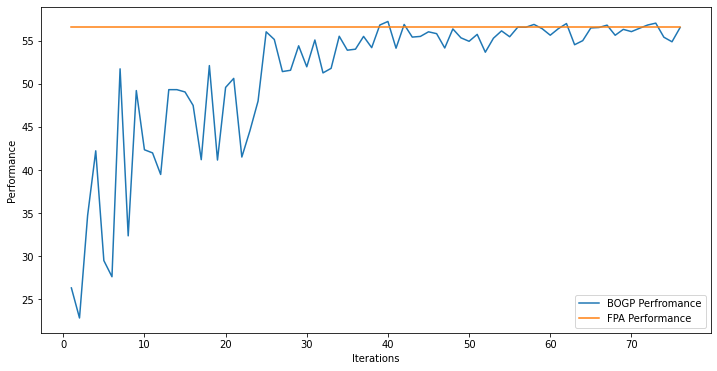

x_next is [ 29.99978936  29.99994361  29.99993634  29.99994278  29.99990314
  29.99985732  29.99975819  29.9999478   29.99964022 -30.99983996
 -30.99997126  29.99983415  29.99997264  29.99993563  29.99999074
  29.99984319  29.99984762  29.99991973  29.99998905  29.99988415]
f()=57.252282, actual=57.221
75


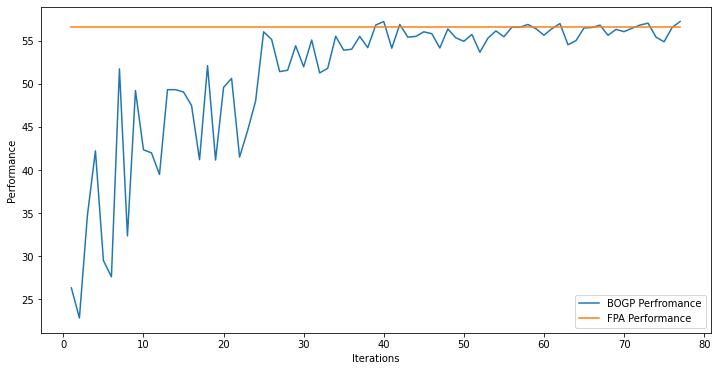

x_next is [ 29.99988954  29.9999804   29.99992813  29.99973736  29.99982276
  29.99997671  29.99999072  29.99996413  29.99966872 -30.99979729
  29.99984855  29.99997943  29.99995922  29.99983496  29.99986252
  29.99995884  29.99985096  29.99994772  29.99987757  29.99996903]
f()=57.214794, actual=57.130
76


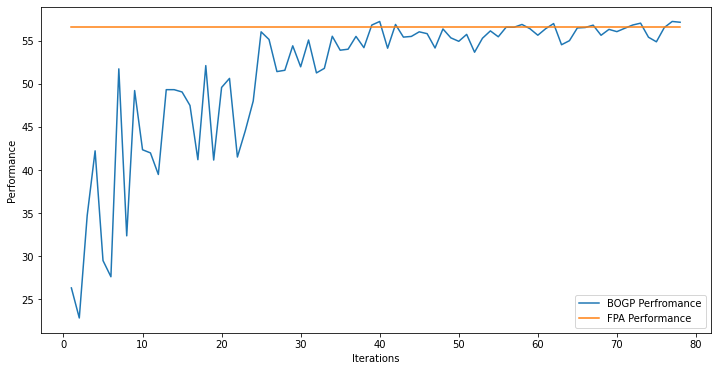

x_next is [ 29.99977559  29.99954576  29.9998624   29.99981662  29.99994502
  29.99996268  29.99968415  29.99990381  29.99984196 -30.99997663
 -30.99993879  29.99998252  29.99992688  29.99990955  29.99956597
  29.99982078  29.99990579  29.99980342  29.99984825  29.99989626]
f()=57.235097, actual=57.221
77


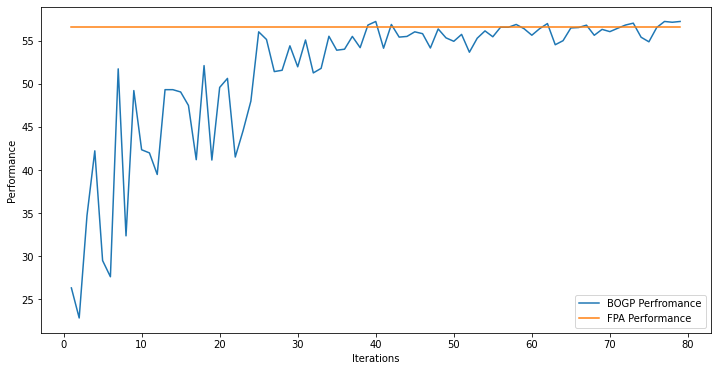

x_next is [ 29.99994512  29.99992035  29.99930909  29.99943851  29.99993631
  29.9999519   29.99970144  29.99979058  29.99920114 -30.9996875
 -30.99924009  29.99990355  29.9996586   29.99978819  29.99951543
  29.99999393  29.99995264  29.9998994   29.99994659  29.99988205]
f()=57.229802, actual=57.221
78


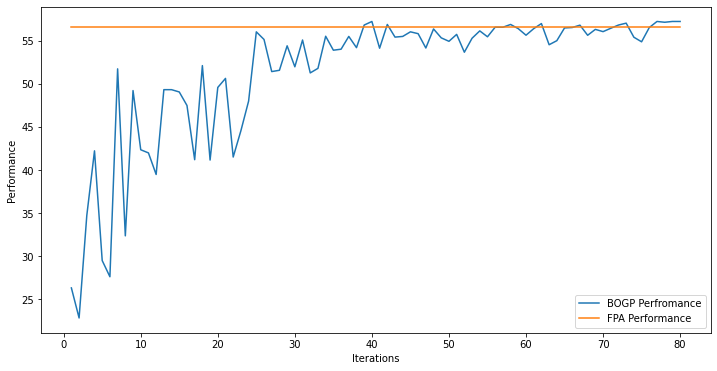

x_next is [ 29.99988716  29.99997028 -30.99977845 -30.99979148  29.99989738
  29.99976805  29.99997224  29.99999232  29.99993247 -30.99985182
 -30.99991817  29.99982826  29.99994189  29.99997109  29.99977746
  29.99972836  29.99999841  29.99987333  29.99997222  29.99997448]
f()=55.440546, actual=55.832
79


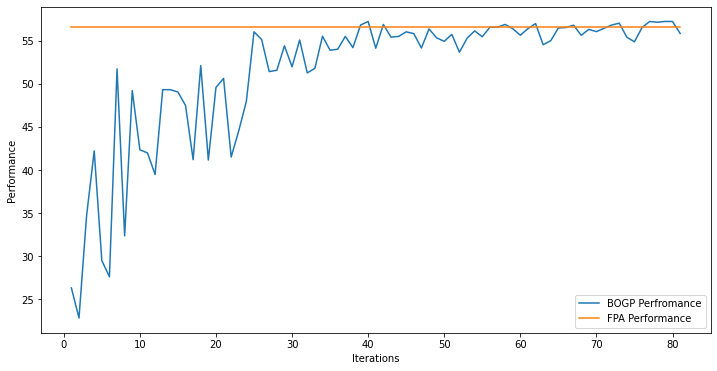

x_next is [ 29.9999036   29.99999953  29.99946527  29.9999115   29.99995069
  29.99984112  29.99997179  29.9998487   29.9994978  -30.99962237
 -30.99996967  29.99977724  29.99988435  29.99983526  29.99963942
  29.9997249   29.99997173  29.99976539  29.99997898  29.99964102]
f()=57.227396, actual=57.221
80


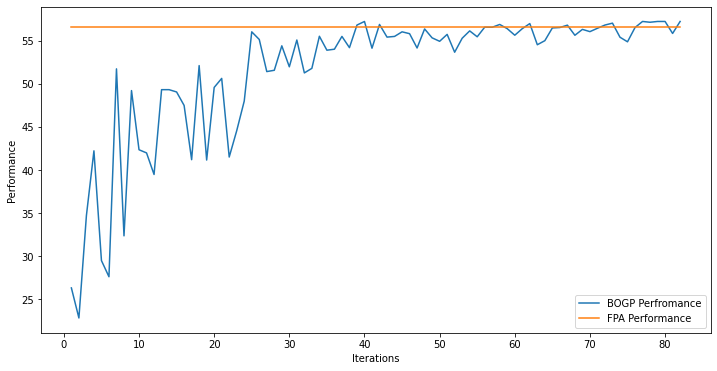

x_next is [ 29.99996704  29.99967521  29.99959542  29.99972833  29.99975029
  29.99995404  29.99995048  29.99964176  29.99999747 -30.99985927
  -2.53295415  29.99907884  29.99963852  29.99997477  29.999889
  29.99994689  29.99986389  29.99992067  29.99997319  29.999781  ]
f()=57.186869, actual=57.220
81


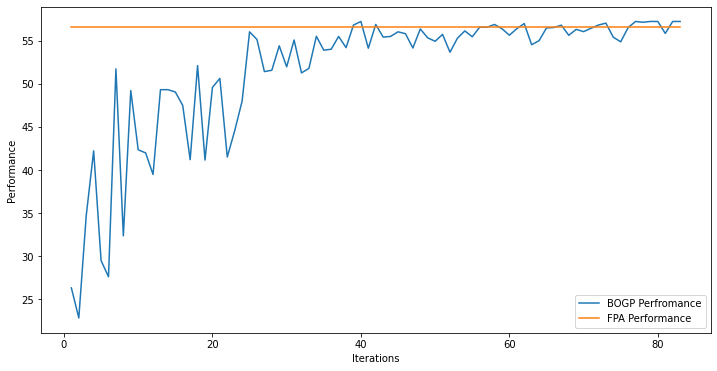

x_next is [ 29.99989816  29.99991378  29.99981148  29.99972012  29.99962254
  29.99999803  29.99964399  29.99959704  29.9997747  -30.99897107
 -30.99782918  29.9999482   29.99992745  29.99964373  29.99967933
  29.99983897  29.9999105   29.99947527  29.99997395  29.99952044]
f()=57.225516, actual=57.221
82


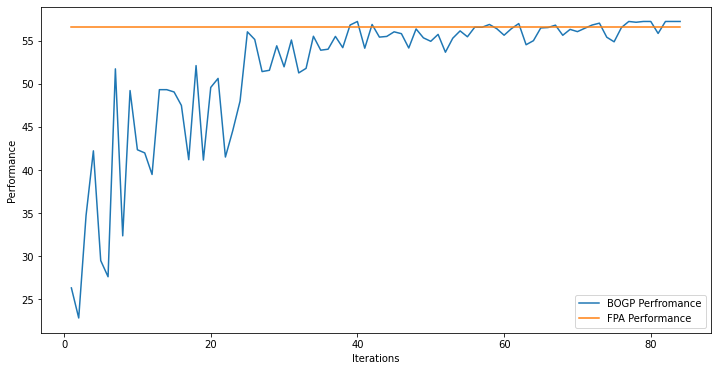

x_next is [ 29.99979159  29.99991185  29.99883018  29.99966409  29.99987849
  29.9996675   29.99913586  29.99997579  29.99999662 -30.99997397
   1.50696533  29.99995024  29.99989319  29.99998499  29.99988692
  29.99999574  29.99961063  29.99973186  29.99941873  29.99982252]
f()=57.203698, actual=57.221
83


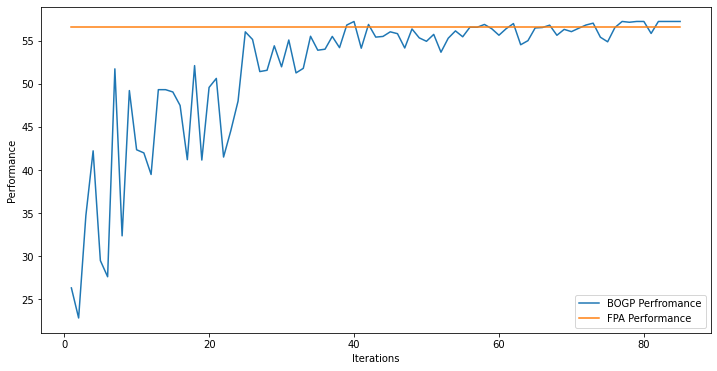

x_next is [ 29.99937489  29.99984714  29.99934435  29.99972981  29.99991055
  29.99944021  29.99980698  29.99979992  29.99922989 -30.99990015
 -30.99962845  29.99758941  29.99994395  29.99943181  29.99907793
  29.99992499  29.99945384 -30.99908053  29.99997818  29.9994112 ]
f()=56.831670, actual=53.785
84


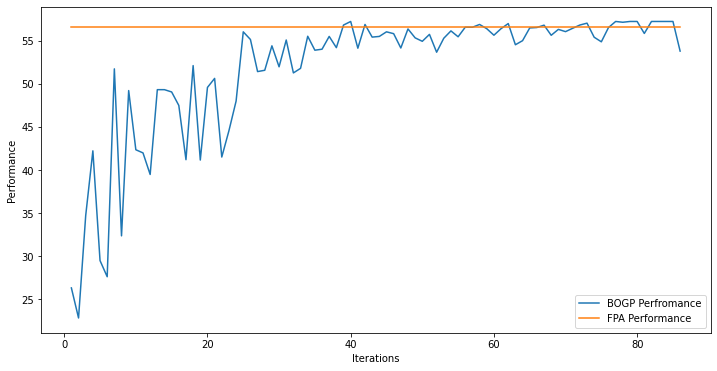

x_next is [ 29.99964794  29.9996557   29.99847862  29.99961945  29.99935512
  29.99998336  29.99996086  29.99985077  29.9996552  -30.99990602
 -30.99994082  29.99972276  29.99991021  29.99948216  29.99939265
  29.9999538   29.99939428  29.99946555  29.99975159  29.99996036]
f()=57.224030, actual=57.221
85


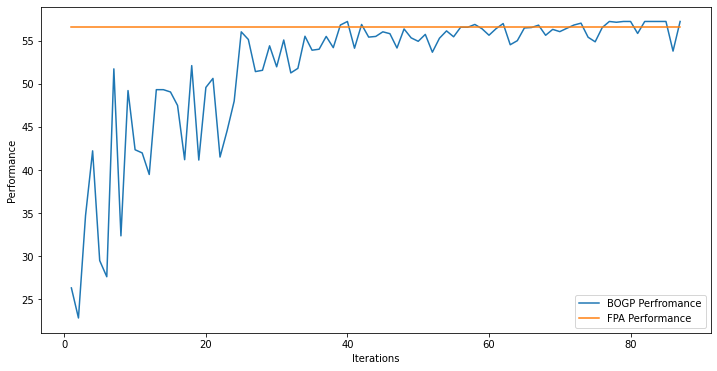

x_next is [ 29.61761796  28.70992464  29.88089355 -12.59708953  29.38601476
  29.5624277   29.72557663  29.52636624  29.98146617 -30.35206862
 -29.86999554  27.88962238  29.97228517 -23.166896    28.07206245
  29.96165246  29.9589915   29.56052825  29.62056727  29.97498493]
f()=56.675461, actual=53.288
86


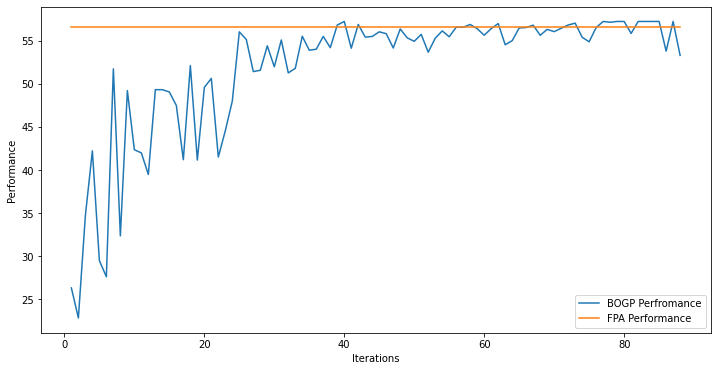

x_next is [ 29.54963583  29.91451095  29.25677797  26.61969866 -30.63442373
  29.85369889  29.39498647  29.83551539  29.47943848 -30.72923454
  29.84792283  27.18596537  29.26960322  28.9538984   29.93781748
  29.99184659  29.96505899  29.90014619  29.69985085  29.85744103]
f()=55.118899, actual=54.458
87


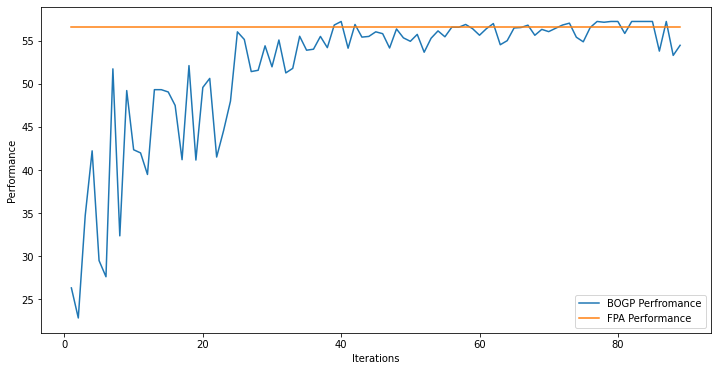

x_next is [ 29.87340817  29.57089068  29.87564433  29.79367009  29.89052037
  29.83380464 -30.15996583  29.939779    29.88794775 -30.58639196
 -30.83723155 -30.13793455  29.8089038   29.37210272  29.79721335
  29.94321339  29.94155678  29.9519479   29.75279456  29.91894906]
f()=55.131744, actual=54.893
88


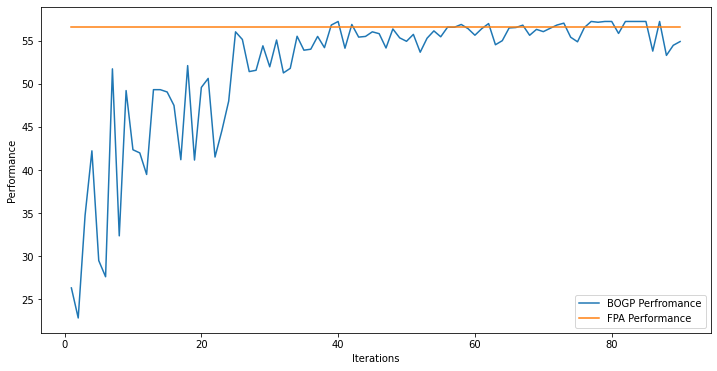

x_next is [ 29.89448011  29.87009572  29.90803793  29.80421598  29.98736302
  29.8539351   29.94912775  29.81070002  29.70548635 -30.78758997
 -30.87356867  12.93157798 -30.94444048  29.98032665  29.80364651
  29.88830993  29.62117734  29.9955927   29.97655353  29.98528266]
f()=54.338155, actual=53.411
89


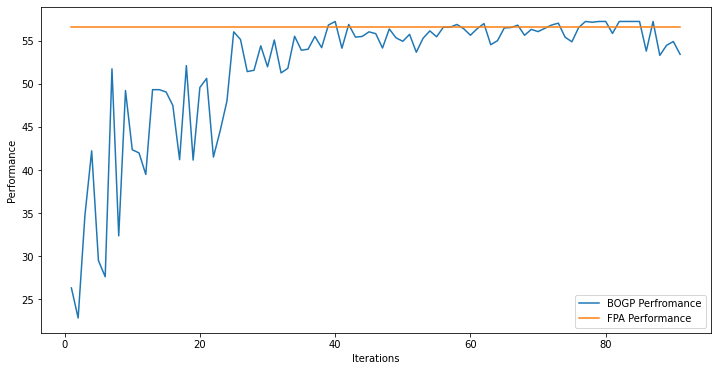

x_next is [-13.80914099 -13.4009653  -23.51539174  15.93504605  -2.4925856
 -27.07417496  24.72349844 -19.86340978 -18.0132091  -23.89734722
   3.60874313  -4.54687759  29.06178948  -3.10150764 -16.25652405
 -18.47899394  24.74481955  28.7353253  -27.63624612 -15.16938426]
f()=51.865251, actual=28.188
90


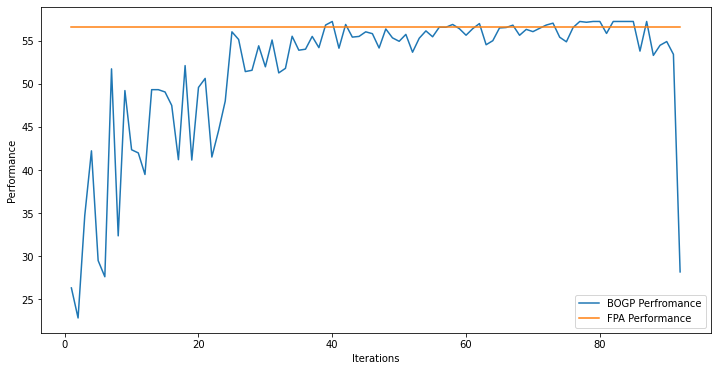

x_next is [ 29.99966896  29.99930076  29.99831151  29.99986138  29.99961615
  29.99982174  29.99996218  29.99951273  29.99940944 -30.99946293
   4.60528642  29.99951003  29.99971592  29.99968827  29.99983588
  29.99990953  29.99974407  29.99977904  29.99972818  29.9999287 ]
f()=57.212961, actual=57.220
91


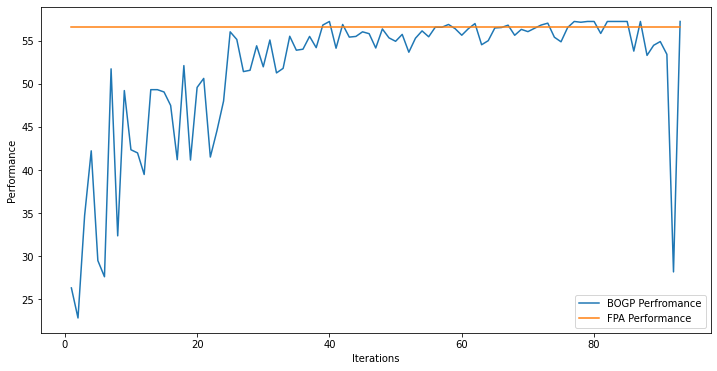

x_next is [ 29.3859095   29.82644229  28.90105105  -0.72996505  28.9168177
  29.07058586  28.60445472  29.8072027   29.94104082 -30.95568655
 -29.7589276    2.80557838  29.9303119   29.81754204  27.76469452
  29.86985605  27.58494472  29.72737068  29.0674175   29.16056777]
f()=57.358186, actual=54.345
92


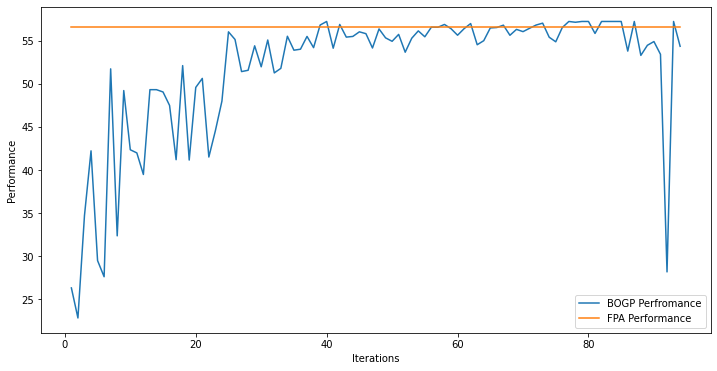

x_next is [ 28.05619847  29.17701979   4.04391073 -25.4005041   28.23403488
  13.97687961  -6.96198957   0.28601667 -18.48404674 -24.33186047
  13.99423326 -23.99607943 -14.02479877  24.12746109  11.59237099
  14.40638833  13.54043167 -22.09227328 -10.05547429  21.89702606]
f()=51.695744, actual=36.409
93


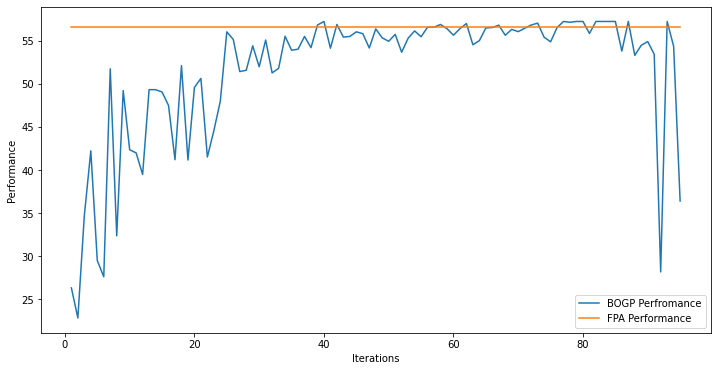

x_next is [ 29.99958191  29.9999229   29.99825148  29.99928763  29.9995631
  29.99983855  29.99973476  29.9998119   29.99954437 -30.999389
  -1.93774557  29.99949785  29.99912338  29.9989119   29.99984301
  29.99998716  29.99952975  29.99900969  29.99994338  29.99935244]
f()=57.216727, actual=57.220
94


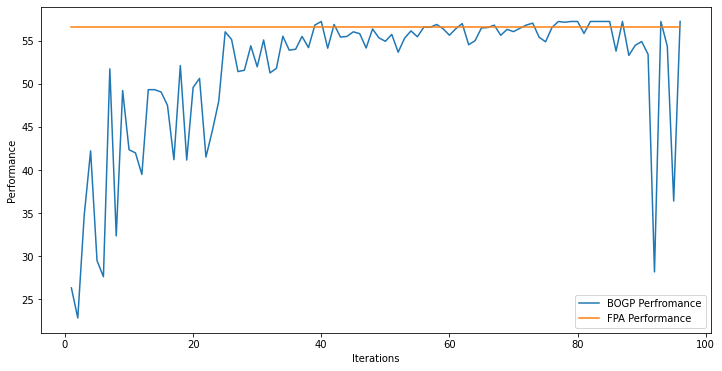

x_next is [ 29.95718308  29.99297304  29.97892814  29.94842216  29.96689012
  29.94695119  29.93382362  29.68249958  29.91603427 -30.9196086
  29.87155465 -30.78447077  29.91922391 -30.75316724 -29.88265295
  29.90029894  29.96447473  29.64876403  29.97722807  29.69503711]
f()=55.254394, actual=53.311
95


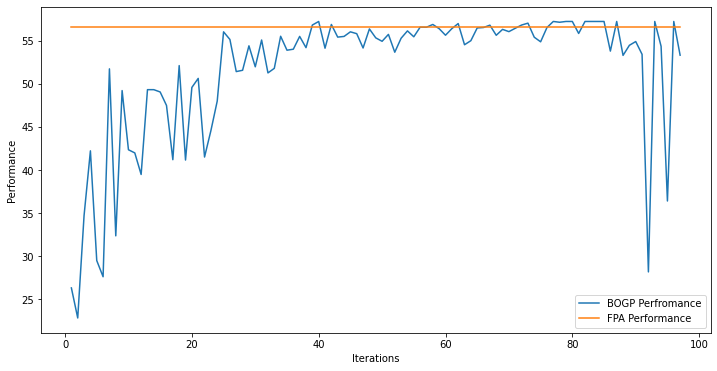

x_next is [ 29.96103287  29.73383872 -30.15193115 -30.30274129  29.52690855
  29.90283349  29.62799126  29.89342786 -27.74414164 -30.35713131
  28.24061484  29.74806651  29.36721859  29.13735987  29.81947373
  29.95456915  29.3381131   29.7751049   29.99690212  29.87846892]
f()=55.951138, actual=54.977
96


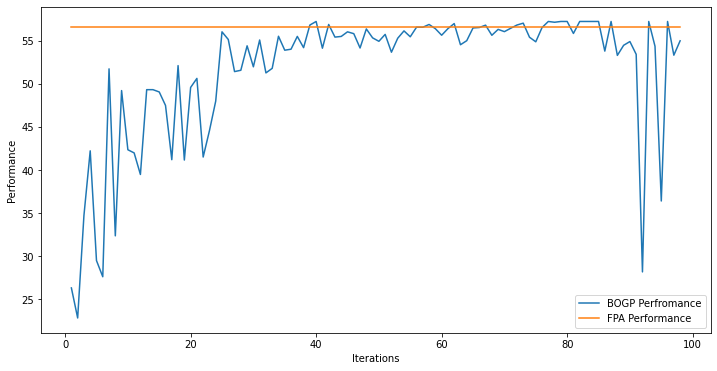

x_next is [ 29.99985059  29.99955777  29.99896937  29.99946803  29.99958615
  29.99969062  29.99992484  29.99955654  29.99993002 -30.99960524
   6.01516782  29.99945875  29.99974741  29.9997211   29.99954707
  29.99964797  29.99934134  29.99996285  29.99983909  29.9999521 ]
f()=57.217502, actual=57.220
97


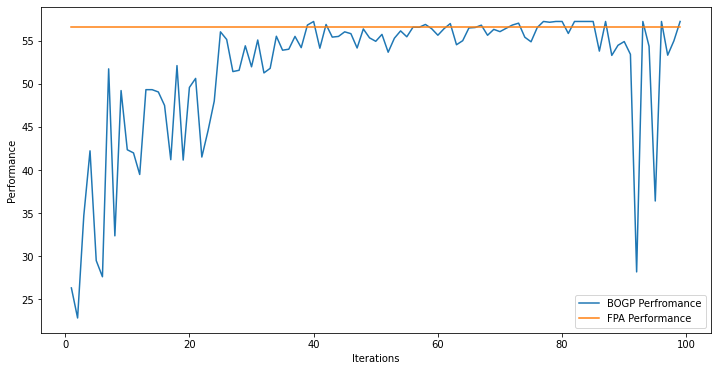

x_next is [-13.33880671 -25.70024685  25.66887832  16.28974706   9.46166273
  -1.89282491 -15.78829354  19.68102246  16.94957801  12.97748368
 -10.03986352 -25.6570082  -29.19192429 -22.95049348 -13.57919199
  15.58155398  10.96120115   8.73565027  -8.81159665 -14.01172569]
f()=51.714531, actual=33.869
98


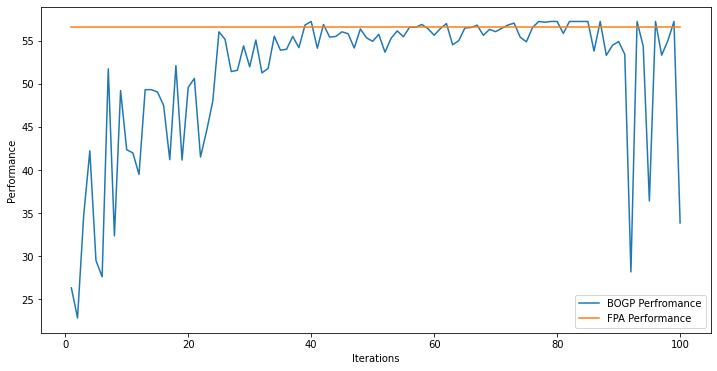

x_next is [ 29.97918577 -30.41999274  29.94839113  29.91356323  29.82186659
  29.82626844 -30.63742289  29.73147862  29.51204752  29.92058338
 -30.64504283  29.77586045  29.39495329  29.85272897 -30.94510139
  29.99474335  29.90602445  29.85966406  29.92891914  29.69621033]
f()=54.236853, actual=53.623
99


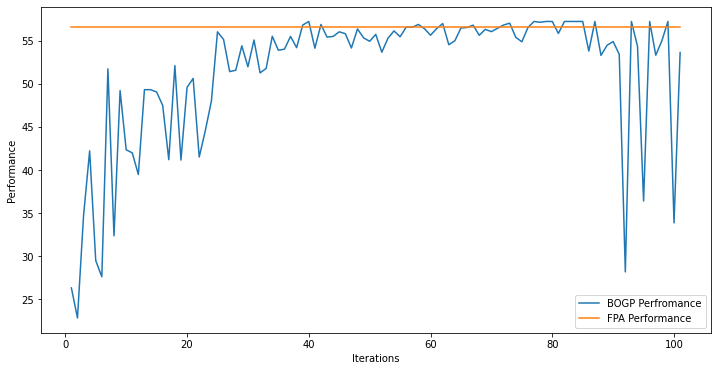

x_next is [ 25.19871236  19.05025409   1.85813251  11.53139185  14.39649657
  19.92647159  14.79238277  10.63750323  17.56397779  21.01069096
 -10.11822661  22.39795552  20.01399492 -11.12382168  25.15227856
  12.2268975    8.22754603  13.96815094  16.06280622 -25.4718958 ]
f()=51.544445, actual=46.862
100


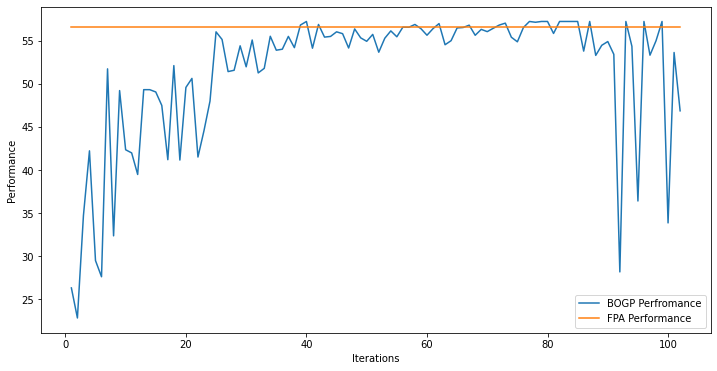

x_next is [ 29.95312627  29.86196319  29.99468767  29.89466392  29.94197065
  29.89886981  29.99890392  29.9889804   29.98099388 -30.79767613
 -30.81356265  29.95697553  29.99019309   7.30944743  29.945149
  29.99510427  29.97846763  29.96088884  29.95818251 -30.90530399]
f()=57.989612, actual=52.369
101


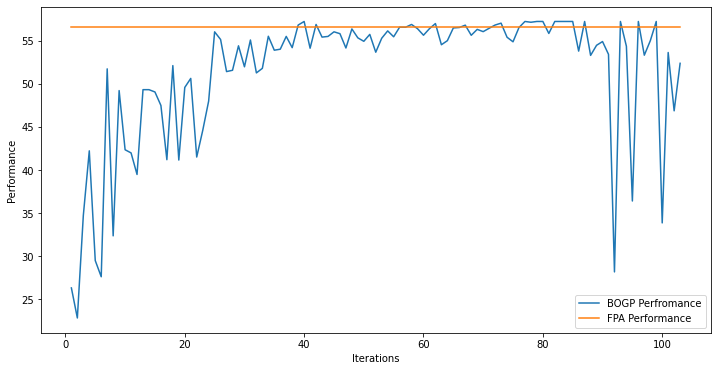

x_next is [ 29.93765909 -30.97206185 -30.98093493  29.97857047  29.9921461
  29.91605117  29.98056916  29.77404201  29.5965399   29.8977099
 -30.88476338  29.95299955  29.97146295 -30.91121543  29.90934765
  29.98913794  29.98520282  29.97829207  29.97730316  29.78480362]
f()=55.261991, actual=54.816
102


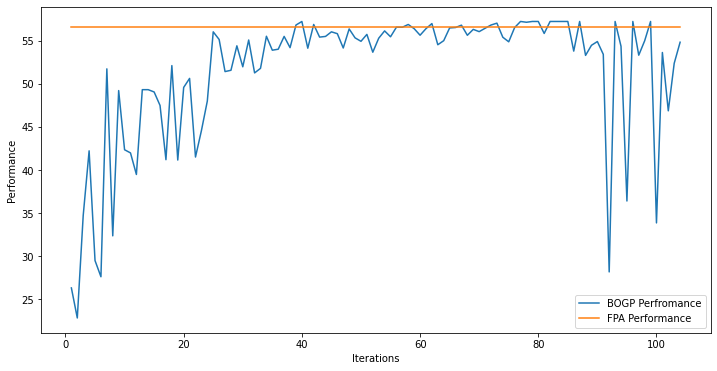

x_next is [ 29.8832697   28.20151297  29.64399858  28.85901002 -30.19651629
 -30.20434797 -30.54414117 -29.62406695  29.27980861  29.72269159
 -30.99964574  29.93663812  29.91700589 -30.47514236  28.84276613
  29.91468197 -30.90557511  29.88866341 -30.01463374  29.29959944]
f()=39.517829, actual=41.670
103


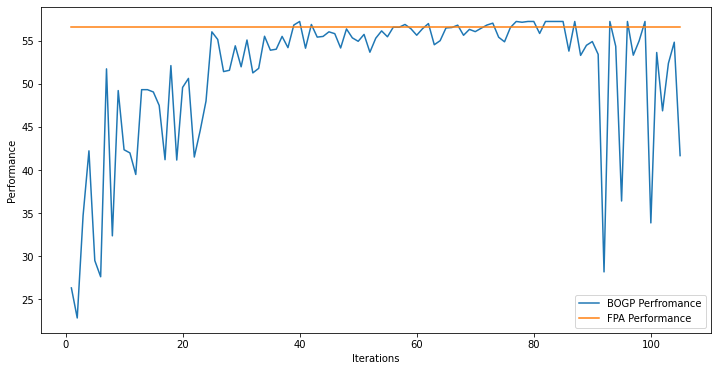

x_next is [ 29.94959525  29.9601204   29.93016249  29.9805463   29.84360203
  29.97814553 -30.8145049   29.98036035 -30.80297614  29.95835336
 -30.75046365  29.93374518  29.9700303  -30.88199643  29.89252915
  29.99600157  29.9518639   29.99419355  29.90157485  29.96369153]
f()=54.397903, actual=54.104
104


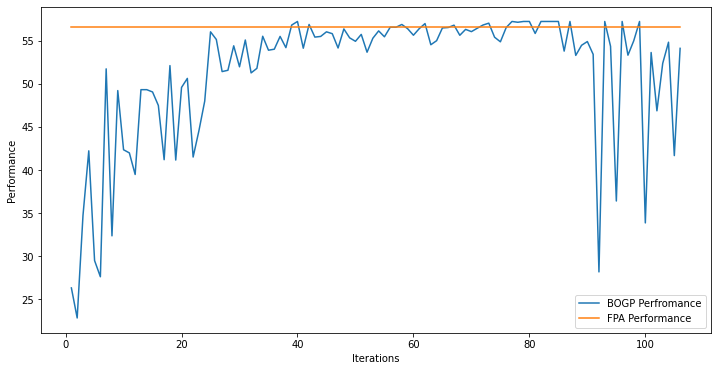

x_next is [ 29.99496433  29.63043832  29.77377222  29.91579133  29.85221866
  29.80001354  29.9533116   29.95740485  29.93161634  29.93636595
 -30.88902996  29.9050532   29.98759905  -0.92376178  29.86382185
  29.99996883 -30.96045744  29.91887207  29.92223981  29.82034892]
f()=54.503309, actual=53.491
105


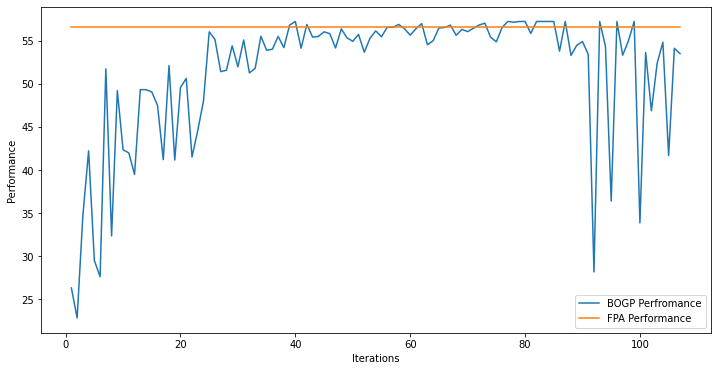

x_next is [ 29.97727171  29.91132097 -30.72552603  29.88551587  29.97446483
  29.94577494  29.82534926  29.75027971  29.60850943  29.94187671
  29.84988306  29.91482287  29.96383298 -30.71775137  29.92652409
  29.99411111  29.93736928  29.98841622  29.97101784 -30.95169341]
f()=54.591919, actual=52.528
106


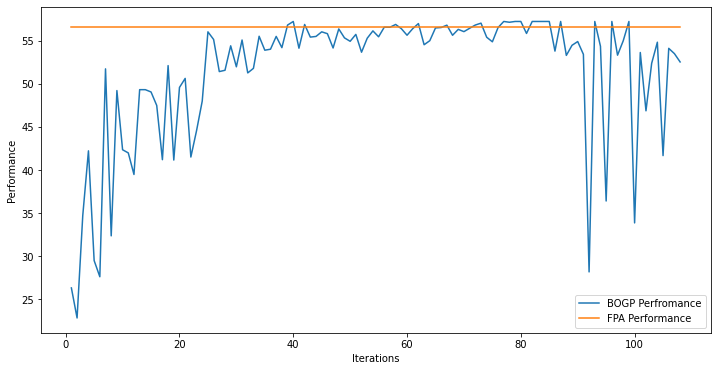

x_next is [ 29.93755129  29.9113878   29.9125346   29.95998914  29.93280582
  29.96074886  29.51167214 -30.70835761  29.89838637  29.96578679
 -30.96181702  29.95994581  29.99145584 -14.97981627  29.96646916
  29.9460188   29.95679532  29.98244316  29.98624079  29.82510671]
f()=55.126713, actual=54.379
107


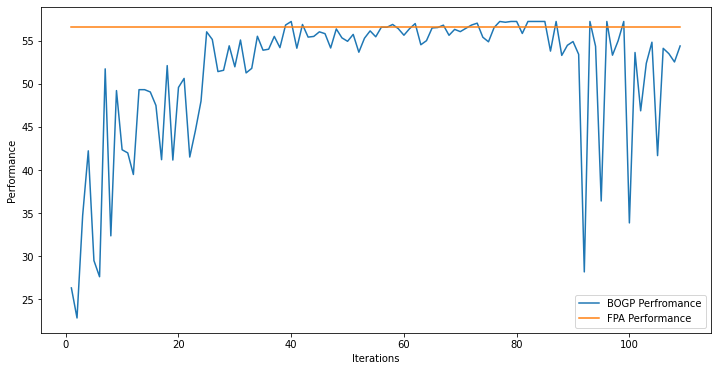

x_next is [ 29.3989841   29.84743819  28.98010154  29.5296857   29.56940974
  29.25811494  29.90226963  29.06781103  28.90807678 -30.8847303
 -30.99082651  29.97021457  29.07530771  29.33384686  28.42217223
  29.94824356  29.62843807  29.30063643  29.87238322  29.68809519]
f()=51.525436, actual=57.040
108


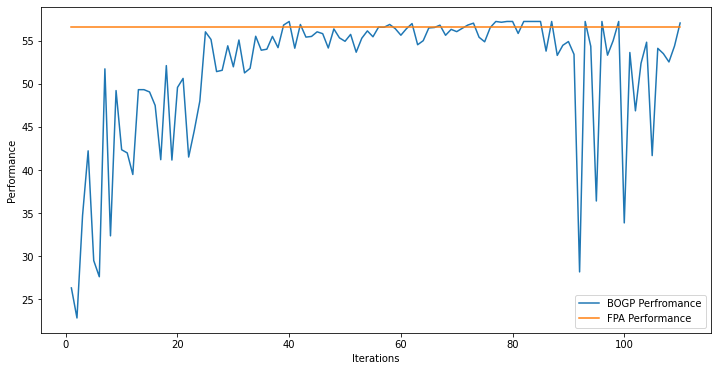

x_next is [ 10.02324894  28.29506229  -5.85611913  16.32562811  27.54817125
  12.10248097  -9.05187402  17.15191267  11.12860542 -17.00688149
 -14.64766067  25.10526015  -3.22292923 -17.12574842  11.84599804
  23.52939673  29.93617129 -19.54292586   8.92807993  -7.59156478]
f()=51.575629, actual=39.615
109


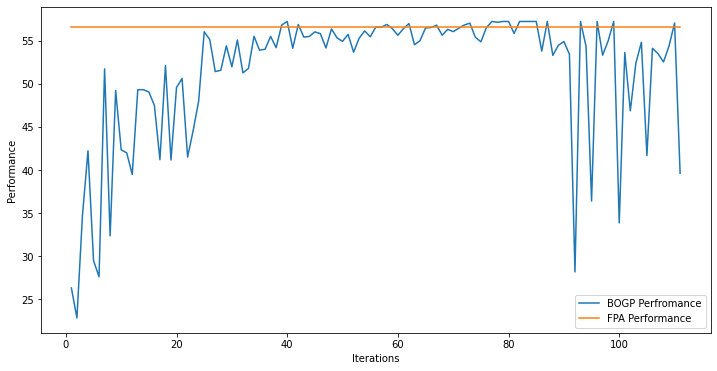

x_next is [ 29.97298046  29.98233078 -30.82497269 -30.85889653  29.8088754
  29.8740557   29.89640784  29.89520266 -30.95631988  29.99459192
 -30.99707771  29.92182003  29.91579513  29.95089624  29.92935435
  29.97729057  29.87698758  29.95048566  29.98424514  29.93858719]
f()=55.480671, actual=54.273
110


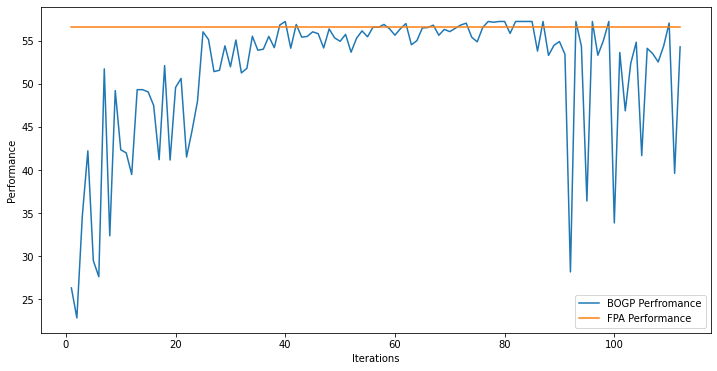

x_next is [ 29.75327324  29.01548903  29.47720089  29.53315244 -18.94723257
  29.47706813  11.91995062  29.99837965  29.66310397  29.43381963
 -30.21654752  29.5825608   29.46617026  13.31232649  29.70459774
  29.97517049  29.81048505  29.90992675  29.19642455  29.86877314]
f()=54.903693, actual=51.555
111


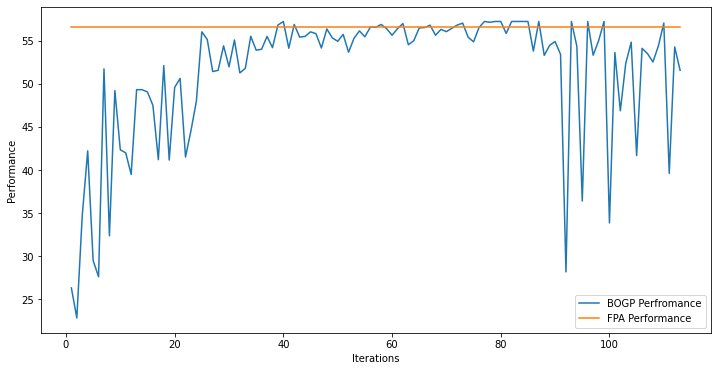

x_next is [ 29.94566588 -30.95792171  29.74645204  29.89784911  29.97999913
  29.95164976  29.93056263  29.77568574 -30.80184517  29.80115164
 -30.95914634  29.85700635  29.97676264 -17.31391255  29.81224776
  29.96396725  29.93502548  29.96019401  29.91363046  29.99939143]
f()=55.066337, actual=54.804
112


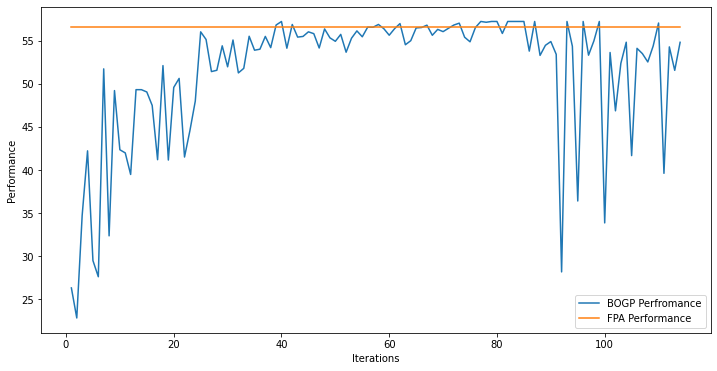

x_next is [ 29.92318405  29.90889682  29.90048508  29.80479116  29.90024633
  29.79429631  29.7466159   29.88889264  29.61371179 -30.92655277
 -30.73452578  29.80193894  29.96609116  29.73139145  29.98033235
  29.99765638  29.99578196  29.94093782 -30.80175557  29.99757879]
f()=53.991136, actual=54.510
113


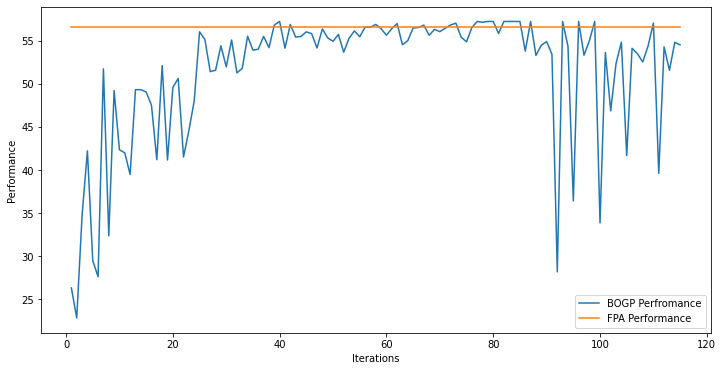

x_next is [ 29.99402798  29.58560175 -30.65045014  29.58982109  29.84604261
  29.5765993   29.5667913   29.98580814  29.85123644 -30.86427015
 -30.9606125   28.16074141  29.99408277  29.5002572  -30.47869196
  29.942383    29.85692839  29.97242706  29.93543702  29.8659237 ]
f()=56.256707, actual=56.052
114


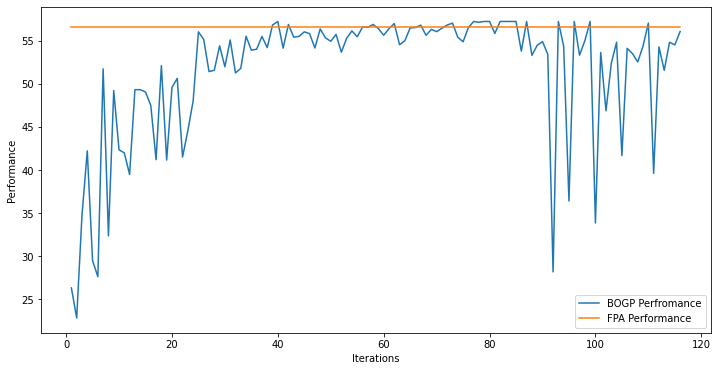

x_next is [ 29.94348684  29.96581167  29.75431298  29.95033823  29.97228436
  29.96080452  29.88320423  29.96355444  29.85036818 -30.54858929
  29.65347923  29.23183075  29.96579525  -3.98399752  29.95277541
  29.82124858  29.84902419  29.89741707  29.95676745  29.79012452]
f()=56.990196, actual=54.913
115


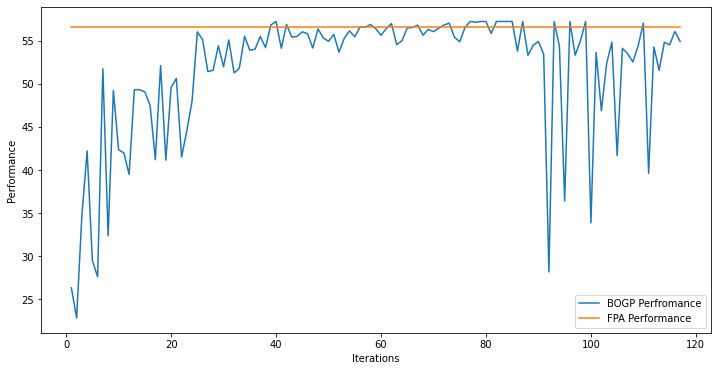

x_next is [ 29.95977222  29.83746554 -30.73797286  29.91005941  29.99970997
  29.78334377  29.89365163  29.90407032  29.90381103 -30.6394125
  29.97045442 -25.47229373  29.92311719  29.91405015  29.81078962
  29.91544494  29.94887538  29.69903182  29.854311    29.99851191]
f()=56.109390, actual=56.214
116


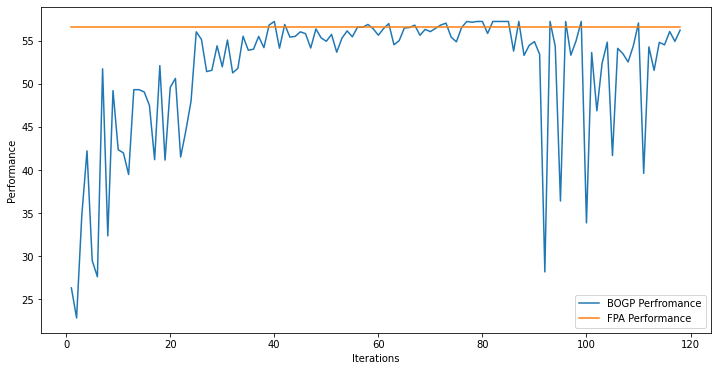

x_next is [ 29.99729914  29.90369564  29.88271489  29.95942985  29.89604165
  29.99496417  29.92082075  29.73818542 -30.8857883   29.96494741
  29.83556693 -30.86323866  29.94982119 -30.61947163  29.88808129
  29.98146651  29.92744681  29.91211534  29.99612968  29.95015538]
f()=55.081410, actual=54.774
117


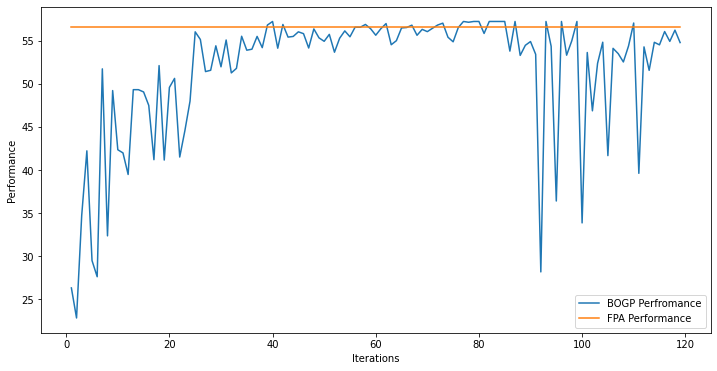

x_next is [ 29.57739696  29.27710826 -30.74154418  29.57142648  29.91791722
  29.89231348  29.63186011  29.99405168 -10.84051879  29.91004871
 -26.94367297  28.92102561  29.95655975 -13.63137599  29.87105897
  29.87246194  29.25701393  29.7943351   29.95121333  29.98210766]
f()=55.779678, actual=55.010
118


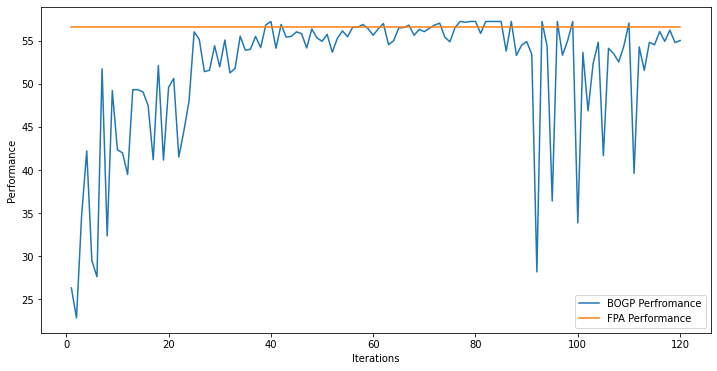

x_next is [ 29.99178173 -30.9209832   29.98500409  29.92137391  29.95132664
  29.93089107  29.86318781  29.96992343  29.71987114  29.94241522
 -30.97478135 -30.70958177  29.97763607 -29.42936292  29.85406824
  29.95237099  29.97261094  29.91642497  29.99656608  29.93082049]
f()=54.695853, actual=54.331
119


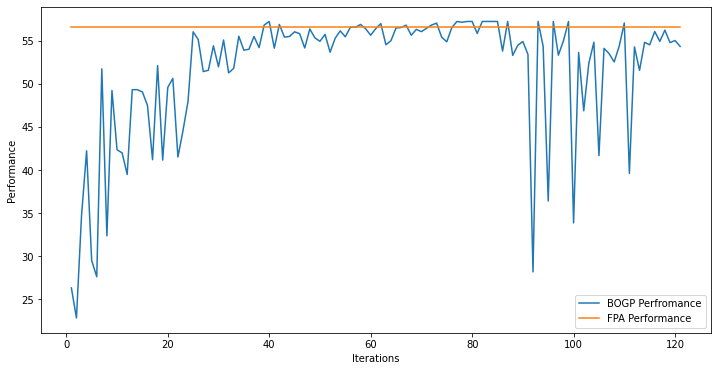

x_next is [ 29.82705574  29.68786022  29.83269322  29.39023016  29.58470524
  29.82281733  29.82980817  29.37842791  29.98583754 -30.8819961
  29.99991796  20.36808499  29.97877125  29.71112321  29.86339083
  29.8557829   29.79189087   1.41110742  29.96874895  29.86600787]
f()=56.613863, actual=53.213
120


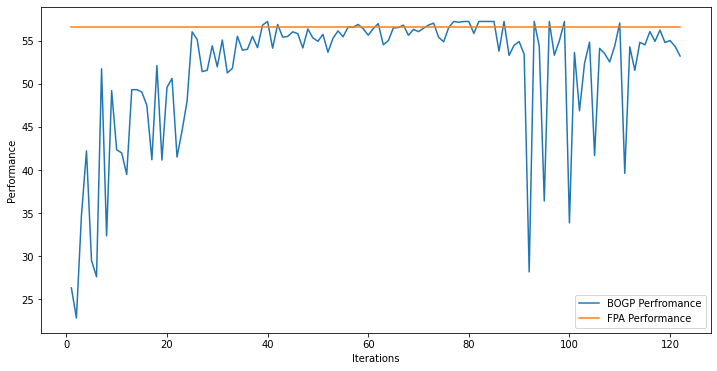

x_next is [ 29.99999843  29.99999878  29.99999834  29.99999734  29.99999892
  29.9997377   29.9997603   29.99999999  10.36743356 -30.99998963
 -30.99996529  29.99999888  29.99999922  29.99999741  29.99999923
  29.9998926   29.99999862  29.99999848  29.99999819  29.99992702]
f()=57.007187, actual=56.807
121


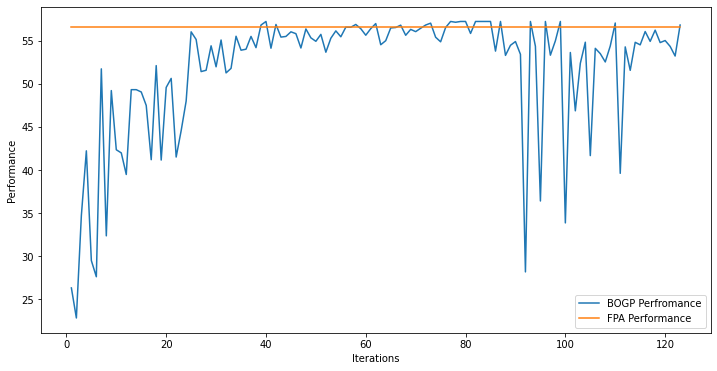

x_next is [ 28.44360621  26.47643528  28.72985067  26.3446741   22.57275365
  29.78033002  29.21640942  26.69391279  25.34169858  27.95556046
 -26.83106892 -29.9030217   29.87813265 -20.58956429  23.59111798
  27.30892175  26.72913627  25.93413087  26.67329638 -29.50779984]
f()=52.225169, actual=51.398
122


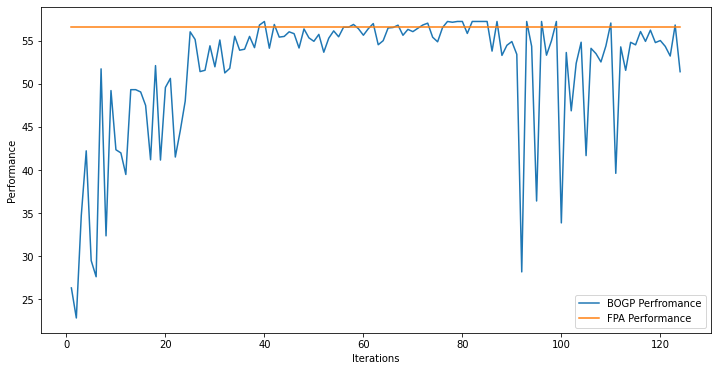

x_next is [ 29.90512696  29.96864328  29.29163867  29.7046912   29.89940947
  -0.49825614  29.92106241  29.97426924  29.5623654  -30.83401555
 -30.96850139  29.79226357  29.87501294  29.89814541  29.67073961
  29.96789115  29.76322602  29.93057988  29.56796011  29.94173163]
f()=56.451097, actual=54.532
123


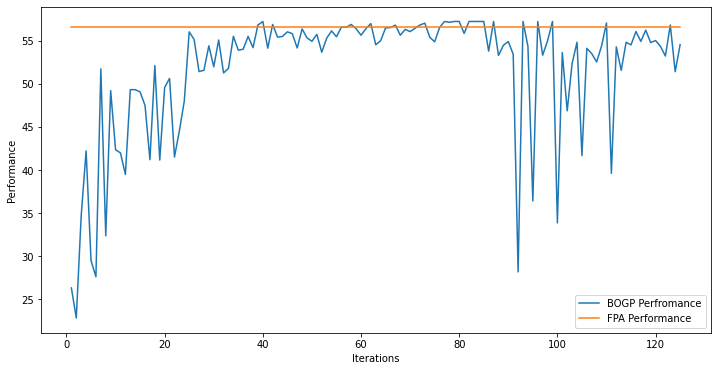

x_next is [ 29.84722957  28.74794428  29.81529032  28.79474279  29.82797525
  29.80019023  -4.2143889   29.83373519  28.94824299 -30.66059896
 -30.46781565  29.75656734  29.66586871  28.94275779  29.31706558
  29.91358808  27.78138638  29.73019892  29.71947389  29.97264268]
f()=57.086042, actual=55.855
124


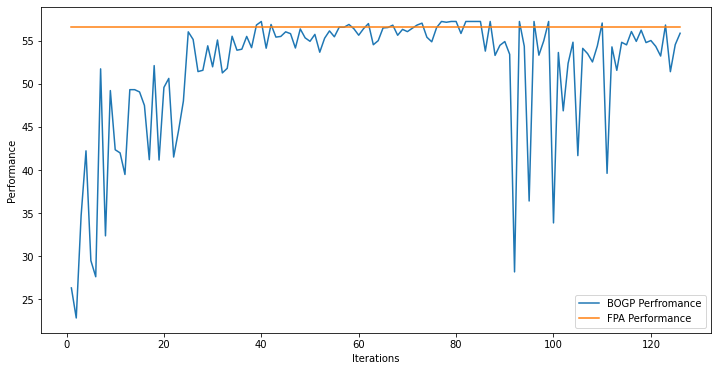

x_next is [ 29.99999934  29.99992578  29.99987194  29.99999843  29.99999942
  29.99999937  29.99999913  29.99999893  29.99999825  29.99999968
  29.99999777  29.99999929  29.99993231  29.99999929 -30.99996749
  29.99999933  29.99999937  29.9999995   29.99992134  29.99999959]
f()=56.137574, actual=55.766
125


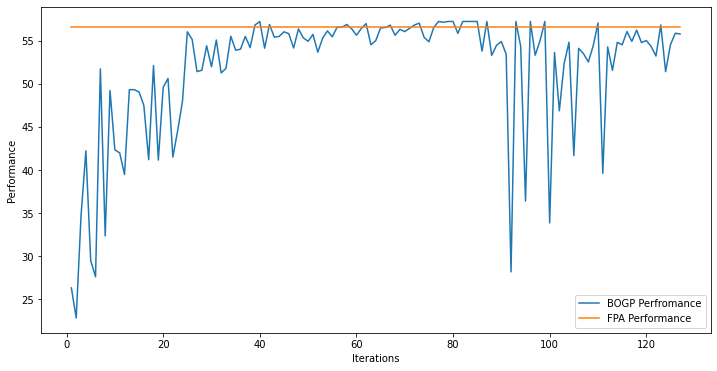

x_next is [ 29.99940974 -24.45519706 -30.98259455  29.98962628  29.99529442
  29.98562586   2.96038748  29.97209132  29.99012281  29.99308358
  -7.83140661 -15.45985183  29.99748811  29.98316947  29.93445907
  29.99808995  29.99209125  29.99298496  29.99890261  29.9979248 ]
f()=55.762259, actual=53.598
126


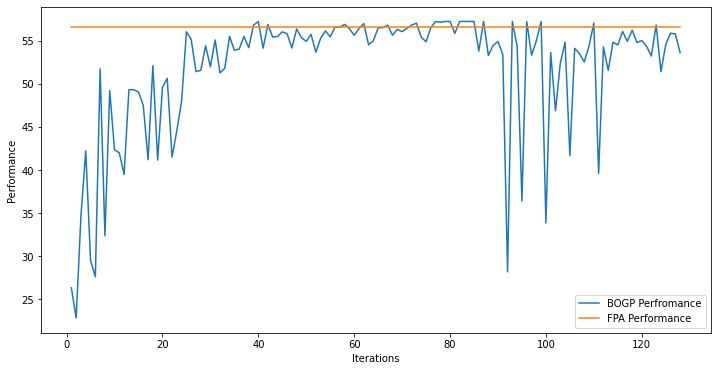

x_next is [ 29.58021697  29.38519815  29.98833091  29.77782591  29.8315391
  29.94661305  29.95216942  29.35915353 -30.79614549  29.54847032
  28.45970222 -30.56168089  29.96654921  29.94744183 -30.7504629
  29.8569711   29.89659904  29.64978767  29.68307114  29.98212253]
f()=55.192209, actual=55.062
127


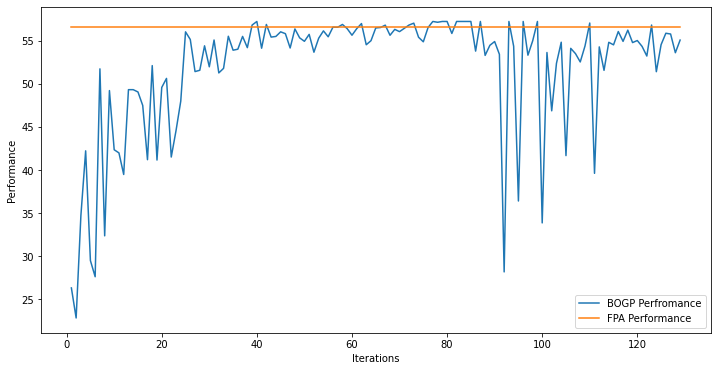

x_next is [ -8.83189845   8.74609706  -4.35603221  16.65799448  13.61737551
  15.10631101 -10.20807523 -12.89410859 -26.80947266 -11.08024346
  -3.48924116 -28.29444284  -8.42012248  -6.99706534  -2.40804475
 -27.9704364   27.26731339   2.91165196 -14.86427031   0.64208425]
f()=51.904914, actual=22.748
128


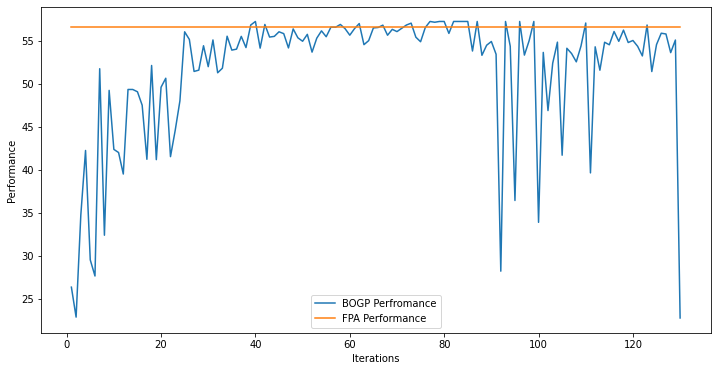

x_next is [ 29.89509112  29.84601232   1.39193651  29.70256466  29.96492141
  29.96274264  29.89074115  29.31083986  29.87294129  29.96206212
 -30.98353509  29.40740586  29.98093505  29.52656867  29.56450269
  29.97018368  29.94344998  29.81909487  29.9433641  -11.33170831]
f()=55.478088, actual=53.316
129


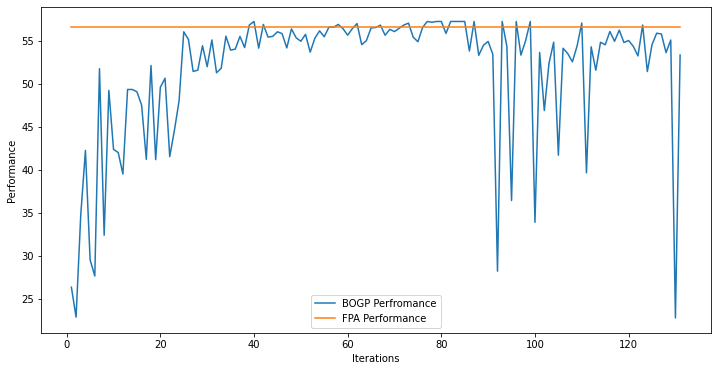

x_next is [ 29.99999853  29.99999578  29.99978546  29.9999973   29.99992974
  29.99999748  29.99999772  29.99995314  29.99999808 -30.99993977
 -30.99996089  29.99986607  29.9999968   29.99999841  13.51857142
  29.99999748  29.99977956  29.99999748  29.9999807   29.99999124]
f()=57.044940, actual=56.523
130


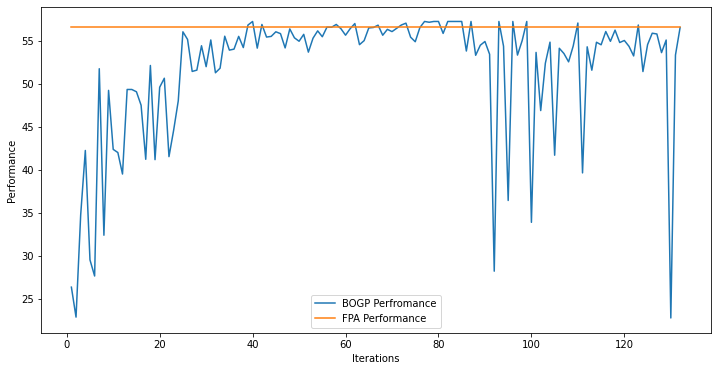

x_next is [ 29.66714192  29.34398527  29.52993572   7.47537232  25.62752788
  29.6778883   28.82991699  28.85924543  29.78597678 -30.35502598
  20.23662314  29.42325231  29.2282772   28.76859739  28.81921279
  29.97307683  28.71073225  29.95603492  29.85655499  29.81845955]
f()=56.615001, actual=55.531
131


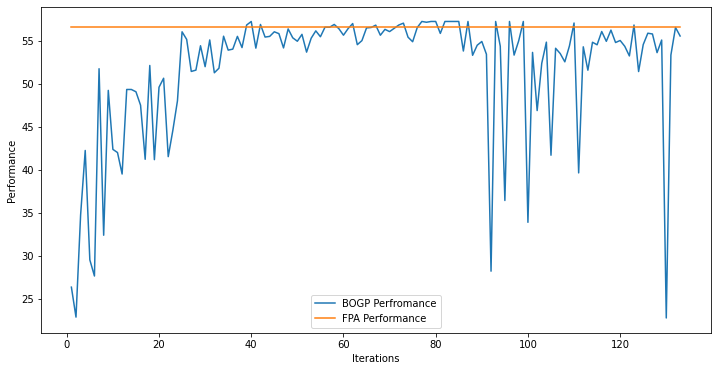

x_next is [ 29.92554235  29.67640274 -29.92197807  29.84078433  29.69551911
  29.80962234  29.76924442  29.76903728  29.58013202 -30.91951685
 -30.52203558  -5.99709977  29.60767259  29.69359277  29.89579274
  29.96614172  29.85602566  29.99020284  29.82905133  29.8942814 ]
f()=56.443466, actual=55.855
132


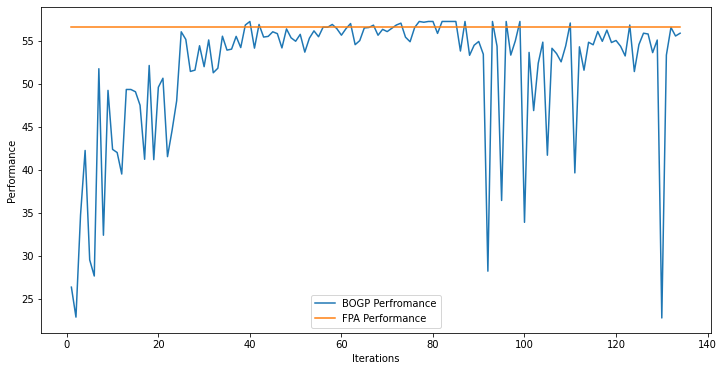

x_next is [ 29.80251647  29.38224542  26.15798977  29.95480359  29.91571192
  29.3530197   29.85165477  29.84478762  28.07159333 -30.69602636
 -30.71142684  22.32249758  29.95214531  25.51674361  29.84896502
  29.75516154  29.71566331  29.5478487   29.62185327  29.85446841]
f()=57.163203, actual=55.642
133


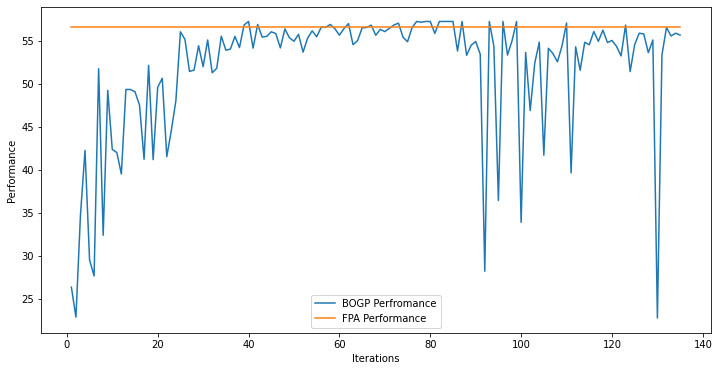

x_next is [ 29.96287776  29.94924601  29.89388357 -10.04076993  29.97230641
  29.93423232  29.86462838  29.95943469  29.89698329  29.97370522
 -30.91946682  29.95595927  29.95955619  29.98498768 -30.89511532
  29.9742347   29.91461547  29.80744266  29.48356502  29.84129547]
f()=55.604343, actual=54.357
134


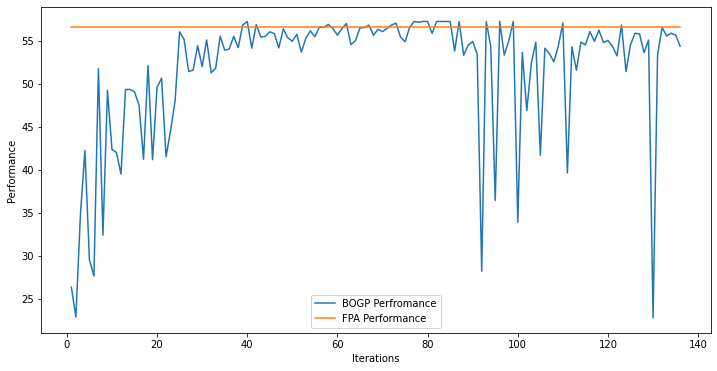

x_next is [ 29.19187113  29.90462055 -29.5765178   26.32751318  29.6066598
  29.97912377  29.74641227  29.81846042  29.33899784 -30.9077434
 -30.31815626  29.66839467  29.20224487  29.7504047   29.69295372
  29.82042492 -23.84844798  29.94132704  28.89440549  29.57578099]
f()=55.976844, actual=56.148
135


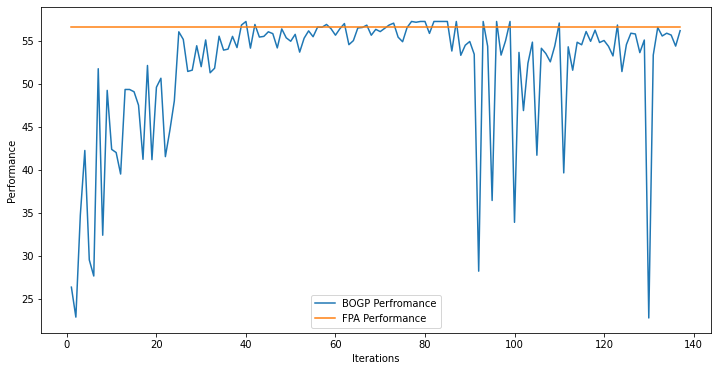

x_next is [ 29.99999988  29.99999888  29.9999976   29.99999998  29.99999906
  29.99999899  29.99999785  29.99999952  29.9999429  -30.99963962
  13.35649176  29.99999947  29.99999879  29.99989054  29.99999972
  29.99999872  29.99999911  29.99999952  29.99999956  29.99955955]
f()=57.212743, actual=57.218
136


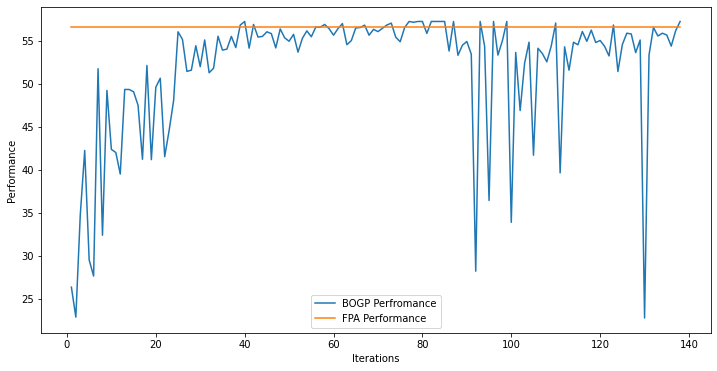

x_next is [ 29.96045875 -30.74395625  29.65436409  28.72734028  29.92480613
  29.84566562  29.63929763  29.89182962 -30.90759292 -30.86829262
 -30.25029348  29.89404566  29.91720977  29.71130938  29.61584049
  29.9937902   29.80276564  29.95131746  29.72455211  29.80587712]
f()=55.873812, actual=55.633
137


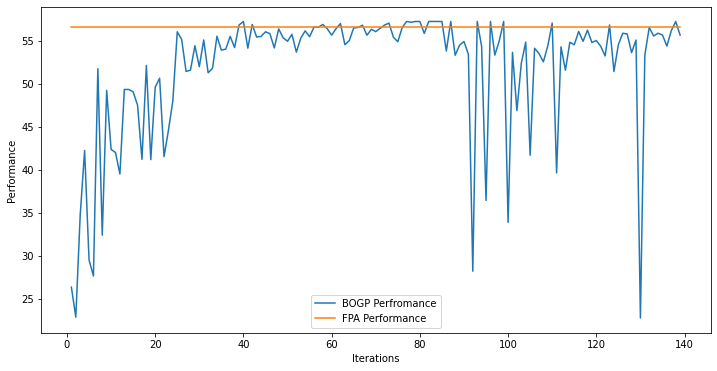

x_next is [ 29.97958524  29.55342669  29.66404489  29.71174423  29.8926139
  29.98598031  29.98609571 -30.70709174 -30.90475204  29.75013828
  29.87754303  29.87109916  29.92963475  29.94997067  29.90109237
  29.98014363  29.98352815  29.98012967  29.92023314  29.94744138]
f()=55.598489, actual=55.086
138


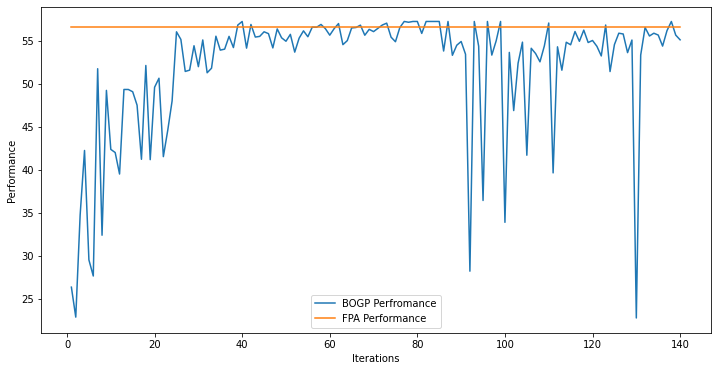

x_next is [ 29.91426537  29.36192721  29.93770402  16.69182914  28.45128338
  29.85208378  29.71464342  29.74204224  29.15031673 -30.7280404
 -30.87316903  29.92812573  28.52643377  29.82818107  29.62473106
  29.97098657  18.18087993  29.95716533  29.50165805  29.53468482]
f()=57.626996, actual=56.696
139


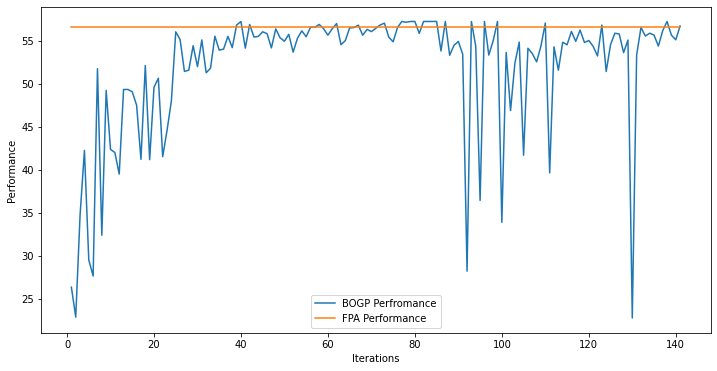

x_next is [ 29.82337497  29.91845458 -30.92936918  29.48050496   7.84071544
  29.93822734  29.97642863  29.90388968  29.07727362 -30.96006564
  -1.45170479  29.706718    29.77599478  29.82454283  29.83780731
  29.94547098  29.78172288  29.89001775  29.96494527  29.54689163]
f()=56.668114, actual=53.803
140


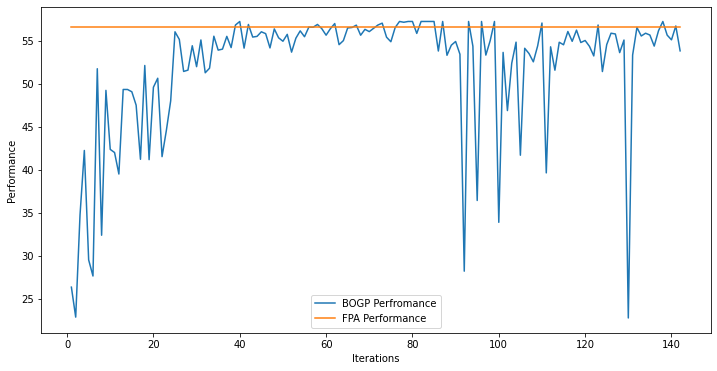

x_next is [ 18.3562283   25.03493287  28.21654573  23.85822659  29.45884229
  29.76235257  26.05434536  28.60113708  20.46863027 -30.67592885
 -29.60868036  27.89560839  29.52320821  29.77126799  24.27355996
  29.94518319  28.92953991  28.48078522  26.54275912  29.08626155]
f()=56.205830, actual=56.026
141


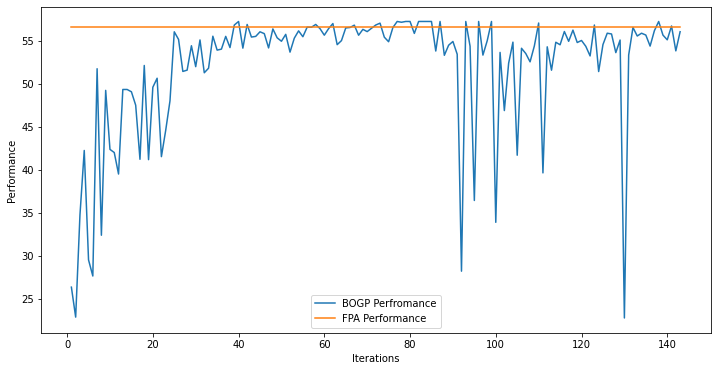

x_next is [ 29.9560848   29.96874172 -30.60446137  29.99690508  29.97244917
  29.99687117  29.94134972  29.956487    29.94044252  29.98649327
  29.94395975  29.96652084  29.96047265  29.88583555  29.95424449
  29.95151669  29.8385092   29.99624667  29.91142036  29.94815105]
f()=56.253207, actual=56.258
142


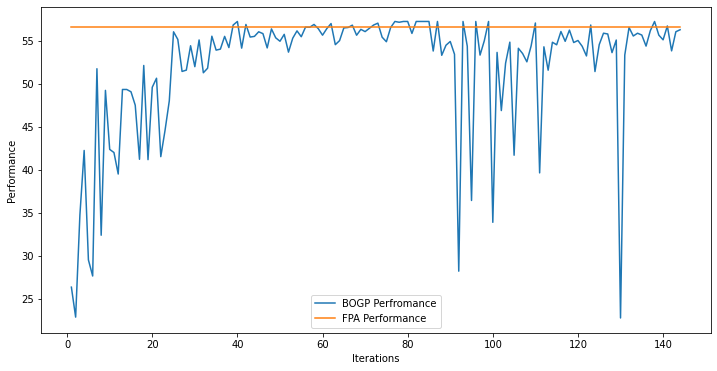

x_next is [ 29.99970455  29.83683581 -30.62357205  29.9618196   29.96176219
  29.97583539  29.9921439   29.6757719   29.98408886 -30.99391225
  29.76855769 -30.96299227  29.9531712   29.92555547 -30.89600116
  29.97007689  29.96498686  29.96014488  29.9321793   29.92529705]
f()=55.922309, actual=55.349
143


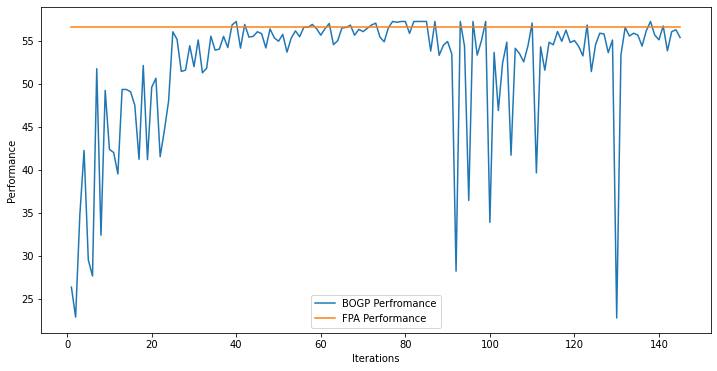

x_next is [-30.99956781  29.99994815  29.99987054  29.9998956   29.99994092
  29.99968664  29.9999306   29.99985037  29.99984828 -30.99977665
 -30.99985318  29.99997611  29.99985317  29.99976864  29.99982809
  29.99992707  29.9996189   29.99997855  29.99973475  29.99996947]
f()=56.904827, actual=53.813
144


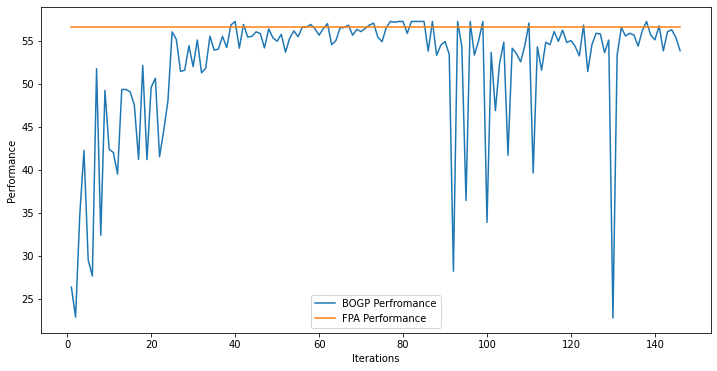

x_next is [ 29.95082377  29.99043819 -30.86858889  11.51689292  29.98712266
  29.78477301  28.65654918  29.96233002  29.86916245 -30.6841897
 -30.94940005  29.63437151  29.81369429  29.70491804  29.54496689
  29.99857566  15.69958027  29.68436126  29.60365333  29.91890234]
f()=56.828447, actual=55.348
145


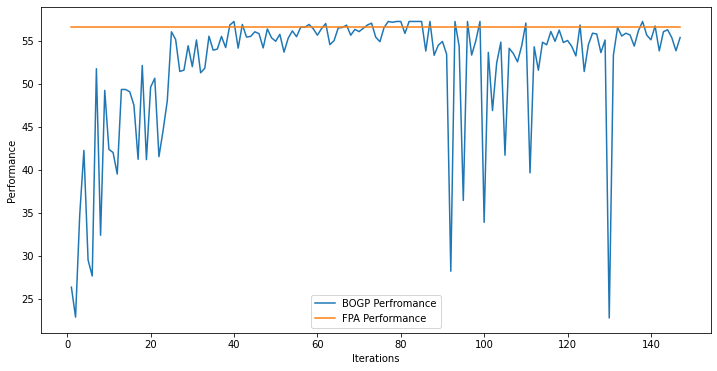

x_next is [ 29.99999789  29.99999758  29.9999996   19.59466503  29.99999969
  29.99999899  29.99958856  29.9999578   29.99999935 -30.99988439
 -30.99994498  29.99999978  29.9999991   29.99999959  29.99999979
  29.99999932  29.99999955  29.99999941  29.99999875  29.99999954]
f()=57.151634, actual=59.079
146


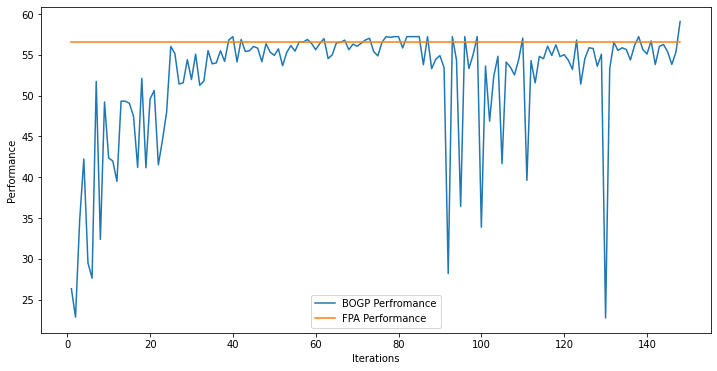

x_next is [ 29.42987239  29.97551975  28.53787143   7.79530985  26.45772689
  29.91596369  29.10721926  29.76509541  29.4359297  -30.21269205
 -30.29659245  29.78078477  28.67515156  29.94063109  29.09118798
  29.68332189  29.66922207  29.07789627  28.82112263  28.75300253]
f()=59.015051, actual=56.640
147


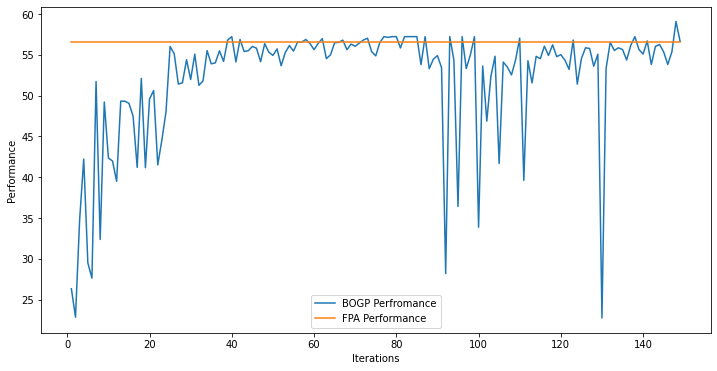

x_next is [ 29.99251441  29.99323821  29.9835869   29.86675448  29.97654839
  29.92215195  29.98564748  29.97953725 -30.96344707 -30.91890745
  29.74441189  29.98438525  29.99278996  29.99254655 -30.99918984
  29.99481621  29.99579984  29.98586543  29.98695898  29.98160734]
f()=55.928085, actual=56.178
148


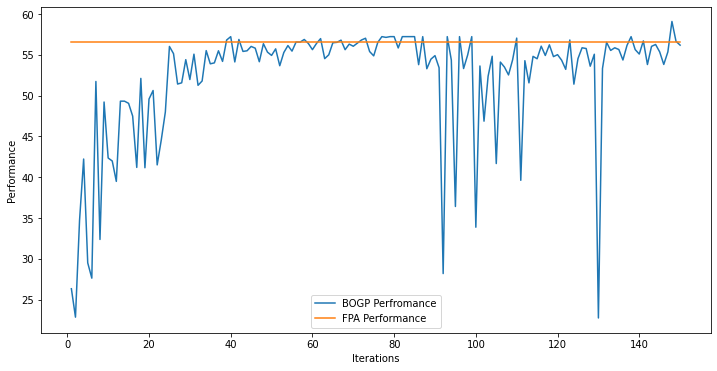

x_next is [ 29.99956371  29.99663467 -30.99058614  29.99771677  29.99390159
  29.99515298  29.99465688   6.65990967  29.99872704  29.99636152
 -30.96434428  29.99410589  29.98772601  29.96398036  29.99481486
  29.99617166 -30.98709579  29.98692783  29.99327499  29.99937355]
f()=55.204687, actual=52.792
149


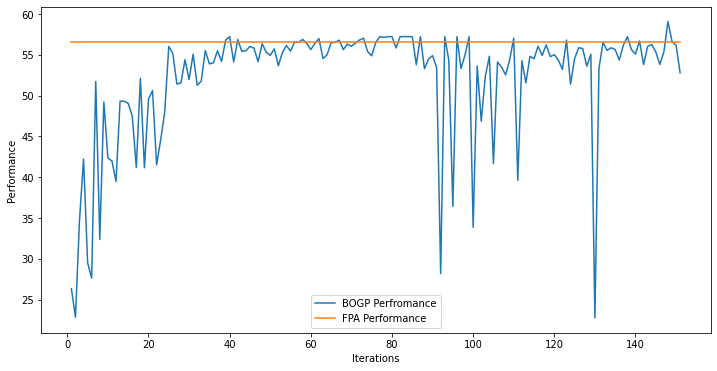

x_next is [ 29.76351194  29.42831446  29.94122079  12.74337666  29.73847776
  29.47086596  29.37753893  29.59527597 -30.26006154  29.40659942
 -29.00097451  29.37740764  29.66414108  28.30276326  29.4610008
  29.80785818  29.50476064  29.05641011  28.76510135  29.1752037 ]
f()=56.024405, actual=56.535
150


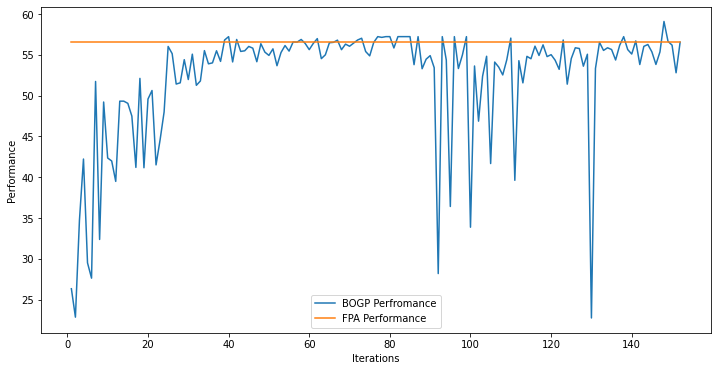

x_next is [ 29.96686269 -30.96144495  29.99915368  16.71480334  29.97390714
  29.83690814  29.70894514  29.48549604  29.95752369  29.77106105
  29.88958931  29.94942156  29.93651909 -17.04373584  29.94269906
  29.99758277  29.96480836  29.92882322  29.89451695  29.83984687]
f()=55.329163, actual=56.107
151


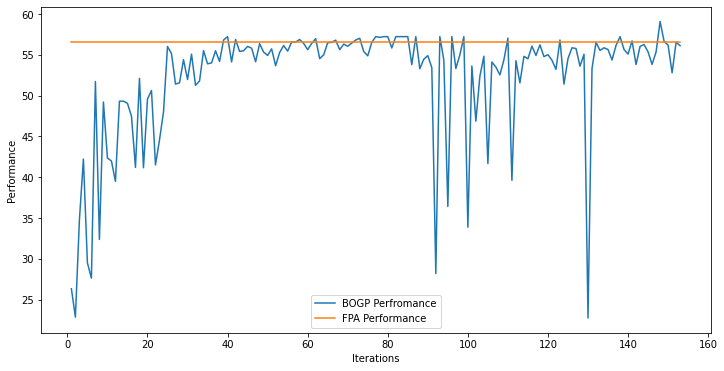

x_next is [ 29.99999998  29.99999995  29.99993751  29.99997018  29.99999999
  29.99999998  29.99999991  29.99999994  29.99968498 -30.99976406
 -30.99995828  29.99999997  29.99999996  29.99999996  29.99999997
  29.99999992  29.99999992  29.99999995  29.9999999   29.99999996]
f()=57.287880, actual=57.221
152


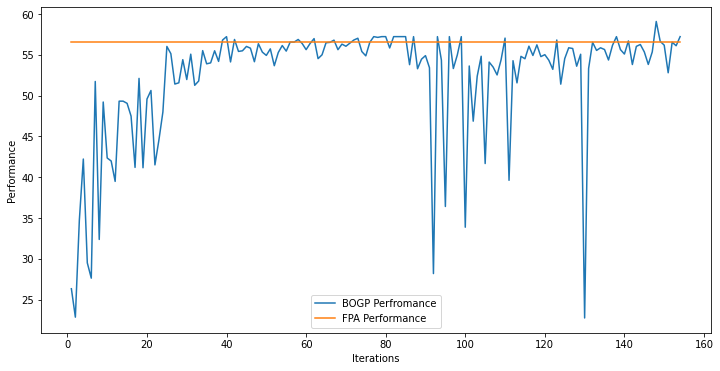

x_next is [ 28.7366097   16.74667552  29.20539409  22.80780038   3.82719108
   7.52504808  21.21610575   3.13745346  -8.61033243  14.17714231
   8.06691996  20.82687716  29.46980846  -3.30947536   1.72157208
  27.54492534  10.0255871    8.86647908  25.56699915 -29.60819566]
f()=47.288440, actual=40.811
153


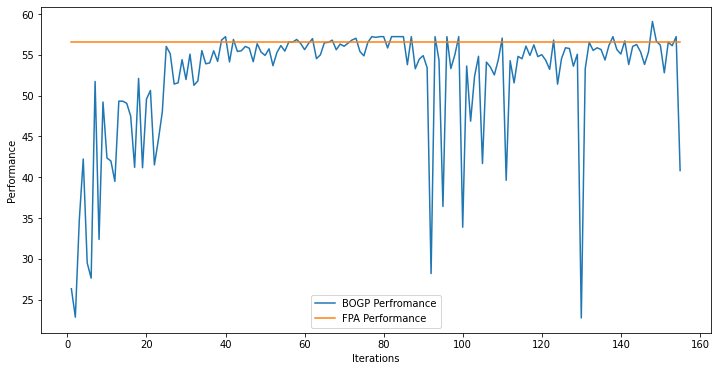

x_next is [ 29.99079959  29.89617626 -26.86227146  21.01121008  29.98059527
  29.93046913  29.89275388  29.96154917  29.6582685   29.99201322
  29.62367458 -30.98509685  29.94517835  -8.62946603  29.93870514
  29.97559919  29.8918323   29.97176902  29.92232412  29.96629707]
f()=55.818553, actual=56.141
154


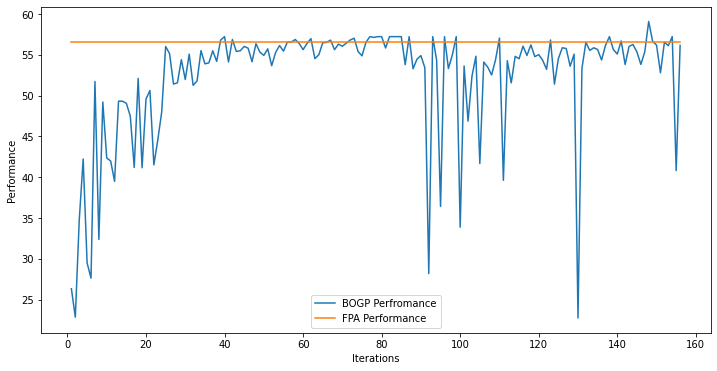

x_next is [ 29.95493624  29.6252015  -15.25303253   1.46195664  29.94058745
  29.68896088  28.68422327  29.89175344  29.85256472  29.7212105
   0.18148135  29.37074094  29.96771518 -25.80928311  29.91834306
  29.97650531  29.66774707  29.9646259   29.83028542  29.66123996]
f()=56.080973, actual=54.006
155


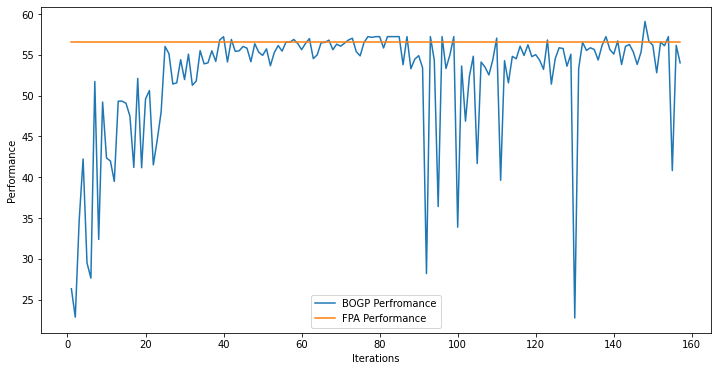

x_next is [ 29.91782035  29.24506077  29.56168459  18.22561278  29.5231534
  29.73561913  29.91992853  29.84780325  29.68079045 -30.68092235
 -29.40068931  29.48764976  29.91175533  29.99822366  29.5657368
  29.60574551  29.71038506  29.42520472  29.84387042  29.85207024]
f()=58.714636, actual=58.849
156


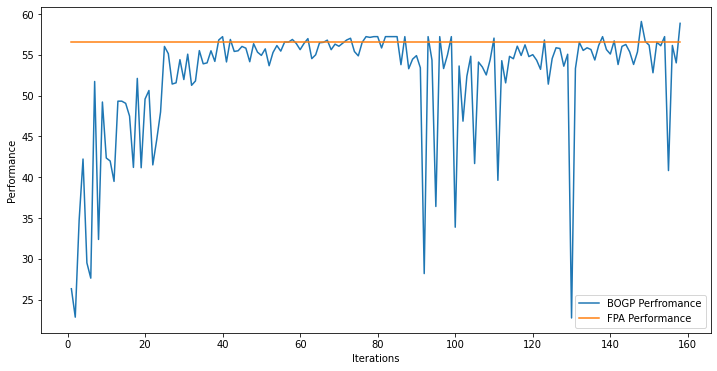

x_next is [ 29.88422937  24.46082411  29.80552828  18.74298018  29.99211755
  29.98806917  29.96218597  29.66323025  29.76606608 -30.94356569
 -30.94865406  29.9786352   29.99286839  29.93868177  29.9624586
  29.87613543  29.96969478  29.11253798  29.7538376   29.75216632]
f()=59.029943, actual=58.170
157


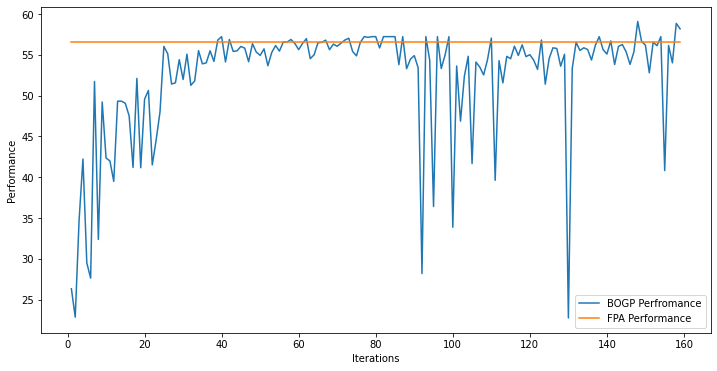

x_next is [ 29.93391075  29.96872652  29.88702934  18.06709638  29.98937825
  29.89512077  29.93263488  29.76439577  29.95512639 -30.94407822
 -28.56850131  29.98462862  29.90010853  29.98491013  29.68533457
  29.95888325  29.92629229  29.20086484  29.81943807  29.9829884 ]
f()=59.086980, actual=58.940
158


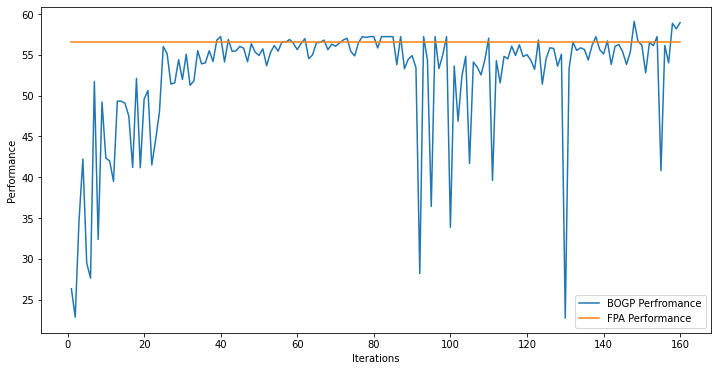

x_next is [ 26.51097016  14.71647297  19.48910797 -19.45707373  -4.77618856
  14.07944233 -30.98992893 -23.24468833  -4.9029341   28.23806058
   3.69956706 -27.7761818   20.39515355  14.34329658  23.40903087
  -8.06457701 -16.35945198  -5.47811324   8.15179201 -13.51708645]
f()=52.391154, actual=26.704
159


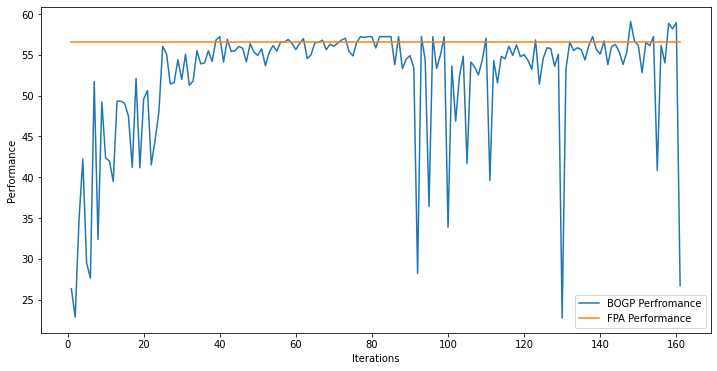

x_next is [ 29.99458055  29.99254502 -28.46260288  29.92103871  29.98811657
  29.86399827  29.92722125  29.92993325  -2.64376985  29.94608844
  29.85128792 -16.74357337  29.94226034  29.60948034  29.89974013
  29.95650339  29.99762381  29.90577558  29.96855478  29.99863477]
f()=56.181156, actual=55.348
160


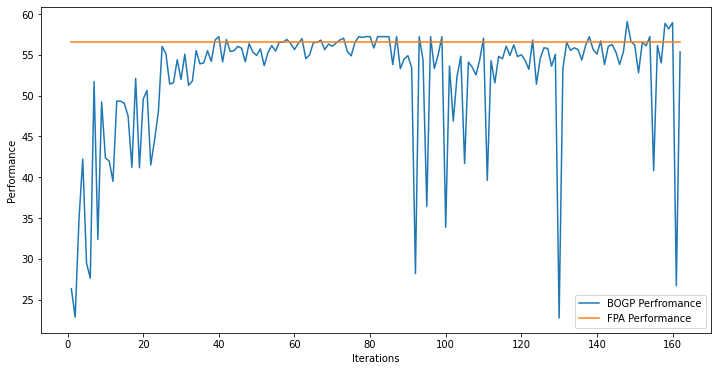

x_next is [ 29.79405421  29.9307167   29.93051717  18.97654049  29.91593434
  29.58873376  28.94672235  29.77534607  29.02089735 -30.05111823
 -29.91860813  29.93538465  29.97491989  29.99999858  29.96286012
  29.69032953  29.95645174  29.95106792  29.88686878  29.8068012 ]
f()=58.970274, actual=59.013
161


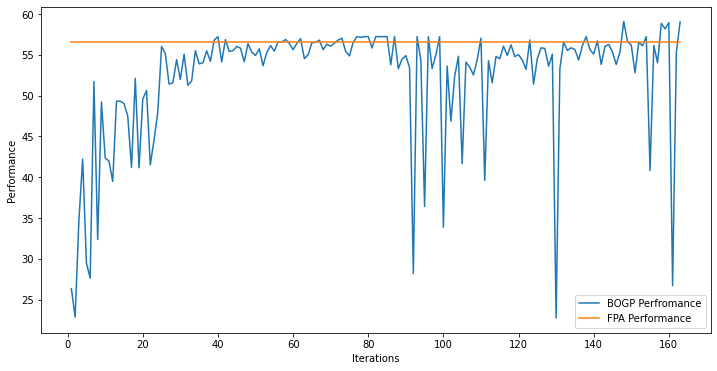

x_next is [ 29.82563392  29.94602388  29.67559082  18.5147912   29.99421043
  29.7605345   29.74293566  29.72096709  29.04094602 -30.67176118
 -29.92092037  29.8925175   29.90779926  29.99743328  29.63103769
  29.04885792  29.99736448  29.99017754  29.96395157  29.95526823]
f()=59.039252, actual=59.191
162


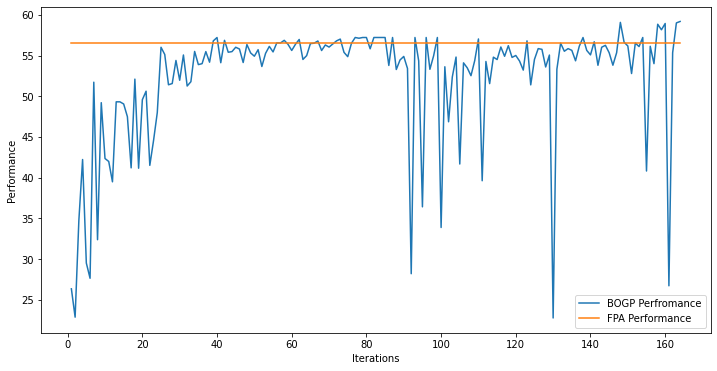

x_next is [ 29.96540971  29.99938433  29.99534589  12.89932146  29.99739013
  29.98809685  29.99373786  29.95373626  29.95546848 -30.99158001
 -30.78154843  29.99806417  29.99794341  29.99837053  29.93265487
 -30.97018291  29.99675122  29.99256511  29.99646918  29.97214587]
f()=62.673039, actual=56.295
163


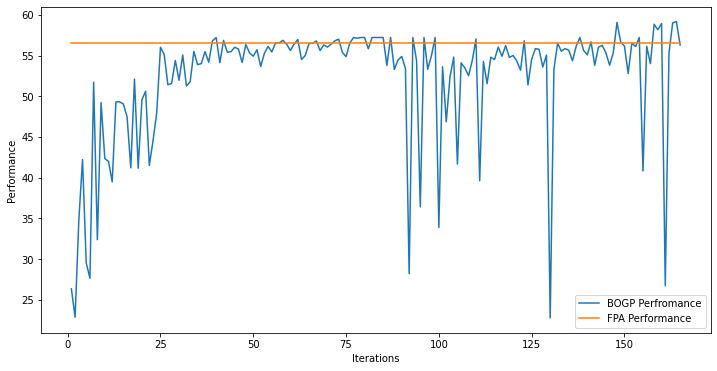

x_next is [ 29.943799    29.97277093  29.37491319  17.43617041  29.9961058
  29.75147313  29.83954183  28.17095889  27.20299209 -30.31723284
 -30.95751592  29.52218737  29.57300312  29.9246848   29.61134115
  24.91529805  29.83382831  29.90774548  28.66422873  29.93240153]
f()=59.303559, actual=60.195
164


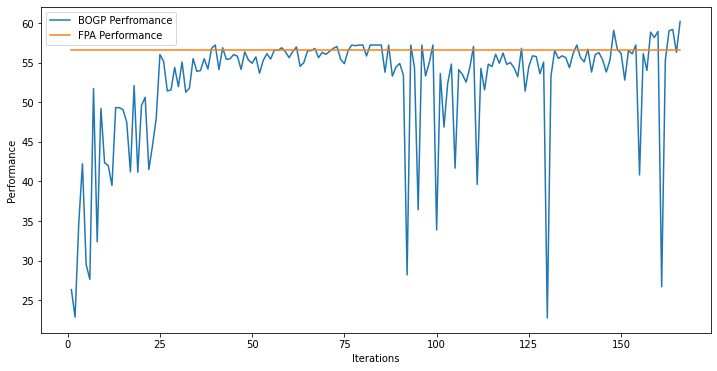

x_next is [  8.02705848 -22.84529964  20.69606787  23.78842775  -2.34066133
   7.06086825  21.14939711 -25.28404948  12.94106618  17.78691775
 -14.67436659   8.00111614  -1.8349276   25.36452824  -8.51420594
  -7.52866412  -1.27420525  21.19849055 -21.19878155  15.3524047 ]
f()=45.951705, actual=33.196
165


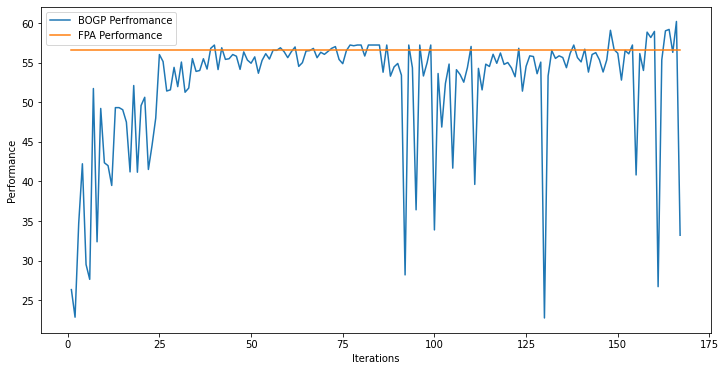

x_next is [ 30.          29.99999996  30.          12.5871572   30.
  30.          29.99999999  29.99999999  29.99999998 -30.99989722
 -30.99987537  29.99999999  30.          30.          29.99999998
  29.99989242  30.          29.99999999  30.          30.        ]
f()=57.941150, actual=57.831
166


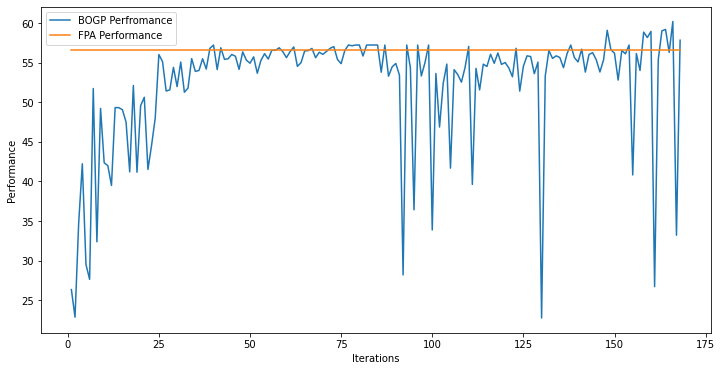

x_next is [ 29.99976164  29.99952466  29.99973629  29.99964726  29.99967509
  29.99987588  29.99987676  29.9999377   29.99979149 -30.99971656
 -30.99942353  29.99978681  29.999706    29.99986847  29.99978356
  29.99983193  29.99967652  29.99975089  29.99992122  29.99969327]
f()=52.322998, actual=57.221
167


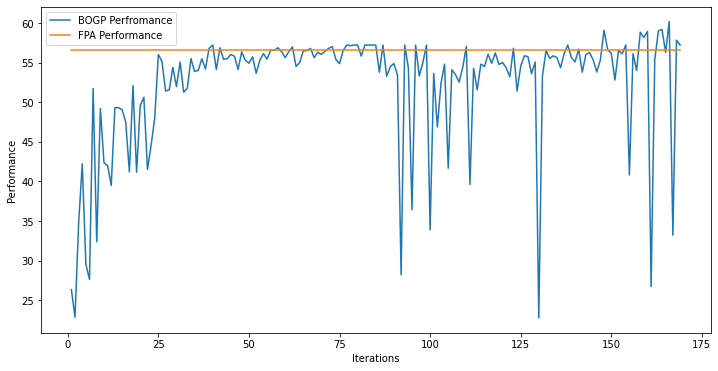

x_next is [ 29.93023692  29.98841417  29.93626707  17.82122225  29.98210869
  29.99640082  29.95580187  25.37001678  25.99458604 -30.9854849
 -30.9465569   29.98963629  29.97637525  29.98565707  29.96789172
  10.21888011  29.99787308  29.91176341  19.59720836  29.99840061]
f()=61.858048, actual=59.719
168


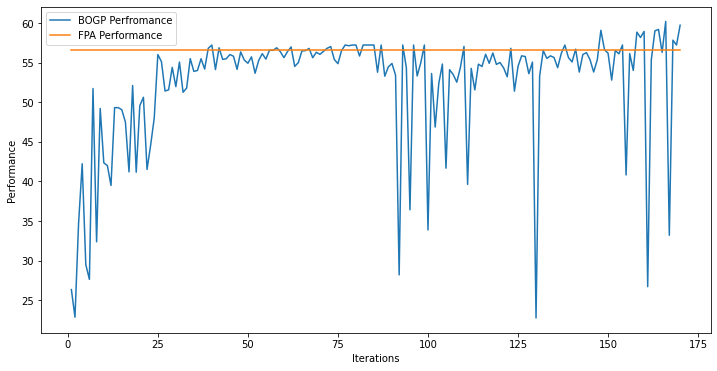

x_next is [ 29.98962532  29.97621725  29.95970047  18.39113988  29.89669606
  29.85513022  29.87960306  26.09966243  26.37127439 -30.83065782
 -30.95056276  29.87521122  29.99835942  29.97164558  29.97109241
  18.44890476  29.99195729  28.51648483  28.40908618  29.98671952]
f()=60.835804, actual=59.968
169


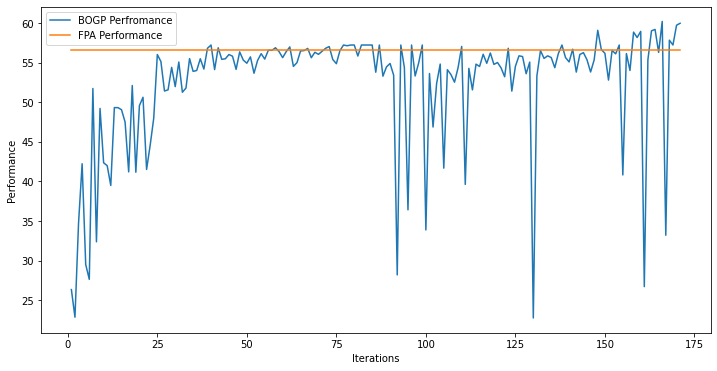

x_next is [ 29.97320087  29.98560845  29.49246222  18.12828113  29.96273661
  29.98233024  29.98014465  29.01931145  26.33381721 -30.67963869
 -30.75329019  29.97176262  29.78044294  29.96532657  29.89352478
  22.50230548  29.95454346  29.91249523  20.89055104  29.9449161 ]
f()=60.809968, actual=61.557
170


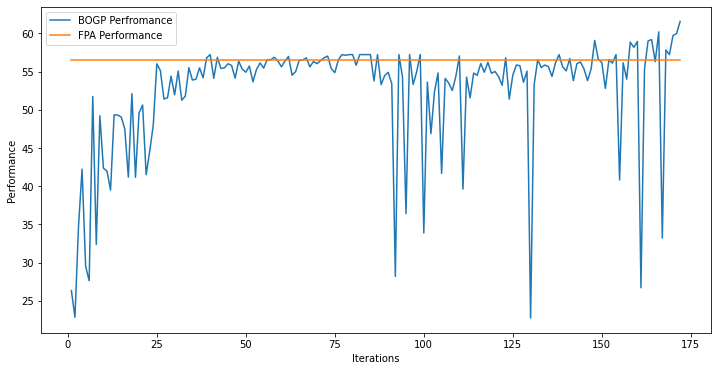

x_next is [ 29.81778435  29.82409308  29.53097847  17.58046986  29.04670309
  29.97407459  29.95682026  28.68606592  26.09924268 -30.88410184
 -30.55194316  29.4453877   29.74487896  29.90450999  29.92295009
  23.98453101  29.7401531   29.88118048  16.05512159  29.95613523]
f()=61.562931, actual=61.001
171


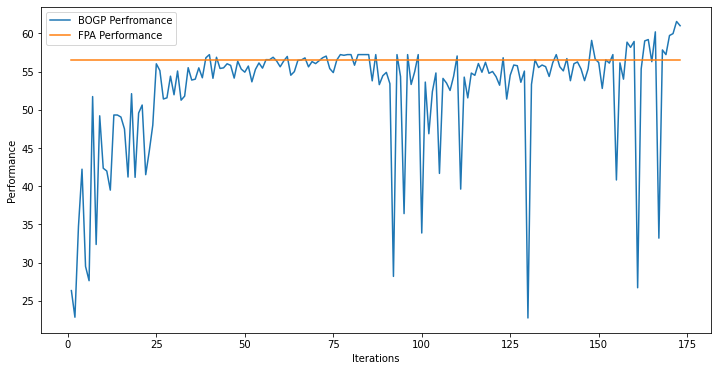

x_next is [ 29.99265009  29.98918167  29.25008877  18.49663093  29.979431
  29.99169859  29.97672664  29.9930507   26.32173624 -30.58952094
 -30.81758601  29.97378331  29.53907189  29.97327367  29.98602615
  21.78439572  29.96610163  29.97683091  20.61844564  29.97032254]
f()=61.665705, actual=61.292
172


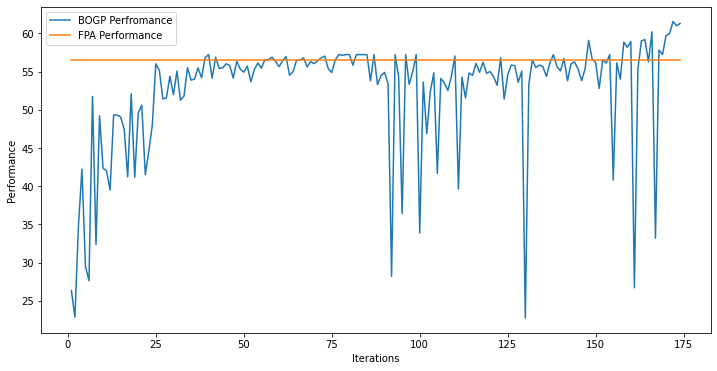

x_next is [  6.08619458  20.06589228 -13.06924778  -6.88318711 -11.13267006
  -7.48559399  29.70543333   0.46877266   3.6903953   24.34854938
 -14.53023243 -18.66736634   6.26902176 -20.65419343 -26.49873077
  26.96180044   7.08958355  10.24971034   1.94776895   9.79163094]
f()=52.592096, actual=30.011
173


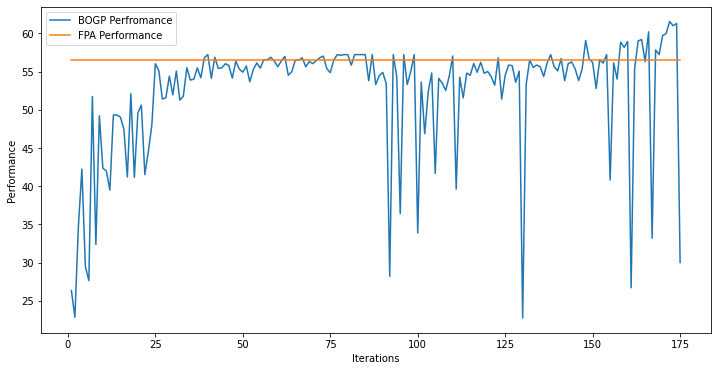

x_next is [ 29.99843318  29.99649424  29.90420697  17.83063666  29.97814766
  29.95694721  29.99393948  24.59380705  26.2507887  -30.97903602
 -30.97555828  29.98644487  29.99706111  29.99572649  29.90243928
  23.90272557  29.99940892  29.97037922  20.28263781  29.99183156]
f()=61.934319, actual=61.727
174


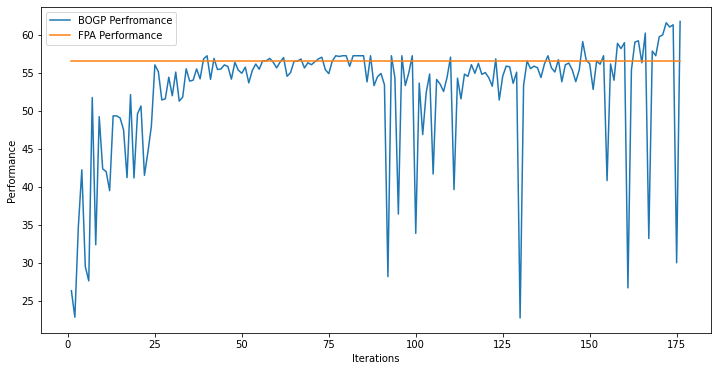

x_next is [ 29.99999995  29.98703924  29.98248089  17.74238784  29.99311129
  29.93011087  29.99999988  26.66854338  25.89490783 -30.99105747
 -30.49836717  29.99716186  29.9971619   29.98798302  29.99783501
  23.61966702  29.99906414  29.99999934  20.95289922  29.99999999]
f()=61.813436, actual=61.788
175


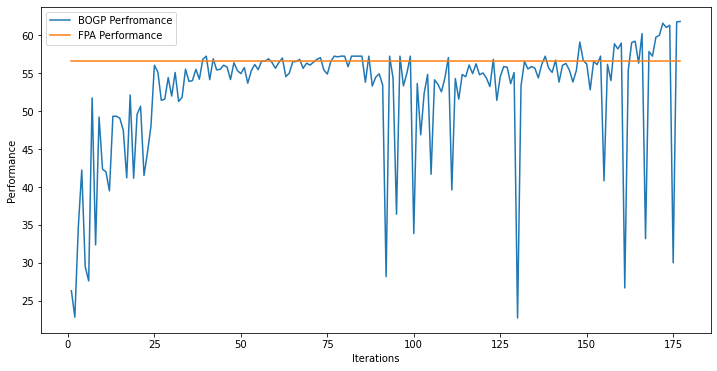

x_next is [ 30.          30.          30.          17.81564904  29.980211
  30.          30.          26.65502342  26.34329393 -30.91087755
 -30.51933894  29.9906753   30.          29.97715306  29.88516313
  23.63121514  30.          30.          20.79609499  29.94945694]
f()=61.791204, actual=61.796
176


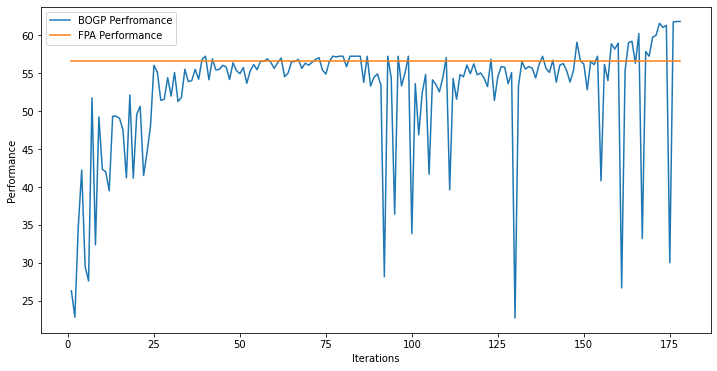

x_next is [ 29.99999997  29.99999989  29.98816441  17.75440456  30.
  29.99999998  30.          26.62132358  26.4159671  -30.99655201
 -30.75040883  29.99999982  30.          29.99999991  29.84451647
  23.63163771  30.          29.99999987  20.82621077  29.99999996]
f()=61.804358, actual=61.772
177


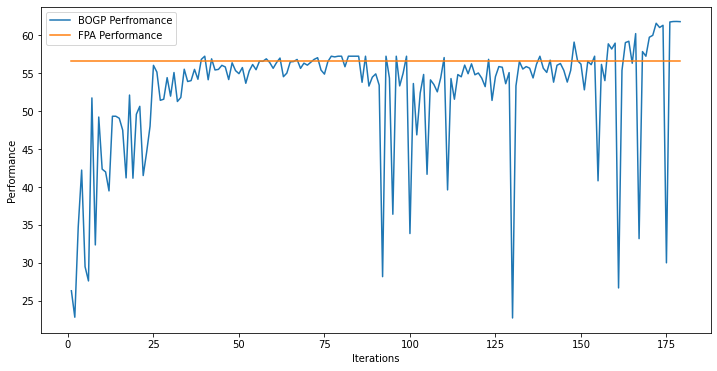

x_next is [29.99999991  2.94240658 -5.59027697 21.59862387 30.         21.96570228
 15.02639058  4.24215475 -3.28008011  6.65835501  9.96446848 -7.11581138
 29.99999998 11.66193795 -9.74693248 30.         29.99999996 29.11822053
 30.         30.        ]
f()=73.040941, actual=50.146
178


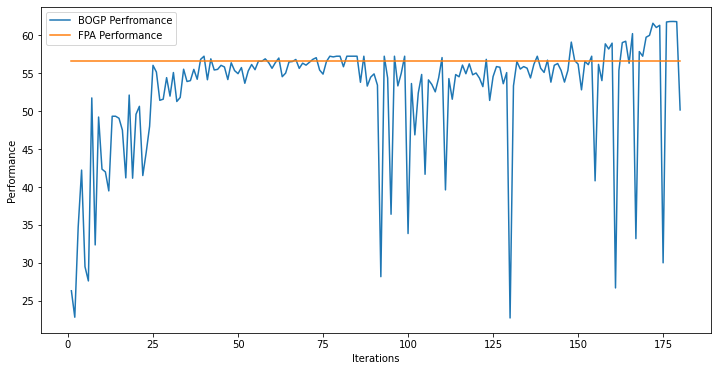

x_next is [ 29.33378573  29.52533715  29.69782661  29.79555075  29.90741935
  29.70223768  29.65146109  29.81046056  29.97368611 -30.31873166
 -30.88691965  29.56781437  29.98233743  29.7306762   29.26335359
  29.43188478  29.23768238  29.17629349  29.79087289  29.86152709]
f()=52.656733, actual=57.176
179


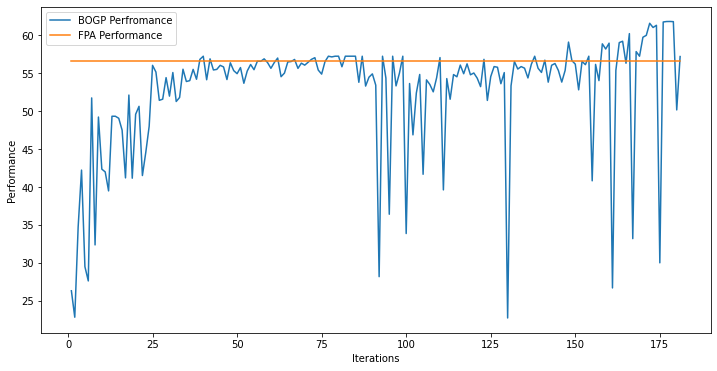

x_next is [ 29.99999994  29.99999996  29.99999994  18.08805619  29.99999997
  29.99999994  29.99999998  25.83927139  26.08841645 -29.36911115
 -28.46038665  29.99999996  30.          29.99999998  29.99999996
  23.48917505  29.99999998  29.99999986  20.27766313  29.99999996]
f()=61.932912, actual=61.797
180


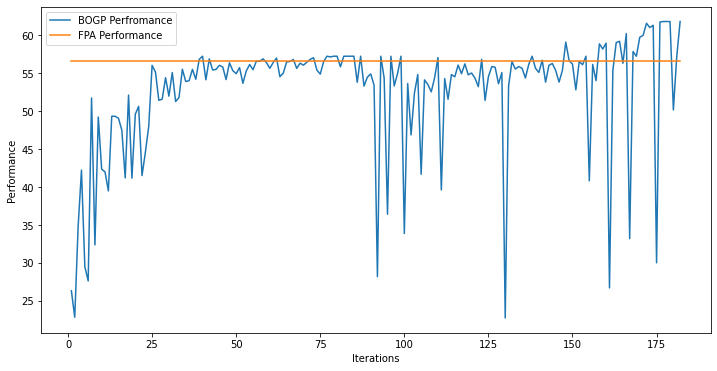

x_next is [ 29.99999945  29.99999906  29.99998322  18.39587938  29.99987451
  29.99984509  29.99999963  26.30838806  26.16982149 -30.97633452
 -29.12158229  29.99999834  29.99999954  29.99999944  29.9999034
  23.62464317  29.99999902  29.99999946  20.54250018  29.23383744]
f()=61.875390, actual=62.048
181


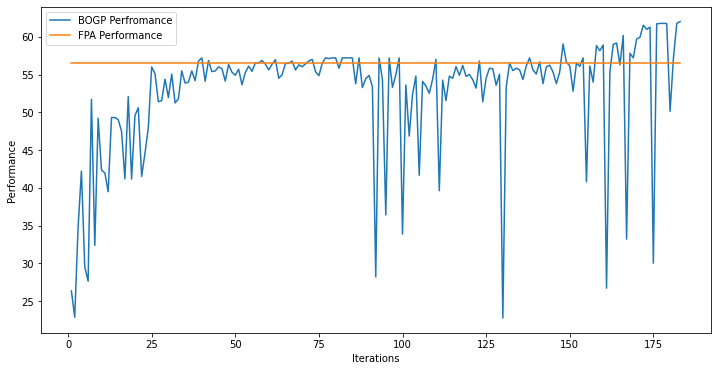

x_next is [  3.3875576  -24.7352254  -27.55982789   8.23740806 -28.43176465
 -14.39107825  20.34280153  -2.40458884 -29.25669699  22.66679582
 -14.47575498  -8.46708565  10.99033983 -13.79809928 -27.34210366
  21.21968321  -1.30815174  -4.48935518  28.3353913   25.00016164]
f()=52.611373, actual=30.408
182


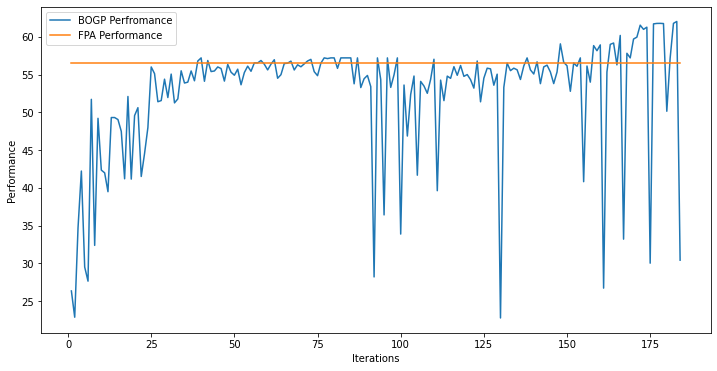

x_next is [ 29.99999863  29.99999812  29.99996634  18.59882666  29.99999673
  29.99999752  29.99998248  25.42735913  26.45588468 -30.99975152
 -27.18050011  29.99999705  29.9999985   29.99999884  29.99999654
  23.32761593  29.9999967   29.99999834  19.73121678  26.96537173]
f()=62.204698, actual=62.475
183


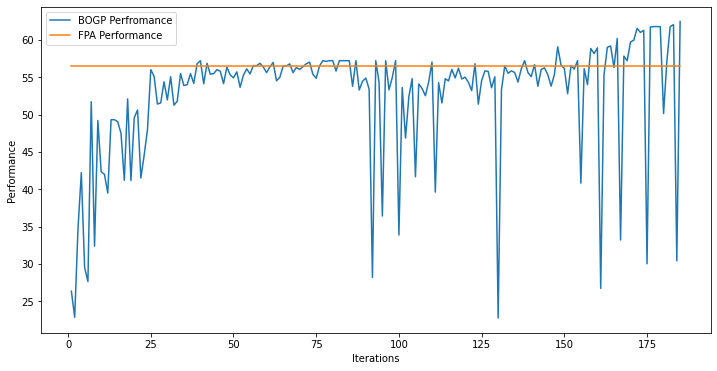

x_next is [ 29.99999927  29.99999922  29.99999876  16.85174052  29.99999394
  29.99999842  29.99999926  23.18506732  26.34139086 -30.99968671
 -24.95101828  29.99999964  29.99999934  29.99999952  29.9999988
  22.24590501  29.9999998   29.99999914  17.06204845  21.27054586]
f()=62.792340, actual=62.392
184


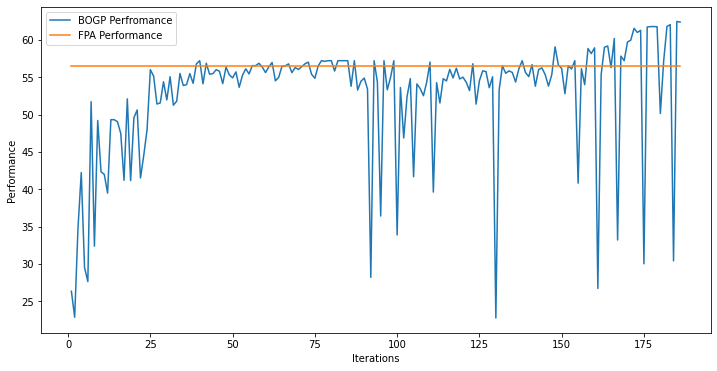

x_next is [ 29.99999647  29.99998968  29.99999152  18.04586728  29.99986991
  29.999889    29.99998818  24.84030055  26.54475403 -30.99990773
 -26.30839348  29.99989345  29.99999649  29.99986601  29.99991945
  22.99586788  29.99990948  29.99998972  19.07536968  24.73186086]
f()=62.588111, actual=62.633
185


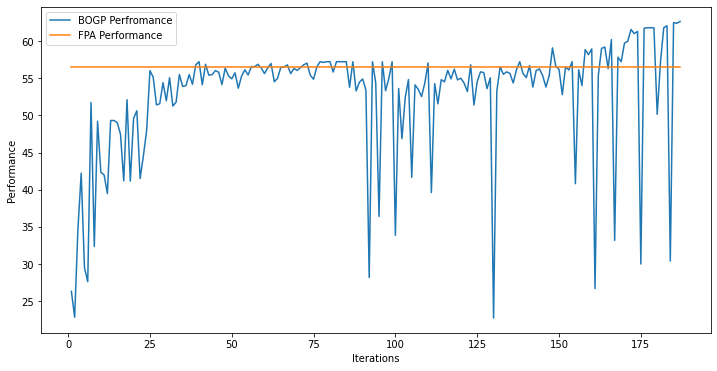

x_next is [ 29.99999965  29.99999936  29.99999945  17.94690957  29.99999962
  29.99999972  29.99999976  24.92132552  26.54778763 -30.99999378
 -26.39005896  29.99999954  29.99999979  29.9999997   29.9999996
  22.96636952  29.99999984  29.9999996   19.13513027  24.36642818]
f()=62.636065, actual=62.645
186


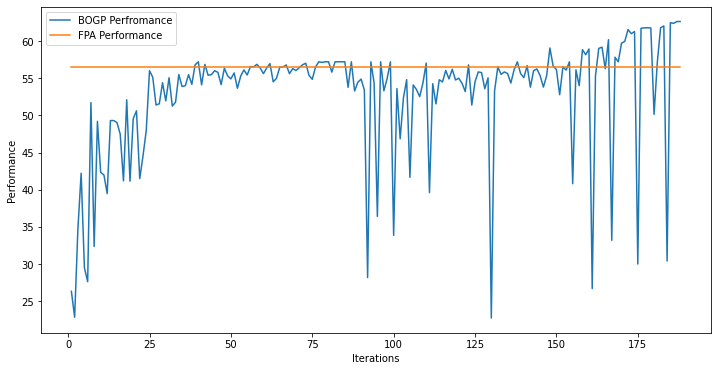

x_next is [ 29.99970767  29.99975748  29.99998468  17.85189058  29.99999725
  29.99975236  29.99989952  25.25655115  26.49908301 -30.99991625
 -26.81219307  29.99996455  29.99908003  29.99994524  29.99961812
  22.99297123  29.9998352   29.99958049  19.40559335  23.96755636]
f()=62.655414, actual=62.650
187


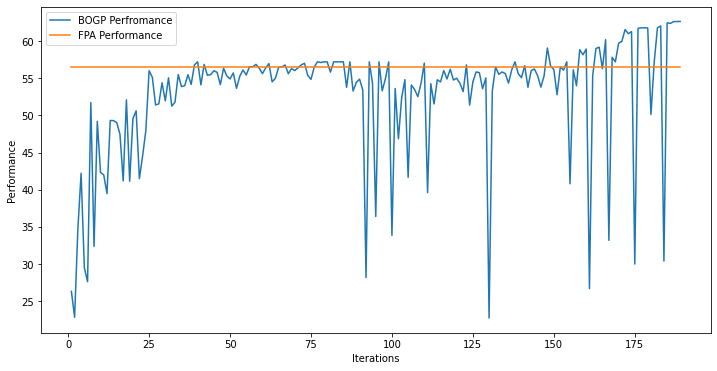

x_next is [ 29.99956568  29.99959134  29.99968856  17.95389895  29.9997624
  29.99977429  29.99984017  25.14657601  26.63159077 -30.99925637
 -26.57174624  29.99998958  29.99996293  29.9996377   29.9996795
  22.93037586  29.99978117  29.99989256  19.32756392  23.97558924]
f()=62.651734, actual=62.653
188


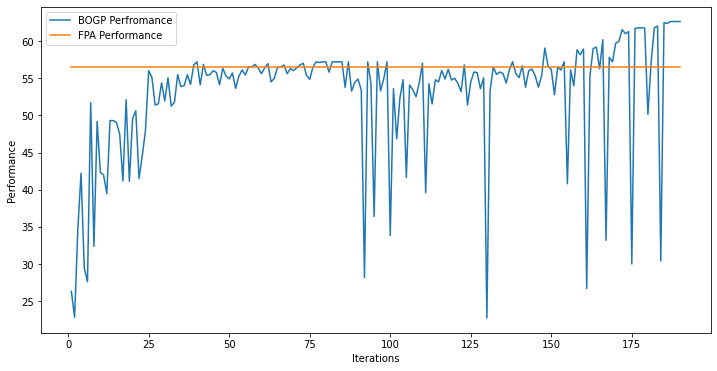

x_next is [ 29.99977961  29.99976585  29.99985304  29.99913702  29.99977282
  29.99982629  29.99998747  29.99932267  29.99986696 -30.9997752
 -30.99993181  29.99935608  29.99989558  29.99950764  29.99984749
  29.99985696  29.99987314  29.99991285  29.99992326  29.99955262]
f()=52.973843, actual=57.221
189


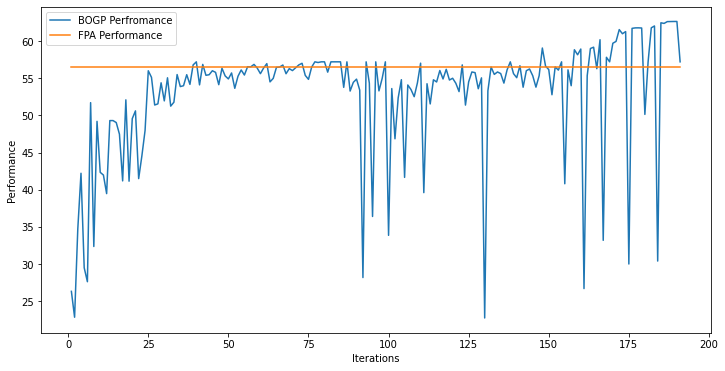

x_next is [ -1.5917978   -8.95387127   0.68115252  -3.33564156 -14.34930338
  -9.66894884 -27.27340976  10.30336145 -17.82008414 -12.86186009
  21.32569052 -30.16461836 -14.32890378  25.75377965   9.41213923
 -15.78786831  25.74808288 -13.43049438 -22.17643144  16.4896545 ]
f()=52.996105, actual=25.022
190


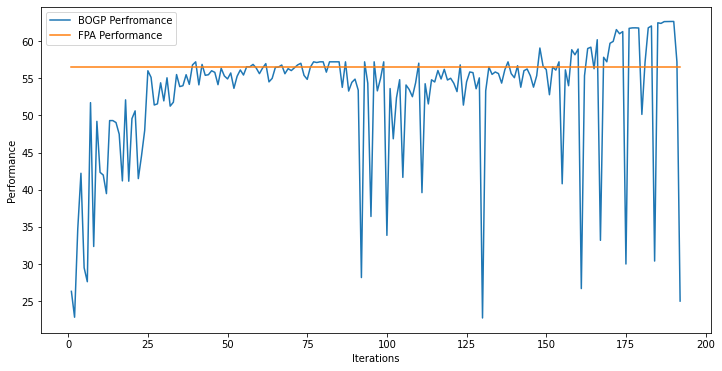

x_next is [ 29.99999182  29.99999969  29.99969863  18.2175583   29.99999949
  29.99999537  29.99997998  25.0710523   26.68653967 -30.99998241
 -26.65775616  29.99993336  29.99979571  29.99963948  29.99968278
  23.01047706  29.99994057  29.99969096  19.34366794  23.86381394]
f()=62.655076, actual=62.612
191


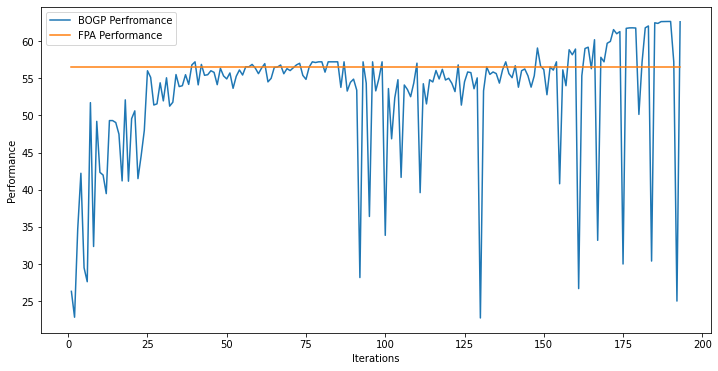

x_next is [ 29.99996455  29.99999993  29.99993487  16.15563124  29.99999975
  29.99979063  29.99999898  26.20557496  27.30015274 -30.99988828
 -25.18868057  29.99999907  29.99999983  29.99996831  29.99985662
  21.76106956  29.9999995   29.99999951  19.43373555  24.05681652]
f()=62.819340, actual=62.877
192


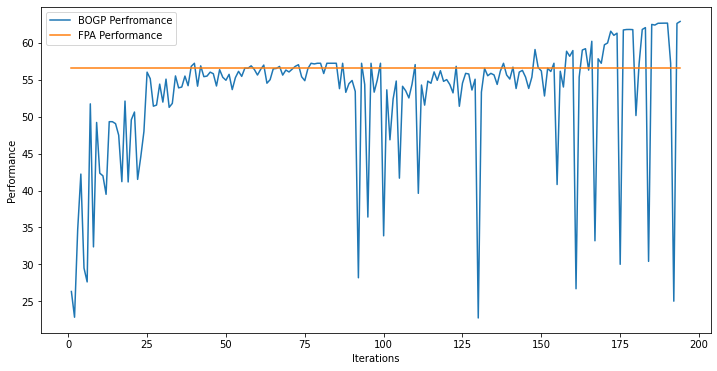

x_next is [ 29.9996602   29.99881533  29.99981332  29.99997057  29.99996797
  29.99975689  29.99949451  29.99990033  29.99964334 -30.99891613
 -30.99976832  29.99941505  29.99898727  29.9998805   29.99912287
  29.99954719  29.9993271   29.99986266  29.9998448   29.99816602]
f()=52.952015, actual=57.220
193


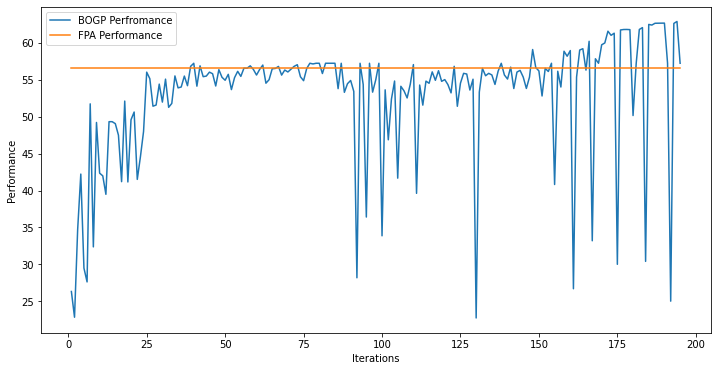

x_next is [ 29.99999855  29.99999865  29.99980682  15.70765333  29.99999812
  29.99967598  29.99999876  26.54907442  27.62902139 -30.99997392
 -24.67826539  29.99999864  29.99999837  29.99999868  29.99999775
  21.2707538   29.99987784  29.99999867  19.14247794  23.772206  ]
f()=62.890631, actual=62.883
194


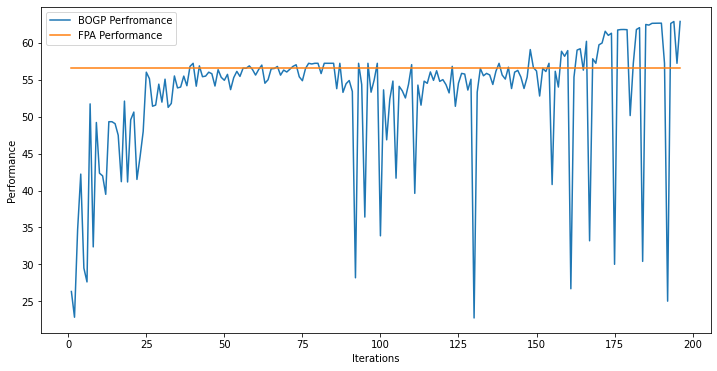

x_next is [ 29.99999986  29.99999992  29.88979016  15.80199567  29.99999995
  29.9999998   29.99999982  26.50961743  27.46670365 -30.9999891
 -24.74546371  29.99999995  29.99999991  29.99999991  29.99999952
  21.48795303  29.99980751  29.99988088  19.34742439  23.91340121]
f()=62.885471, actual=62.861
195


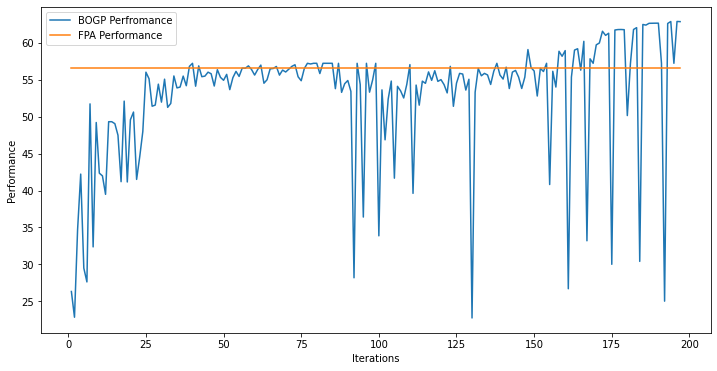

x_next is [ 29.99991086  29.99999994  29.99999128  15.77752544  29.99992195
  29.99989546  29.99960994  26.18121206  28.35192751 -30.99998484
 -25.4984628   29.99999991  29.99999988  29.99982312  29.9999997
  20.91017506  29.99990086  29.99989358  18.74937369  23.76609443]
f()=62.919995, actual=62.955
196


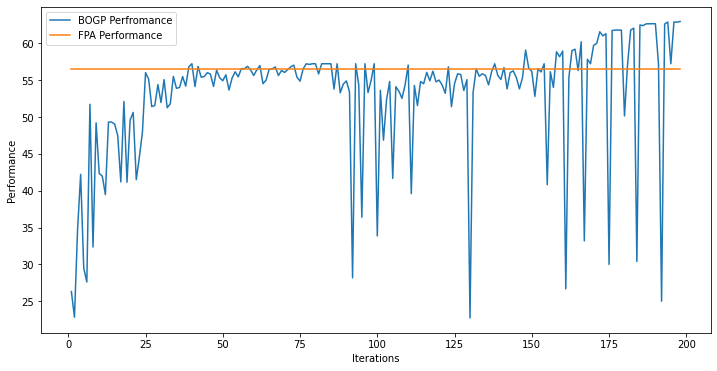

x_next is [ 29.99999858  29.99979154  29.99995232  15.53733991  29.99988357
  29.77827083  29.99990325  25.86673358  29.0055378  -30.99998874
 -25.75093193  29.99987628  29.99992148  29.99999872  29.99998877
  20.73827927  29.99992459  29.99998965  18.57924872  23.70232166]
f()=62.968536, actual=63.081
197


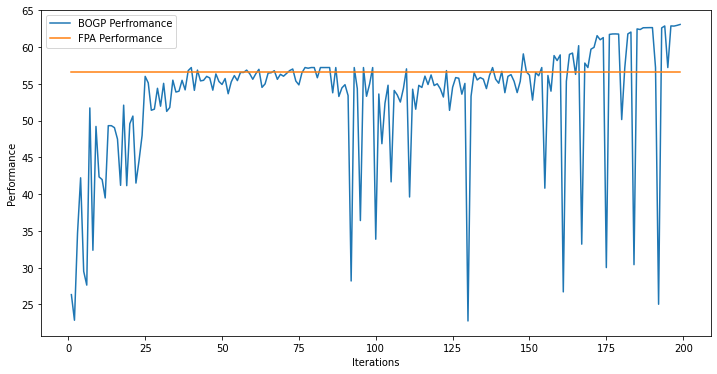

x_next is [ 29.99999991  29.99999993  29.99999988  13.17773711  29.99999989
  24.57233059  29.99998446  24.37868875  29.99989631 -30.99999877
 -24.7611932   29.99999974  29.99999988  29.99999976  29.99999983
  20.18698021  29.9999999   29.99999989  17.61083625  22.56321896]
f()=63.598671, actual=63.652
198


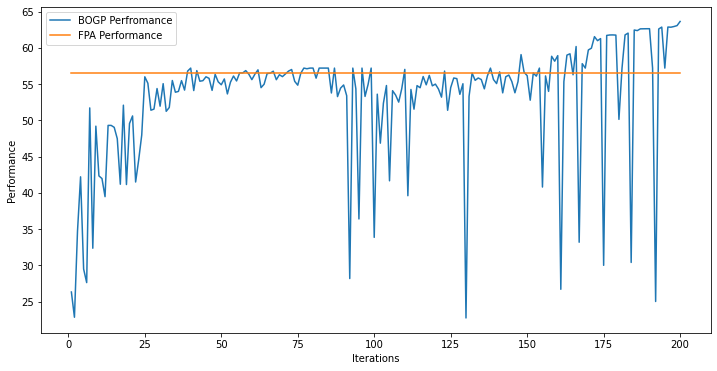

x_next is [ 29.99999994  29.99999997  29.99999982  12.92046001  29.99999992
  24.01953854  29.99999997  24.29625725  29.99999997 -30.99999988
 -24.60080578  29.99999997  29.99999999  29.99999999  29.99999973
  20.00153248  29.99999993  29.99999988  17.39106789  22.36970836]
f()=63.655372, actual=63.597
199


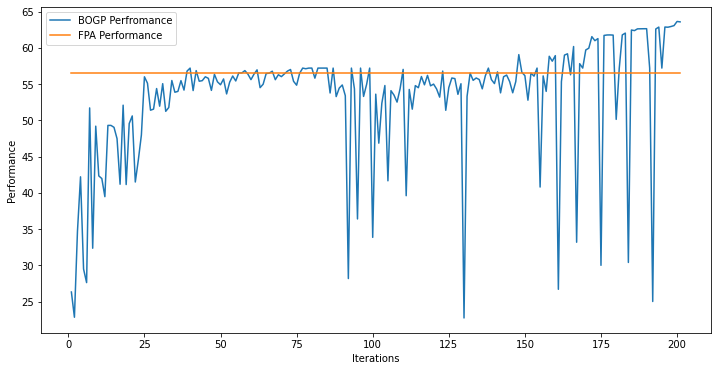

In [21]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

X = 0 * np.ones([1,var], dtype = "float")
y = np.array([[objective_FPA(X[0].reshape((int)(var/number_of_cells), number_of_cells))]])

tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
y_FPA = np.array([[tr_FPA]])

kernels =  ConstantKernel(constant_value=200, constant_value_bounds = (1e-20, 1e20)) * Matern(length_scale=1, length_scale_bounds=(1e-20,1e20), nu=1.5) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-20, 1e20)) 
model = GaussianProcessRegressor(kernel = kernels, n_restarts_optimizer=30)

model.fit(X, y)

for i in range(200):
  x_next = opt_acquisition(X, y, model, X.shape[0]+1)

  np.save("/content/drive/MyDrive/trainingx_BOGP_4.npy",X)
  np.save("/content/drive/MyDrive/trainingy_BOGP_4.npy",y)
  np.save("/content/drive/MyDrive/grad_trainingyFPA_BOGP_4.npy",y_FPA)
  
  tr = 0
  for l in range(1):
    tr = tr + objective_FPA(x_next.reshape((int)(var/number_of_cells), number_of_cells))
  tr = tr/1.0  
  actual = tr

  tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
  
  est, _ = surrogate(model, [x_next])
  print("x_next is", x_next)
  print('f()=%3f, actual=%.3f' % (est, actual))
  
  X = vstack((X, [x_next]))
  y = vstack((y, [[actual]]))
  y_FPA = vstack((y_FPA, [[tr_FPA]]))
  
  model.fit(X, y)
  
  print(i)
  pyplot.figure(figsize = (12, 6))

  pyplot.xlabel("Iterations")
  pyplot.ylabel("Performance")
  pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
  pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
  pyplot.legend(["BOGP Perfromance","FPA Performance"])
  pyplot.show()


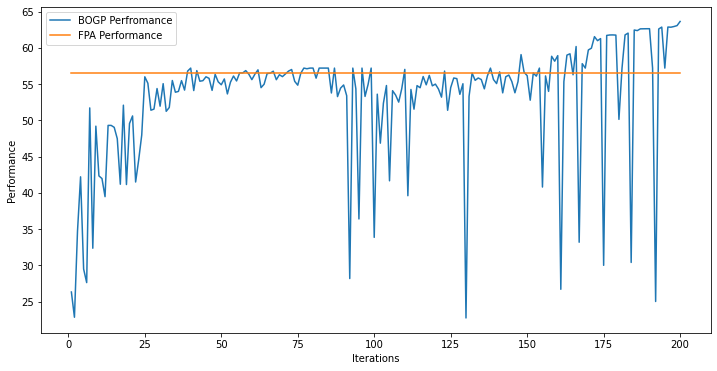

P_max = 30.000, Optimal_SE = 63.652
P_max = 30.000, Optimal_SE_FPA = 56.571


In [26]:
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("Iterations")
pyplot.ylabel("Performance")
pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show() 
ix = 0
ix = argmax(y)
print('P_max = %.3f, Optimal_SE = %.3f' % (P_max, y[ix]))

ix_FPA=0
ix_FPA=argmax(y_FPA)
print('P_max = %.3f, Optimal_SE_FPA = %.3f' % (P_max, y_FPA[ix_FPA]))

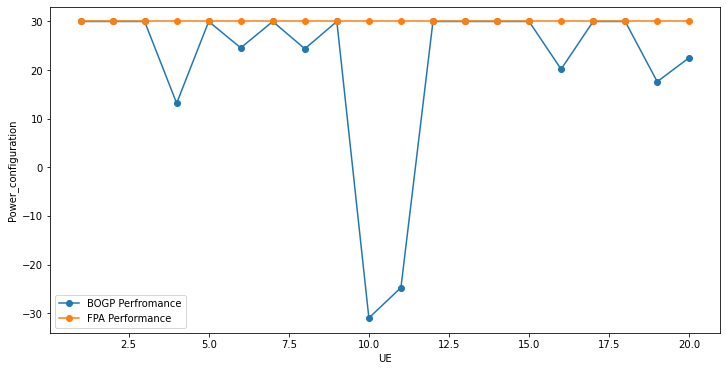

Power_configuration_BOGP is [ 29.99999991  29.99999993  29.99999988  13.17773711  29.99999989
  24.57233059  29.99998446  24.37868875  29.99989631 -30.99999877
 -24.7611932   29.99999974  29.99999988  29.99999976  29.99999983
  20.18698021  29.9999999   29.99999989  17.61083625  22.56321896]


In [27]:
X_FPA = P_max * np.ones([1,var], dtype = "float").reshape((int)(20), 1)
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("UE")
pyplot.ylabel("Power_configuration")
pyplot.plot(np.arange(1,21),X[ix][:], '-o')
pyplot.plot(np.arange(1,21),X_FPA[:], '-o')
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show()
print("Power_configuration_BOGP is", X[ix])

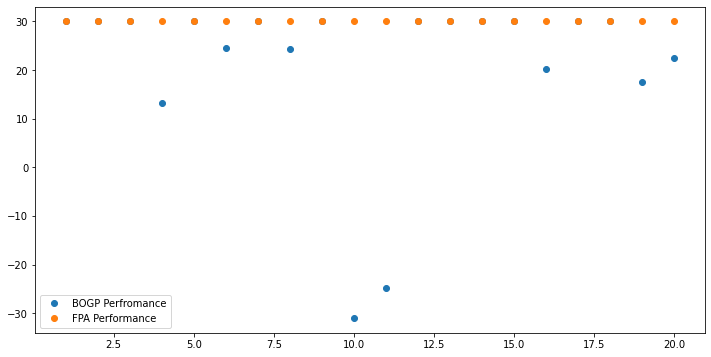

Power_configuration_BOGP is [ 29.99999991  29.99999993  29.99999988  13.17773711  29.99999989
  24.57233059  29.99998446  24.37868875  29.99989631 -30.99999877
 -24.7611932   29.99999974  29.99999988  29.99999976  29.99999983
  20.18698021  29.9999999   29.99999989  17.61083625  22.56321896]


In [28]:
import matplotlib.pyplot as plt
X_FPA=np.linspace(P_max,P_max,20)
plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(1,21),X[ix][:], 'o')
plt.plot(np.arange(1,21),X_FPA[:], 'o')
plt.legend(["BOGP Perfromance","FPA Performance"])
plt.show()
print("Power_configuration_BOGP is", X[ix])